In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy import stats

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred, n_steps):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = len(y_true)

    # Calculate absolute error of the forecasted values
    abs_err = np.abs(y_true[n_steps:] - y_pred[n_steps:])

    # Calculate the mean absolute error of the forecasted values
    mae = np.mean(abs_err)

    # Calculate the mean absolute error for the in-sample h-step naive forecast
    naive_forecast = y_true[:-n_steps]  # naive forecast shifts the series by h step
    mae_naive = np.mean(np.abs(y_true[n_steps:] - naive_forecast))

    # Calculate and return MASE
    mase = mae / mae_naive

    return mase

##### step: 1

In [ ]:
true1 = [1752., 1676., 1666., 1570., 1560., 1785., 1685., 1674., 1590.,
       1550., 1581., 1554., 1546., 1523., 1483., 1570., 1407., 1634.,
       1498., 1720., 1678., 1547., 1520., 1472., 1581., 1682., 1741.,
       1700., 1606., 1606., 1647., 1924., 1740., 1704., 1885., 1770.,
       1944., 1803., 1849., 1769., 1976., 1786., 1705., 1631., 1653.,
       1548., 1573., 1595., 1585., 1551., 1517., 1738., 1154., 1376.,
       1393., 1535., 1683., 1324., 1096., 1082., 1095.,  984., 1055.,
       1044., 1039., 1118., 1071., 1082., 1129., 1131., 1218., 1161.,
       1132., 1104., 1150., 1166.,  935., 1128., 1083., 1210., 1413.,
       1474., 1148., 1089., 1197., 1265., 1080., 1222., 1327., 1209.,
       1072., 1349., 1272., 1353., 1439., 1321., 1221., 1212., 1263.,
       1244., 1295., 1407., 1494., 1309., 1350., 1068., 1076., 1070.,
        890., 1003., 1242., 1215., 1147., 1239., 1301., 1293., 1385.,
       1283., 1237., 1141., 1141., 1263., 1191., 1231., 1087., 1236.,
       1248., 1359., 1297., 1090., 1355., 1345., 1442., 1306., 1420.,
       1549., 1373., 1411., 1310., 1269., 1347., 1475., 1513., 1565.,
       1425., 1464., 1573., 1478., 1566., 1527., 1539., 1711., 1389.,
       1621., 1749., 2029.]

rf1 = [1633.11, 1628.23, 1612.39, 1655.16, 1530.01, 1553.74, 1650.11,
       1658.93, 1666.33, 1559.18, 1509.13, 1582.2 , 1566.73, 1580.88,
       1502.96, 1465.49, 1553.02, 1442.05, 1658.34, 1527.2 , 1654.92,
       1666.56, 1605.35, 1567.19, 1548.32, 1548.25, 1645.81, 1657.06,
       1655.92, 1598.21, 1610.17, 1656.66, 1691.62, 1662.97, 1613.25,
       1674.  , 1689.52, 1775.79, 1774.3 , 1766.35, 1774.22, 1803.11,
       1814.68, 1719.17, 1630.52, 1682.43, 1536.82, 1568.6 , 1613.59,
       1589.22, 1561.92, 1529.26, 1707.93, 1207.43, 1382.46, 1397.49,
       1481.87, 1599.78, 1364.91, 1196.33, 1173.46, 1148.59, 1051.64,
       1069.56, 1044.08, 1057.23, 1097.04, 1090.74, 1079.8 , 1119.81,
       1119.76, 1221.89, 1165.21, 1165.67, 1148.78, 1140.23, 1162.84,
       1083.87, 1100.41, 1090.23, 1211.16, 1418.36, 1506.13, 1131.75,
       1106.55, 1218.  , 1173.88, 1101.43, 1195.59, 1269.69, 1230.07,
       1115.64, 1338.57, 1253.19, 1330.31, 1429.67, 1282.37, 1302.05,
       1282.49, 1241.42, 1210.63, 1247.61, 1404.66, 1489.91, 1273.97,
       1373.76, 1150.64, 1141.41, 1092.98, 1065.07, 1061.36, 1190.37,
       1128.14, 1119.48, 1218.2 , 1267.22, 1257.84, 1404.81, 1279.7 ,
       1226.14, 1172.94, 1141.84, 1231.55, 1207.02, 1233.01, 1135.57,
       1258.99, 1208.63, 1363.96, 1309.32, 1159.78, 1327.06, 1284.9 ,
       1411.13, 1289.47, 1366.53, 1499.16, 1396.52, 1405.24, 1281.5 ,
       1262.94, 1329.73, 1378.01, 1470.13, 1506.85, 1469.72, 1485.62,
       1493.95, 1474.08, 1485.8 , 1513.9 , 1507.89, 1587.94, 1442.62,
       1523.19, 1674.69]

gbm1 = [1649.18769915, 1565.15872387, 1530.82003332, 1606.42868258,
       1484.03281897, 1533.52912071, 1691.82983485, 1662.82238301,
       1638.03366356, 1579.72318247, 1464.38906091, 1559.8595705 ,
       1558.70666678, 1623.48166922, 1481.33135416, 1505.52724673,
       1559.29065625, 1511.18009642, 1680.0717892 , 1546.65759871,
       1650.03859092, 1745.27877274, 1678.05997185, 1603.45059955,
       1530.6654333 , 1578.30282169, 1666.0570375 , 1659.06114987,
       1646.07495409, 1636.53946263, 1608.21811489, 1678.86334869,
       1685.27859842, 1694.92721302, 1632.46519597, 1695.57391683,
       1715.65819494, 1762.2488919 , 1790.12077238, 1795.99839975,
       1793.93370132, 1786.68572071, 1717.54780338, 1786.16951435,
       1635.65770645, 1700.43467876, 1519.15220974, 1608.70982729,
       1670.23353334, 1616.42963123, 1609.82431701, 1531.2757192 ,
       1672.90407503, 1325.4842515 , 1369.32540713, 1419.19235423,
       1500.30235507, 1604.71522211, 1393.3589805 , 1195.17533492,
       1200.99253183, 1118.65639736, 1009.53750358, 1042.82270488,
       1073.3794139 , 1025.86411246, 1126.07138873, 1074.69319675,
       1097.7091033 , 1126.44822405, 1141.2608392 , 1167.15671101,
       1154.93652683, 1197.40316889, 1142.64493405, 1152.10430611,
       1173.45696901, 1019.887216  , 1119.05957253, 1112.45179731,
       1214.30672313, 1347.19594968, 1538.19279301, 1108.42283947,
       1121.51900423, 1208.3999882 , 1182.46772875, 1065.58434026,
       1165.24198434, 1302.47114098, 1182.92742687, 1109.95732266,
       1339.34269737, 1263.71434037, 1338.1621478 , 1361.22960894,
       1322.47972606, 1229.08599004, 1249.421897  , 1234.15315908,
       1217.43136073, 1301.8537643 , 1406.02173844, 1462.76068958,
       1265.9448888 , 1390.69087728, 1245.75222799, 1188.3533044 ,
       1152.25534578, 1026.74763021, 1129.62712141, 1214.06873527,
       1141.8120058 , 1128.5883614 , 1194.21204956, 1295.78327925,
       1240.43057843, 1390.19111033, 1266.89501258, 1233.17648831,
       1220.22737065, 1163.5629374 , 1231.77540262, 1209.79506954,
       1235.0973203 , 1157.79658532, 1228.3442441 , 1251.83652602,
       1343.8029051 , 1326.63035787, 1196.74582011, 1288.16143885,
       1237.9066499 , 1338.3862212 , 1288.3412785 , 1363.50661281,
       1500.07733303, 1348.26078677, 1380.81157591, 1311.20976102,
       1313.34267763, 1298.23267499, 1331.10223984, 1384.04315679,
       1423.83063792, 1434.8832192 , 1349.50422083, 1493.71319932,
       1476.12028787, 1399.80110712, 1555.29373515, 1485.4028709 ,
       1691.84471159, 1447.69874087, 1515.19614009, 1675.99596605]

ar1 = [1711.44563082, 1700.99819055, 1639.6096262 , 1628.58519045,
       1552.80079889, 1532.04344442, 1705.67498333, 1653.42328326,
       1632.78268958, 1573.93972634, 1530.2695986 , 1549.81768634,
       1530.89859605, 1520.42960078, 1503.16558972, 1469.22217312,
       1530.83575161, 1417.24557788, 1564.94324392, 1499.62581693,
       1633.68025101, 1651.6879717 , 1536.62663384, 1505.81152231,
       1466.9787342 , 1537.02404066, 1629.40187214, 1684.89150067,
       1665.39350335, 1591.31063748, 1581.82048638, 1614.04486567,
       1827.49017083, 1725.72398562, 1666.07325866, 1819.16623594,
       1749.11009199, 1861.36786579, 1793.32679988, 1797.34662987,
       1757.11524017, 1891.81508868, 1790.64205925, 1687.30264067,
       1636.76165466, 1631.71816861, 1554.81114718, 1550.6591547 ,
       1575.79832947, 1565.00121962, 1539.31829007, 1510.41748245,
       1667.72570019, 1290.53038132, 1324.39511905, 1406.54954817,
       1468.66799752, 1616.57919074, 1391.81267588, 1168.23912957,
       1139.17033051, 1126.0693206 , 1033.04252837, 1063.64841746,
       1071.68774578, 1057.10866331, 1117.58830146, 1096.8491199 ,
       1094.20221551, 1135.72077231, 1142.00168863, 1204.0417308 ,
       1181.06451226, 1148.41540122, 1130.1787865 , 1155.406626  ,
       1173.59530904, 1008.39310905, 1108.44976162, 1116.40109144,
       1179.10551027, 1359.93542803, 1434.86056391, 1212.82598414,
       1128.71928405, 1209.43153552, 1252.96025823, 1124.26047608,
       1203.97748291, 1307.83391824, 1225.20018537, 1118.86722152,
       1303.5374717 , 1280.8717206 , 1317.04022072, 1408.53925326,
       1333.69354629, 1251.3881564 , 1235.51972883, 1262.34599121,
       1249.73570793, 1282.55287112, 1372.1035115 , 1448.96757068,
       1333.67315391, 1344.27634723, 1156.94317081, 1107.51239576,
       1108.28361765,  961.27283429, 1015.0013518 , 1201.47631086,
       1207.33655768, 1162.32047994, 1231.16267967, 1285.81137995,
       1286.1384384 , 1356.06622491, 1299.34640043, 1253.15342702,
       1181.96236205, 1162.85974789, 1246.73823769, 1207.08308701,
       1226.88015564, 1135.82912796, 1217.48378379, 1248.5591026 ,
       1321.54369049, 1302.00756064, 1147.1198914 , 1311.45073606,
       1336.43390282, 1393.39659277, 1327.6502559 , 1387.07503171,
       1500.28201506, 1387.40019709, 1396.8093945 , 1338.09472843,
       1284.34565918, 1334.43236465, 1429.12656203, 1472.2182301 ,
       1520.02912982, 1436.58257942, 1446.60717395, 1531.53510163,
       1471.83261713, 1523.44067883, 1514.5408307 , 1512.47247811,
       1640.26401512, 1438.32004731, 1551.77934004, 1681.14998385]

arev_lasso1 = [1693.22579005, 1633.6688487 , 1605.13103564, 1623.44610715,
       1566.3982656 , 1527.37733552, 1669.92387736, 1717.87087817,
       1632.87093972, 1561.2423572 , 1532.91358061, 1514.00622683,
       1525.53872214, 1517.24828971, 1483.49749565, 1467.09203833,
       1566.43567189, 1484.39315926, 1589.51596657, 1531.43269048,
       1688.36758967, 1653.19136213, 1589.87895258, 1536.6332996 ,
       1514.88088671, 1563.76491598, 1639.55801888, 1670.78081913,
       1669.36169673, 1638.46457261, 1598.94228207, 1619.93404342,
       1800.76939942, 1724.87871761, 1668.31095617, 1769.96978034,
       1700.11906381, 1807.80854902, 1805.63547549, 1770.49352384,
       1767.87632971, 1884.80852256, 1753.10987404, 1725.5701384 ,
       1642.19859999, 1650.89877536, 1594.5607775 , 1607.9011061 ,
       1639.65363517, 1629.84372844, 1568.25785234, 1597.10672407,
       1694.55728139, 1378.58473339, 1385.19007297, 1436.17635903,
       1542.05319142, 1618.73091766, 1414.12517464, 1100.93811928,
       1132.95167425, 1140.45892332, 1035.44337004, 1095.68130622,
       1102.16838959, 1074.419554  , 1122.93475755, 1086.13120064,
       1147.12717348, 1159.69874277, 1159.51288309, 1185.14836776,
       1167.73665906, 1159.96368697, 1166.86022819, 1143.80705415,
       1171.2728715 , 1030.19300316, 1158.47497975, 1102.17774732,
       1166.3586283 , 1286.39103236, 1317.822045  , 1127.29933897,
       1036.09734319, 1196.87471009, 1189.88395607, 1072.83106672,
       1187.02036245, 1254.51786584, 1204.04769591, 1113.12204995,
       1283.6809632 , 1257.33450259, 1284.18022011, 1341.54686146,
       1310.96501789, 1271.43684435, 1252.44959853, 1280.9415147 ,
       1235.8462164 , 1264.38917944, 1380.49723434, 1418.16587015,
       1293.08507428, 1360.66146442, 1164.15735252, 1097.97381025,
       1097.87972538,  980.00933213, 1054.59385166, 1179.73323922,
       1188.14804239, 1118.70399072, 1206.72170534, 1241.62410809,
       1228.67703907, 1297.10192203, 1282.42619395, 1208.88933198,
       1168.37898645, 1167.11441776, 1202.20415742, 1188.12653873,
       1242.02658225, 1152.11506329, 1234.73530814, 1240.82120648,
       1301.97667541, 1263.14144853, 1142.34255848, 1273.88366325,
       1304.93396883, 1352.11904886, 1288.07978217, 1309.95187057,
       1413.60714016, 1289.62889946, 1381.79722523, 1282.26986847,
       1276.21497147, 1287.60973024, 1402.78947452, 1423.50880723,
       1460.19210176, 1433.35729742, 1418.58466262, 1481.63618521,
       1440.24949294, 1485.55129595, 1508.65273905, 1509.35387908,
       1615.89273887, 1433.20468392, 1523.81098187, 1643.92429583]

lstm1 = [1286.26733398, 1312.43444824, 1328.8815918 , 1416.17236328,
       1441.55517578, 1366.85131836, 1370.36975098, 1347.4140625 ,
       1424.75622559, 1350.10021973, 1272.57141113, 1365.35656738,
       1376.13171387, 1220.14233398, 1316.83862305, 1194.12512207,
       1353.43444824, 1351.99365234, 1302.60107422, 1306.0958252 ,
       1324.34619141, 1328.32727051, 1286.17956543, 1315.50585938,
       1341.47045898, 1298.97705078, 1306.35083008, 1267.34069824,
       1324.28845215, 1265.1887207 , 1315.22192383, 1309.42053223,
       1340.91357422, 1258.87219238, 1183.09423828, 1397.71032715,
       1195.72607422, 1308.98791504, 1297.51928711, 1299.63415527,
       1383.22570801, 1408.77416992, 1293.57421875, 1294.68737793,
       1277.12866211, 1300.03417969, 1326.05126953, 1323.12353516,
       1271.80004883, 1419.06762695, 1303.36486816, 1271.59350586,
       1260.18078613, 1012.07336426,  912.6854248 , 1082.74328613,
       1095.16967773, 1119.4095459 , 1143.70861816,  896.78082275,
       1171.25866699,  965.68566895,  911.60437012, 1012.54492188,
       1139.78173828, 1255.89587402, 1177.44152832, 1209.45874023,
       1243.00622559, 1246.90551758, 1274.4708252 , 1114.29211426,
       1084.79968262, 1305.09924316, 1384.86572266, 1081.23474121,
        896.30834961, 1124.74682617,  646.03765869, 1107.00842285,
       1033.68603516, 1280.23986816, 1438.73352051, 1256.58410645,
       1106.55493164, 1050.13366699,  752.56744385, 1090.82702637,
       1300.55773926, 1214.92590332, 1132.37963867, 1247.5546875 ,
       1274.61560059, 1170.04406738, 1188.18981934, 1323.33496094,
       1180.58190918, 1523.25390625, 1437.17150879, 1316.61975098,
       1319.71105957, 1351.60644531, 1189.69763184, 1404.63146973,
       1211.75598145, 1234.07727051, 1086.71899414, 1218.86791992,
       1257.09545898,  931.83624268, 1208.56335449, 1165.9831543 ,
       1206.03674316,  878.5859375 , 1224.12207031, 1015.75665283,
       1106.53881836, 1217.44030762, 1325.08972168, 1405.87219238,
       1348.44091797, 1080.39709473, 1361.71765137, 1269.26135254,
       1184.21313477, 1238.18017578, 1251.09106445, 1235.44140625,
       1350.04919434, 1338.06567383, 1199.52148438, 1261.78759766,
       1156.19470215, 1283.33166504, 1210.69848633, 1316.73083496,
       1268.71008301, 1264.75073242, 1342.39550781, 1200.51477051,
       1241.02087402, 1326.49572754, 1338.70361328, 1282.22595215,
       1266.02722168, 1248.1998291 , 1324.90319824, 1514.43273926,
       1323.84790039, 1312.43505859, 1360.9597168 , 1332.70422363,
       1421.05078125, 1517.27319336, 1459.63781738, 1511.08374023]

naive1 = [1797., 1752., 1676., 1666., 1570., 1560., 1785., 1685., 1674.,
       1590., 1550., 1581., 1554., 1546., 1523., 1483., 1570., 1407.,
       1634., 1498., 1720., 1678., 1547., 1520., 1472., 1581., 1682.,
       1741., 1700., 1606., 1606., 1647., 1924., 1740., 1704., 1885.,
       1770., 1944., 1803., 1849., 1769., 1976., 1786., 1705., 1631.,
       1653., 1548., 1573., 1595., 1585., 1551., 1517., 1738., 1154.,
       1376., 1393., 1535., 1683., 1324., 1096., 1082., 1095.,  984.,
       1055., 1044., 1039., 1118., 1071., 1082., 1129., 1131., 1218.,
       1161., 1132., 1104., 1150., 1166.,  935., 1128., 1083., 1210.,
       1413., 1474., 1148., 1089., 1197., 1265., 1080., 1222., 1327.,
       1209., 1072., 1349., 1272., 1353., 1439., 1321., 1221., 1212.,
       1263., 1244., 1295., 1407., 1494., 1309., 1350., 1068., 1076.,
       1070.,  890., 1003., 1242., 1215., 1147., 1239., 1301., 1293.,
       1385., 1283., 1237., 1141., 1141., 1263., 1191., 1231., 1087.,
       1236., 1248., 1359., 1297., 1090., 1355., 1345., 1442., 1306.,
       1420., 1549., 1373., 1411., 1310., 1269., 1347., 1475., 1513.,
       1565., 1425., 1464., 1573., 1478., 1566., 1527., 1539., 1711.,
       1389., 1621., 1749.]

In [ ]:
comb1 = []
for i in range(len(rf1)):
    avg = (rf1[i] + gbm1[i] + ar1[i] + arev_lasso1[i] + lstm1[i] + naive1[i]) / 6
    comb1.append(avg)

In [ ]:
mse1 = mean_squared_error(true1, comb1)
print('Mean Squared Error for {} step: {}'.format(1 ,mse1))
mae1 = mean_absolute_error(true1, comb1)
print('Mean Absolute Error for {} step: {}'.format(1 ,mae1))
mape1 = mean_absolute_percentage_error(true1, comb1)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(1, mape1))
mase1 = mean_absolute_scaled_error(true1, comb1, 1)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(1, mase1))

Mean Squared Error for 1 step: 17428.63012592428
Mean Absolute Error for 1 step: 101.8963763680342
Mean Absolute Percentage Error for 1 step: 7.31%
Mean Absolute Scaled Error for 1 step: 1.00


In [ ]:
combT1 = []
for i in range(len(rf1)):
    data = list([rf1[i], gbm1[i], ar1[i], arev_lasso1[i], lstm1[i], naive1[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT1.append(trimmed_mean)

In [ ]:
mse1 = mean_squared_error(true1, combT1)
print('Mean Squared Error for {} step: {}'.format(1 ,mse1))
mae1 = mean_absolute_error(true1, combT1)
print('Mean Absolute Error for {} step: {}'.format(1 ,mae1))
mape1 = mean_absolute_percentage_error(true1, combT1)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(1, mape1))
mase1 = mean_absolute_scaled_error(true1, combT1, 1)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(1, mase1))

Mean Squared Error for 1 step: 16147.221314107612
Mean Absolute Error for 1 step: 95.35668782916666
Mean Absolute Percentage Error for 1 step: 6.97%
Mean Absolute Scaled Error for 1 step: 0.94


In [ ]:
Wcomb1 = []
for i in range(len(rf1)):
    avg = (rf1[i] + gbm1[i] + ar1[i] + arev_lasso1[i] + naive1[i]) / 5
    Wcomb1.append(avg)

In [ ]:
mse1 = mean_squared_error(true1, Wcomb1)
print('Mean Squared Error for {} step: {}'.format(1 ,mse1))
mae1 = mean_absolute_error(true1, Wcomb1)
print('Mean Absolute Error for {} step: {}'.format(1 ,mae1))
mape1 = mean_absolute_percentage_error(true1, Wcomb1)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(1, mape1))
mase1 = mean_absolute_scaled_error(true1, Wcomb1, 1)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(1, mase1))

Mean Squared Error for 1 step: 16041.434487814624
Mean Absolute Error for 1 step: 95.18197349929487
Mean Absolute Percentage Error for 1 step: 6.98%
Mean Absolute Scaled Error for 1 step: 0.94


In [ ]:
WcombT1 = []
for i in range(len(rf1)):
    data = list([rf1[i], gbm1[i], ar1[i], arev_lasso1[i], naive1[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT1.append(trimmed_mean)

In [ ]:
mse1 = mean_squared_error(true1, WcombT1)
print('Mean Squared Error for {} step: {}'.format(1 ,mse1))
mae1 = mean_absolute_error(true1, WcombT1)
print('Mean Absolute Error for {} step: {}'.format(1 ,mae1))
mape1 = mean_absolute_percentage_error(true1, WcombT1)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(1, mape1))
mase1 = mean_absolute_scaled_error(true1, WcombT1, 1)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(1, mase1))

Mean Squared Error for 1 step: 16038.23333418124
Mean Absolute Error for 1 step: 94.50257894570514
Mean Absolute Percentage Error for 1 step: 6.93%
Mean Absolute Scaled Error for 1 step: 0.93


##### step: 2

In [ ]:
# step: 2

true2 = [1676., 1666., 1570., 1560., 1785., 1685., 1674., 1590., 1550.,
       1581., 1554., 1546., 1523., 1483., 1570., 1407., 1634., 1498.,
       1720., 1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700.,
       1606., 1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944.,
       1803., 1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548.,
       1573., 1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393.,
       1535., 1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044.,
       1039., 1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132.,
       1104., 1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474.,
       1148., 1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072.,
       1349., 1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244.,
       1295., 1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890.,
       1003., 1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283.,
       1237., 1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248.,
       1359., 1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549.,
       1373., 1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425.,
       1464., 1573., 1478., 1566., 1527., 1539., 1711., 1389., 1621.,
       1749., 2029.]


rf2 =    [1510.91, 1468.98, 1536.98, 1554.33, 1551.14, 1645.81, 1627.01,
       1613.84, 1536.39, 1545.66, 1540.78, 1576.61, 1580.11, 1573.27,
       1504.31, 1511.1 , 1568.75, 1527.51, 1655.58, 1595.27, 1701.6 ,
       1641.13, 1619.76, 1592.13, 1540.1 , 1623.44, 1622.36, 1612.87,
       1578.09, 1608.96, 1597.67, 1667.24, 1634.02, 1627.74, 1643.88,
       1664.1 , 1720.19, 1715.41, 1746.74, 1708.31, 1800.96, 1781.78,
       1752.37, 1709.64, 1703.1 , 1644.8 , 1590.62, 1677.  , 1649.04,
       1647.13, 1615.85, 1610.26, 1638.49, 1216.92, 1386.84, 1430.22,
       1511.39, 1551.07, 1367.09, 1251.34, 1217.8 , 1171.07, 1106.3 ,
       1104.42, 1069.85, 1072.77, 1080.01, 1088.46, 1104.6 , 1146.3 ,
       1118.11, 1165.4 , 1166.18, 1151.17, 1132.89, 1134.09, 1112.88,
       1101.18, 1078.54, 1073.59, 1130.39, 1460.19, 1385.61, 1124.51,
       1111.49, 1187.29, 1144.92, 1130.31, 1173.8 , 1220.05, 1195.09,
       1155.11, 1258.09, 1234.85, 1260.66, 1395.75, 1266.07, 1304.35,
       1305.48, 1273.02, 1248.08, 1295.73, 1348.89, 1309.14, 1291.7 ,
       1265.49, 1177.19, 1178.42, 1136.9 , 1118.81, 1147.61, 1181.69,
       1169.39, 1167.23, 1208.2 , 1214.13, 1237.05, 1337.64, 1273.16,
       1228.03, 1195.2 , 1194.01, 1257.99, 1225.06, 1229.78, 1207.86,
       1243.68, 1214.79, 1291.61, 1311.43, 1241.95, 1239.81, 1268.26,
       1320.72, 1242.9 , 1326.21, 1424.63, 1288.4 , 1359.93, 1242.83,
       1276.34, 1301.52, 1342.49, 1407.98, 1464.21, 1414.62, 1468.41,
       1462.11, 1437.98, 1474.32, 1474.68, 1507.15, 1510.61, 1492.17,
       1559.41]


gbm2 = [1624.55539521, 1465.19666235, 1476.30587424, 1530.81353128,
       1546.97142499, 1697.44278634, 1701.80833105, 1658.30873873,
       1584.54956447, 1564.50574973, 1519.87043321, 1563.58198546,
       1632.60599308, 1610.5184743 , 1518.99922643, 1493.66449655,
       1578.59631708, 1489.93747272, 1650.22216028, 1534.08505   ,
       1765.11381823, 1715.08717299, 1623.51522294, 1612.92533415,
       1536.86536517, 1589.1351116 , 1629.11119617, 1637.63667356,
       1584.08856075, 1607.21885451, 1588.52914315, 1660.37254745,
       1626.20068721, 1614.58630535, 1610.01532662, 1652.45718538,
       1795.75724762, 1747.39759403, 1802.55497283, 1669.70020141,
       1751.94406511, 1767.10297582, 1815.29673063, 1723.80357025,
       1661.19731078, 1622.35798837, 1562.71561822, 1729.5756794 ,
       1653.47410897, 1676.29182661, 1606.0217156 , 1614.39817762,
       1642.16924714, 1207.92666288, 1373.40584765, 1336.13415566,
       1624.66707074, 1587.63615229, 1349.46307823, 1235.40470394,
       1225.12759989, 1015.26581375, 1081.08024217, 1033.08865246,
       1071.4185166 , 1089.28498062, 1010.25256709, 1039.24288616,
       1128.36380533, 1176.64661426, 1136.77458698, 1108.64007125,
       1211.35633678, 1125.68421161, 1112.33024345, 1205.63355409,
       1084.16263046, 1129.18132598, 1130.63274248, 1106.23309017,
       1134.54048661, 1384.98095167, 1255.6911217 , 1120.69121551,
       1160.98243333, 1301.39576175, 1108.75284692, 1158.05815351,
       1183.34899994, 1236.51512278, 1120.69426086, 1150.40809978,
       1257.62014909, 1221.64435727, 1340.41549633, 1485.35126237,
       1288.9189711 , 1290.66475773, 1285.43260112, 1311.19707653,
       1261.90289471, 1280.59778604, 1364.49464371, 1210.1482697 ,
       1285.34776239, 1282.44581494, 1260.91097409, 1158.7396199 ,
       1082.59841266, 1218.08809664, 1162.13300923, 1155.91567492,
       1177.16180728, 1139.99988575, 1281.18437316, 1170.3101855 ,
       1277.48294059, 1354.50102171, 1206.3233363 , 1256.2025729 ,
       1225.08409103, 1172.38066429, 1245.97063797, 1165.64120234,
       1210.05574474, 1181.40883868, 1291.11819486, 1233.46510633,
       1324.90617043, 1293.4789098 , 1161.52469012, 1313.51016547,
       1277.88191136, 1314.75216828, 1260.37893267, 1310.23292661,
       1407.78757283, 1281.96900559, 1300.94959815, 1295.80339232,
       1300.62826622, 1240.86549077, 1259.13486507, 1372.74705463,
       1430.7255548 , 1363.51073032, 1473.51510731, 1483.01422246,
       1406.87462347, 1519.89089085, 1445.46283577, 1566.97324556,
       1552.10306346, 1467.13002405, 1593.50861642]

ar2 =   [1668.12559084, 1650.4107888 , 1602.86387921, 1602.23224864,
       1532.34403531, 1517.96137843, 1675.88554118, 1617.35097086,
       1597.37522695, 1556.81280816, 1515.53641352, 1535.00114538,
       1512.82588466, 1501.54580719, 1487.92367266, 1457.28814949,
       1513.4755581 , 1407.10788173, 1546.87626505, 1480.14228585,
       1608.18852735, 1621.51000732, 1506.98639014, 1499.12571579,
       1464.54973267, 1526.32882368, 1605.03422883, 1646.17030828,
       1629.80949   , 1570.41428734, 1573.15029054, 1605.00167475,
       1792.15878876, 1677.56810429, 1641.122894  , 1804.52883052,
       1721.30074672, 1825.67873822, 1768.2877903 , 1769.76825781,
       1746.57153286, 1868.40240627, 1756.22729084, 1669.43175615,
       1639.18192269, 1624.95140334, 1544.38570163, 1545.4851347 ,
       1566.83076925, 1549.02126738, 1527.06287691, 1504.88844621,
       1652.95736637, 1267.26882098, 1354.8096003 , 1415.26854025,
       1447.03162156, 1587.60041275, 1361.13616368, 1198.14620359,
       1203.12370183, 1154.39059845, 1048.41116598, 1085.70009908,
       1087.49313025, 1066.84274112, 1129.65190682, 1102.47340847,
       1103.91920009, 1148.33161196, 1147.07065224, 1206.32528449,
       1180.80999756, 1154.83473073, 1146.93200517, 1168.62597501,
       1178.71625093, 1019.81182501, 1136.68280354, 1129.12413963,
       1174.62313238, 1353.41364087, 1398.67353285, 1197.86341789,
       1163.81748715, 1244.82212056, 1249.03630258, 1125.31664439,
       1218.23357095, 1306.13140485, 1215.69798226, 1137.98160082,
       1312.03352717, 1271.42989982, 1304.97396259, 1399.24111108,
       1324.37294771, 1260.5609528 , 1254.05419612, 1269.87699268,
       1250.68101312, 1281.21072096, 1363.04652103, 1426.58783242,
       1325.21293558, 1348.7478377 , 1180.29727423, 1137.25977292,
       1136.11656201,  984.92822574, 1042.82679331, 1206.54927587,
       1191.81195315, 1161.02744586, 1238.79335579, 1283.6660611 ,
       1279.12122284, 1347.03831215, 1297.36726973, 1257.93568702,
       1200.57820094, 1180.55121588, 1252.53118356, 1207.98447559,
       1227.39008926, 1151.75368311, 1225.9313782 , 1250.52806709,
       1308.58540907, 1294.85619586, 1160.57145081, 1320.15802741,
       1329.88359874, 1370.00511188, 1323.09446585, 1383.14192704,
       1483.5985991 , 1372.28726205, 1393.8255986 , 1345.83241693,
       1290.99011604, 1339.26174159, 1414.89404794, 1447.4508418 ,
       1493.92950052, 1426.04056842, 1443.33096985, 1519.83158707,
       1454.67927793, 1506.94169883, 1502.91323147, 1497.12444397,
       1615.92968138, 1426.61247557, 1538.85740522]

arev_lasso2 = [1596.12468657, 1558.57623907, 1572.37094034, 1612.94469169,
       1558.02012036, 1559.8164643 , 1624.93287257, 1593.63721119,
       1591.2806438 , 1553.97296275, 1518.41072531, 1512.62052917,
       1510.79667683, 1454.78259945, 1479.05801953, 1496.23373948,
       1547.93941272, 1541.81482107, 1601.63796267, 1568.73437466,
       1711.05762252, 1674.14733878, 1615.63031854, 1559.94245464,
       1498.44574606, 1607.01465111, 1625.24055595, 1667.66818557,
       1676.41921201, 1654.81469764, 1597.05119234, 1655.02917152,
       1796.33975437, 1675.08530343, 1671.46135638, 1744.47807728,
       1688.62244892, 1790.27440321, 1761.81742735, 1718.21073477,
       1822.52641351, 1827.96706193, 1745.86437019, 1715.0701247 ,
       1651.52365173, 1642.71500129, 1655.11699283, 1644.5252848 ,
       1716.12708526, 1663.67211046, 1586.19232347, 1614.60589527,
       1666.21305722, 1356.02546645, 1401.2442178 , 1511.94339927,
       1554.40409782, 1561.7797371 , 1288.83477608, 1189.87778198,
       1170.05868604, 1167.09808691, 1090.89723065, 1125.75054683,
       1121.11528835, 1080.11109774, 1085.8800842 , 1074.11246792,
       1175.78711209, 1171.92023414, 1138.06725913, 1198.55478682,
       1155.2223262 , 1176.72331356, 1147.64653968, 1170.32338426,
       1177.56695072, 1087.50402471, 1164.87042967, 1113.04678321,
       1163.1361052 , 1211.18817597, 1214.29617394, 1093.57285188,
       1093.55437815, 1165.95739071, 1138.30919345, 1102.81939948,
       1204.63690809, 1233.61646757, 1178.60583819, 1114.27081366,
       1244.9358876 , 1232.91448601, 1264.44574665, 1315.02224374,
       1282.28372007, 1244.36920735, 1257.41239228, 1291.6699056 ,
       1252.15091932, 1260.51475965, 1345.47914809, 1361.38002936,
       1250.20332697, 1307.35732121, 1157.33386684, 1105.9795495 ,
       1095.40892628, 1032.02743739, 1087.04985131, 1189.04719209,
       1133.54223095, 1131.13539635, 1186.03302665, 1198.25046666,
       1194.17982549, 1310.50372527, 1206.58788857, 1219.72833399,
       1160.83471268, 1121.06585443, 1221.65907536, 1185.72972908,
       1226.85448562, 1168.05650691, 1239.21150991, 1241.38629848,
       1289.39344861, 1263.35388497, 1165.91659734, 1262.4264156 ,
       1276.05164812, 1310.12318177, 1230.62314618, 1306.94350327,
       1369.20501644, 1301.02758431, 1347.40340482, 1272.91892947,
       1251.62290544, 1261.89478757, 1370.69768517, 1376.7889728 ,
       1405.90543474, 1410.66347386, 1383.24972706, 1430.95294756,
       1382.75050903, 1467.31183655, 1491.29163807, 1489.10946973,
       1572.17752107, 1409.07067931, 1487.6505444]

lstm2 = [1299.5559082 , 1317.52661133, 1328.24731445, 1370.12097168,
       1457.12768555, 1303.32849121, 1338.04833984, 1246.68798828,
       1294.12646484, 1251.68261719,  998.41558838, 1331.90075684,
       1320.7109375 , 1326.73388672, 1289.71362305, 1288.74719238,
       1358.01171875, 1342.13513184, 1429.60119629, 1337.85058594,
       1313.38342285, 1368.85803223, 1335.98303223, 1272.48486328,
       1300.33984375, 1402.7902832 , 1411.63122559, 1274.04943848,
       1248.79431152, 1305.50732422, 1294.22143555, 1395.75610352,
       1312.52160645, 1374.26708984, 1467.57653809, 1412.24304199,
       1239.02209473, 1296.77380371, 1285.09069824, 1264.33850098,
       1331.03234863, 1328.82678223, 1247.89709473, 1273.06408691,
       1281.60644531, 1278.91882324, 1331.16748047, 1236.66345215,
       1256.56896973, 1286.72827148, 1355.45568848, 1337.97509766,
       1206.93688965, 1379.2565918 , 1033.72338867,  998.04376221,
       1148.11816406,  942.96704102,  848.07037354, 1259.35253906,
        689.54638672,  994.69256592, 1229.0324707 , 1145.17468262,
        763.84790039, 1344.25415039,  930.48681641, 1192.76428223,
       1189.42736816, 1072.2668457 , 1046.83972168, 1268.60192871,
        959.08782959, 1179.33752441, 1039.07189941,  833.27679443,
       1129.41223145, 1191.51062012, 1011.68756104, 1306.26245117,
       1106.41149902, 1099.8807373 , 1152.50964355, 1096.95324707,
       1166.88842773, 1280.50402832, 1253.52819824, 1231.13757324,
       1250.41784668, 1187.56408691, 1116.30102539, 1331.34228516,
       1203.07202148, 1139.82470703, 1368.78771973, 1262.79943848,
       1229.05065918, 1081.19494629, 1385.57751465, 1335.86657715,
       1161.03869629, 1388.61450195, 1088.88330078, 1285.94555664,
       1292.24755859, 1251.44189453,  981.48931885,  950.3737793 ,
        844.59234619, 1053.78259277, 1019.21417236, 1024.36523438,
       1240.24987793, 1103.5793457 , 1030.13903809, 1108.79418945,
       1072.24975586, 1399.20837402, 1162.56896973, 1137.91906738,
       1288.22351074, 1214.63696289, 1285.65515137, 1198.2331543 ,
       1116.78198242, 1309.29089355, 1226.18347168, 1228.78417969,
       1150.72436523, 1181.81079102, 1284.98974609, 1257.8762207 ,
       1266.57836914, 1261.51940918, 1337.13525391, 1298.76940918,
       1182.13708496, 1224.0222168 , 1265.96179199, 1237.42138672,
       1222.0982666 , 1222.20922852, 1319.94262695, 1266.67468262,
       1234.26855469, 1328.08215332, 1299.94396973, 1312.61975098,
       1394.484375  , 1332.86181641, 1460.1192627 , 1306.67150879,
       1286.0690918 , 1496.90161133, 1315.4642334]

naive2 = [1797., 1752., 1676., 1666., 1570., 1560., 1785., 1685., 1674.,
       1590., 1550., 1581., 1554., 1546., 1523., 1483., 1570., 1407.,
       1634., 1498., 1720., 1678., 1547., 1520., 1472., 1581., 1682.,
       1741., 1700., 1606., 1606., 1647., 1924., 1740., 1704., 1885.,
       1770., 1944., 1803., 1849., 1769., 1976., 1786., 1705., 1631.,
       1653., 1548., 1573., 1595., 1585., 1551., 1517., 1738., 1154.,
       1376., 1393., 1535., 1683., 1324., 1096., 1082., 1095.,  984.,
       1055., 1044., 1039., 1118., 1071., 1082., 1129., 1131., 1218.,
       1161., 1132., 1104., 1150., 1166.,  935., 1128., 1083., 1210.,
       1413., 1474., 1148., 1089., 1197., 1265., 1080., 1222., 1327.,
       1209., 1072., 1349., 1272., 1353., 1439., 1321., 1221., 1212.,
       1263., 1244., 1295., 1407., 1494., 1309., 1350., 1068., 1076.,
       1070.,  890., 1003., 1242., 1215., 1147., 1239., 1301., 1293.,
       1385., 1283., 1237., 1141., 1141., 1263., 1191., 1231., 1087.,
       1236., 1248., 1359., 1297., 1090., 1355., 1345., 1442., 1306.,
       1420., 1549., 1373., 1411., 1310., 1269., 1347., 1475., 1513.,
       1565., 1425., 1464., 1573., 1478., 1566., 1527., 1539., 1711.,
       1389., 1621.]

In [ ]:
comb2 = []
for i in range(len(rf2)):
    avg = (rf2[i] + gbm2[i] + ar2[i] + arev_lasso2[i] + lstm2[i] + naive2[i]) / 6
    comb2.append(avg)

In [ ]:
mse2 = mean_squared_error(true2, comb2)
print('Mean Squared Error for {} step: {}'.format(2 ,mse2))
mae2 = mean_absolute_error(true2, comb2)
print('Mean Absolute Error for {} step: {}'.format(2 ,mae2))
mape2 = mean_absolute_percentage_error(true2, comb2)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(2, mape2))
mase2 = mean_absolute_scaled_error(true2, comb2, 2)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(2, mase2))

Mean Squared Error for 2 step: 20903.19595413056
Mean Absolute Error for 2 step: 110.55859917247314
Mean Absolute Percentage Error for 2 step: 7.91%
Mean Absolute Scaled Error for 2 step: 0.91


In [ ]:
combT2 = []
for i in range(len(rf2)):
    data = list([rf2[i], gbm2[i], ar2[i], arev_lasso2[i], lstm2[i], naive2[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT2.append(trimmed_mean)

In [ ]:
mse2 = mean_squared_error(true2, combT2)
print('Mean Squared Error for {} step: {}'.format(2 ,mse2))
mae2 = mean_absolute_error(true2, combT2)
print('Mean Absolute Error for {} step: {}'.format(2 ,mae2))
mape2 = mean_absolute_percentage_error(true2, combT2)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(2, mape2))
mase2 = mean_absolute_scaled_error(true2, combT2, 2)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(2, mase2))

Mean Squared Error for 2 step: 20994.721177997926
Mean Absolute Error for 2 step: 109.69794132264515
Mean Absolute Percentage Error for 2 step: 7.98%
Mean Absolute Scaled Error for 2 step: 0.90


In [ ]:
Wcomb2 = []
for i in range(len(rf2)):
    avg = (rf2[i] + gbm2[i] + ar2[i] + arev_lasso2[i] + naive2[i]) / 5
    Wcomb2.append(avg)

In [ ]:
mse2 = mean_squared_error(true2, Wcomb2)
print('Mean Squared Error for {} step: {}'.format(2 ,mse2))
mae2 = mean_absolute_error(true2, Wcomb2)
print('Mean Absolute Error for {} step: {}'.format(2 ,mae2))
mape2 = mean_absolute_percentage_error(true2, Wcomb2)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(2, mape2))
mase2 = mean_absolute_scaled_error(true2, Wcomb2, 2)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(2, mase2))

Mean Squared Error for 2 step: 21104.606114059494
Mean Absolute Error for 2 step: 109.4067423043871
Mean Absolute Percentage Error for 2 step: 8.02%
Mean Absolute Scaled Error for 2 step: 0.90


In [ ]:
WcombT2 = []
for i in range(len(rf2)):
    data = list([rf2[i], gbm2[i], ar2[i], arev_lasso2[i], naive2[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT2.append(trimmed_mean)

In [ ]:
mse2 = mean_squared_error(true2, WcombT2)
print('Mean Squared Error for {} step: {}'.format(2 ,mse2))
mae2 = mean_absolute_error(true2, WcombT2)
print('Mean Absolute Error for {} step: {}'.format(2 ,mae2))
mape2 = mean_absolute_percentage_error(true2, WcombT2)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(2, mape2))
mase2 = mean_absolute_scaled_error(true2, WcombT2, 2)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(2, mase2))

Mean Squared Error for 2 step: 21224.87527846839
Mean Absolute Error for 2 step: 110.24101668146238
Mean Absolute Percentage Error for 2 step: 8.09%
Mean Absolute Scaled Error for 2 step: 0.91


##### step: 3

In [ ]:
true3 = [1676., 1666., 1570., 1560., 1785., 1685., 1674., 1590., 1550.,
       1581., 1554., 1546., 1523., 1483., 1570., 1407., 1634., 1498.,
       1720., 1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700.,
       1606., 1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944.,
       1803., 1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548.,
       1573., 1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393.,
       1535., 1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044.,
       1039., 1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132.,
       1104., 1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474.,
       1148., 1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072.,
       1349., 1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244.,
       1295., 1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890.,
       1003., 1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283.,
       1237., 1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248.,
       1359., 1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549.,
       1373., 1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425.,
       1464., 1573., 1478., 1566., 1527., 1539., 1711., 1389., 1621.,
       1749., 2029.]

rf3 = [1484.82, 1399.4 , 1451.13, 1469.09, 1555.85, 1613.93, 1600.06,
       1572.55, 1489.07, 1533.65, 1536.2 , 1534.13, 1567.58, 1539.66,
       1511.12, 1537.82, 1511.63, 1554.86, 1549.41, 1635.93, 1637.21,
       1650.85, 1631.58, 1601.59, 1599.12, 1571.17, 1609.94, 1579.54,
       1590.08, 1569.42, 1557.72, 1592.13, 1625.18, 1617.84, 1634.68,
       1643.96, 1702.66, 1721.77, 1723.19, 1702.95, 1717.88, 1789.64,
       1727.19, 1722.6 , 1713.71, 1682.12, 1636.35, 1639.23, 1665.84,
       1657.79, 1636.46, 1662.85, 1542.7 , 1551.67, 1247.12, 1363.88,
       1526.5 , 1473.93, 1449.1 , 1326.47, 1277.18, 1168.25, 1135.17,
       1116.31, 1108.02, 1097.54, 1089.9 , 1084.42, 1101.98, 1141.5 ,
       1151.76, 1118.98, 1185.53, 1171.49, 1135.76, 1143.32, 1124.76,
       1132.31, 1072.73, 1094.74, 1119.16, 1149.18, 1381.91, 1283.66,
       1160.74, 1202.98, 1148.25, 1136.54, 1144.45, 1188.23, 1196.55,
       1194.27, 1194.76, 1233.31, 1215.27, 1307.11, 1374.99, 1286.85,
       1288.11, 1265.58, 1276.59, 1228.83, 1263.11, 1247.74, 1269.91,
       1293.77, 1290.36, 1179.38, 1129.09, 1239.67, 1185.97, 1117.1 ,
       1150.47, 1178.2 , 1185.7 , 1185.44, 1227.77, 1245.3 , 1252.04,
       1270.63, 1216.54, 1220.93, 1227.32, 1259.39, 1178.7 , 1274.16,
       1215.08, 1251.26, 1254.39, 1269.22, 1287.8 , 1224.84, 1270.01,
       1284.16, 1255.3 , 1229.25, 1322.05, 1347.35, 1319.31, 1342.  ,
       1270.59, 1278.25, 1302.77, 1326.76, 1342.59, 1389.25, 1433.02,
       1415.53, 1429.13, 1408.55, 1473.9 , 1489.64, 1448.52, 1496.1 ,
       1501.68]

gbm3 = [1599.77105217, 1376.97349982, 1462.36864239, 1551.09730869,
       1640.07621484, 1680.63490031, 1583.4668375 , 1658.97472411,
       1532.62187876, 1506.46402147, 1521.9351522 , 1600.10941769,
       1631.802414  , 1591.61083253, 1488.24750167, 1482.71598714,
       1488.94652171, 1529.36085331, 1551.4831665 , 1716.74769501,
       1580.41631833, 1699.44954602, 1653.15830108, 1678.09753415,
       1612.02724149, 1597.81028711, 1596.76028945, 1570.34292519,
       1559.2698284 , 1558.46111134, 1587.65062913, 1582.73265833,
       1656.88262854, 1596.28699035, 1684.70275789, 1644.08615723,
       1738.18825306, 1771.21593245, 1803.81843331, 1752.25452569,
       1595.78512625, 1785.79929689, 1705.23779031, 1654.88540301,
       1717.15240297, 1613.2682158 , 1643.66951785, 1667.13587316,
       1678.89145997, 1668.55646816, 1681.46670179, 1687.63846143,
       1579.86201068, 1512.3260268 , 1177.0462219 , 1444.87614461,
       1567.35520268, 1447.94571322, 1335.13023683, 1341.91646311,
       1236.47152594, 1081.86691563, 1059.39922856, 1016.03035966,
       1072.03573072, 1077.05258714, 1017.66505916, 1037.82994756,
       1090.4163929 , 1088.27460947, 1149.65180089, 1109.01067101,
       1218.3619508 , 1158.70315416, 1107.21580745, 1144.5657889 ,
       1149.02866172, 1158.41460162, 1096.38368547, 1093.55724487,
       1128.58166217, 1212.38274114, 1285.62336675, 1262.18866435,
       1149.93466762, 1210.43356451, 1138.88507234, 1135.16391941,
       1181.51264296, 1166.0603826 , 1199.0610135 , 1173.51682431,
       1184.05336876, 1207.6590111 , 1187.71808831, 1293.68956303,
       1391.86734733, 1264.78672851, 1278.86712672, 1310.56633355,
       1303.68942156, 1194.42643924, 1300.45119566, 1245.5295792 ,
       1213.88808311, 1304.27960445, 1265.30378372, 1164.83053108,
       1074.39466145, 1156.43744392, 1234.23089268, 1122.7335973 ,
       1081.88476401, 1161.92935632, 1153.08334908, 1127.36212879,
       1222.02173269, 1218.21374223, 1279.16296016, 1249.1001985 ,
       1209.85151513, 1171.60208972, 1215.43328394, 1232.0571232 ,
       1181.58377609, 1249.66882981, 1204.81974799, 1303.14331546,
       1295.19480321, 1281.11061274, 1292.61422939, 1258.22785995,
       1318.56409556, 1251.6097444 , 1202.42485874, 1258.993879  ,
       1241.73971418, 1386.27004927, 1301.92412949, 1288.20834463,
       1259.51434443, 1285.3572126 , 1213.24688691, 1345.8767953 ,
       1336.10577194, 1405.83687773, 1377.09513505, 1458.45182316,
       1476.04101824, 1526.30977254, 1475.45343786, 1522.37785502,
       1508.32315372, 1501.93184724, 1512.94411951]

ar3 = [1471.87034944, 1617.66208119, 1596.91432521, 1566.8546757 ,
       1590.35958575, 1533.35331386, 1513.31644514, 1652.62746977,
       1585.25659497, 1562.15058622, 1556.12078869, 1511.34224789,
       1529.84403638, 1501.77410677, 1487.35838461, 1480.64148862,
       1450.74523593, 1501.46336927, 1406.12218342, 1521.29227513,
       1477.9655311 , 1564.074186  , 1599.04284925, 1484.32588251,
       1504.56396189, 1473.95631376, 1513.9678298 , 1576.03050678,
       1602.91916303, 1600.32055413, 1562.42623929, 1576.15007369,
       1595.87563135, 1741.75137767, 1647.78883763, 1623.17381246,
       1792.34049453, 1697.62176697, 1791.39513821, 1752.47608704,
       1751.93031992, 1745.49124987, 1831.7792721 , 1742.531043  ,
       1661.74671381, 1653.4199353 , 1622.4116744 , 1548.16174411,
       1540.41393606, 1561.08383758, 1535.87997049, 1521.23239647,
       1500.8312361 , 1624.83683405, 1301.43233225, 1358.70077195,
       1437.6567348 , 1417.89017243, 1543.05340714, 1372.18953495,
       1257.18300452, 1247.58633599, 1173.97938676, 1070.88726652,
       1100.16732582, 1098.88968019, 1077.15314931, 1132.89678882,
       1110.10839837, 1114.06244182, 1154.11801858, 1150.47926708,
       1201.73635697, 1183.95592173, 1166.44846614, 1162.95404344,
       1174.82459525, 1180.90472489, 1049.97255061, 1149.03352833,
       1133.96185583, 1167.58589189, 1322.47455624, 1359.97701986,
       1215.85710918, 1204.09287054, 1259.58019807, 1240.95587042,
       1138.41033191, 1221.93565584, 1298.22552689, 1211.96645933,
       1157.10352897, 1309.4181121 , 1269.01836707, 1285.11461251,
       1387.93340934, 1318.92125632, 1272.9487286 , 1274.2245926 ,
       1276.58503381, 1251.88312271, 1276.72554829, 1349.63248695,
       1401.65450587, 1321.48704714, 1351.29901154, 1221.07265667,
       1164.21105411, 1165.91427809, 1013.70185438, 1064.98049202,
       1201.33076501, 1169.43004418, 1154.08319018, 1244.17788299,
       1279.99198075, 1268.02538392, 1334.17231369, 1297.23337977,
       1263.10890908, 1224.98936559, 1198.59608922, 1255.63242319,
       1207.34775184, 1224.22811025, 1172.18005231, 1227.89751537,
       1252.94188193, 1286.95637407, 1289.87771948, 1178.89839406,
       1322.09784204, 1323.07380431, 1341.43764959, 1325.94806646,
       1374.83848921, 1465.85208156, 1364.04031073, 1391.21110737,
       1358.10511625, 1300.18499211, 1342.02196714, 1397.20772433,
       1421.87563958, 1469.16740433, 1423.71038112, 1441.22447209,
       1507.17748576, 1442.79247199, 1491.73993394, 1494.8833587 ,
       1484.78866869, 1590.46818632, 1426.41484522]

arev_lasso3 = [1429.89386623, 1535.44145652, 1514.77706867, 1539.09642062,
       1613.40556036, 1605.42757347, 1539.51357428, 1536.42943422,
       1566.10534416, 1578.25611189, 1616.75997558, 1601.61795725,
       1530.04891813, 1514.28079997, 1498.82211662, 1545.73286778,
       1556.97536132, 1605.01565098, 1632.33406497, 1674.45446882,
       1640.50847364, 1733.38159215, 1664.33921199, 1628.48648878,
       1562.7530923 , 1577.36816429, 1630.32027708, 1656.06119056,
       1624.64733721, 1636.19490992, 1650.13685191, 1653.6039033 ,
       1721.31438056, 1761.76508739, 1697.57019822, 1655.30520739,
       1711.17289309, 1680.82340451, 1726.08901066, 1733.12534584,
       1742.5338241 , 1823.01745615, 1824.99210422, 1738.06790505,
       1719.87485778, 1654.24638684, 1698.89768744, 1684.97006246,
       1707.72362285, 1723.33276572, 1700.20146704, 1622.68710844,
       1647.92819882, 1595.41992647, 1402.35499706, 1464.76495445,
       1557.34069698, 1474.76737635, 1394.08525977, 1231.09022709,
       1139.61682015, 1135.10921583, 1108.33290639, 1082.51944355,
       1088.80524658, 1078.11219934, 1069.3544784 , 1058.75509101,
       1084.03376901, 1172.7606871 , 1139.89033371, 1163.88528474,
       1167.67079989, 1150.17665988, 1143.22165543, 1192.78021865,
       1145.59852823, 1183.80694199, 1071.20140711, 1151.40492566,
       1099.79650392, 1101.67654184, 1155.50035699, 1173.35928815,
       1110.92944887, 1082.02161439, 1104.0172194 , 1128.64541492,
       1167.41479615, 1204.80821655, 1179.85555522, 1164.88523203,
       1118.75356513, 1209.68573874, 1242.26638274, 1245.26809218,
       1275.60729754, 1264.65219035, 1247.10782973, 1275.5693156 ,
       1290.73557074, 1238.98276344, 1262.34225297, 1308.88627569,
       1321.60189822, 1221.63328127, 1290.81497058, 1147.26848725,
       1125.75095097, 1152.45229409, 1066.95503805, 1087.79058156,
       1098.85809147, 1159.23468686, 1122.15517807, 1176.01339339,
       1188.42638053, 1224.78260136, 1277.11350333, 1231.58145496,
       1231.16710022, 1149.18177156, 1155.8250304 , 1242.59085777,
       1197.7767093 , 1222.38079   , 1180.66213219, 1232.47381   ,
       1239.79252252, 1278.08108564, 1233.74494068, 1167.83491612,
       1241.99009559, 1287.03476999, 1278.15311108, 1262.94358885,
       1259.99523024, 1370.63895844, 1274.1347773 , 1339.80975246,
       1266.9084263 , 1240.74502009, 1249.87620894, 1357.22621924,
       1375.32318727, 1397.41385651, 1391.97957331, 1347.52856975,
       1380.51537008, 1396.62257053, 1457.7900286 , 1457.33596301,
       1468.3084515 , 1544.56122379, 1404.86522875]

lstm3 = [1327.60168457, 1326.02685547, 1341.71325684, 1354.05664062,
       1382.2310791 , 1396.62207031, 1333.37463379, 1309.51879883,
       1398.46484375, 1239.78039551, 1241.44897461, 1314.29296875,
       1245.77148438, 1306.9786377 , 1298.37902832, 1258.83654785,
       1282.36987305, 1228.31652832, 1329.3527832 , 1302.02099609,
       1362.5826416 , 1287.49816895, 1289.1965332 , 1318.42785645,
       1437.90368652, 1311.33459473, 1331.53979492, 1321.0135498 ,
       1259.71484375, 1383.70300293, 1326.81359863, 1304.50671387,
       1303.51513672, 1327.9432373 , 1259.12878418, 1280.77941895,
       1307.24707031, 1265.53991699, 1271.63085938, 1358.45397949,
       1293.7824707 , 1382.2487793 , 1298.3104248 , 1425.60668945,
       1249.484375  , 1294.29968262, 1150.30285645, 1320.60388184,
       1296.53820801, 1326.71142578, 1297.06140137, 1278.66772461,
       1274.45056152, 1291.28076172, 1229.01025391,  822.28588867,
        895.68737793,  800.12017822,  976.1605835 ,  924.97973633,
       1256.93725586,  977.78991699, 1123.59143066,  849.99053955,
       1241.54980469, 1267.7779541 , 1062.61743164, 1079.09594727,
       1250.72412109, 1049.30932617,  932.45068359,  866.08666992,
       1167.32104492,  861.96697998, 1324.35192871, 1171.65344238,
       1294.10339355,  967.26000977, 1024.47167969, 1257.6282959 ,
       1361.1229248 ,  937.92803955, 1032.37463379, 1257.36169434,
       1030.51098633,  718.5045166 ,  894.91973877, 1146.85498047,
       1282.71435547, 1199.08105469, 1245.55004883,  931.21612549,
       1300.23657227, 1254.86120605, 1152.01391602, 1362.81005859,
       1093.5715332 , 1161.91125488, 1134.47705078,  995.1072998 ,
       1175.94836426, 1343.99572754, 1150.39782715, 1197.32336426,
       1187.85925293, 1122.1373291 , 1176.67529297, 1190.91625977,
       1170.78515625,  785.91827393,  988.46661377, 1055.21704102,
       1003.57244873, 1032.55480957, 1079.72436523, 1130.12524414,
       1188.86987305, 1034.68139648, 1340.59619141, 1244.58813477,
       1054.51416016, 1261.01306152, 1081.5559082 , 1322.66833496,
       1229.61083984, 1276.31311035, 1118.88720703, 1188.08825684,
       1229.98596191, 1109.94445801, 1310.33032227, 1184.60583496,
       1223.08117676, 1105.72106934, 1306.12976074, 1263.36584473,
       1291.12231445, 1160.65393066, 1239.15612793, 1329.22705078,
       1218.73657227, 1286.30041504, 1282.44421387, 1303.59851074,
       1227.9185791 , 1288.5657959 , 1332.33227539, 1383.22180176,
       1323.36450195, 1374.72729492, 1316.45874023, 1295.14599609,
       1456.55725098, 1312.57421875, 1267.3302002]

naive3 = [1607., 1797., 1752., 1676., 1666., 1570., 1560., 1785., 1685.,
       1674., 1590., 1550., 1581., 1554., 1546., 1523., 1483., 1570.,
       1407., 1634., 1498., 1720., 1678., 1547., 1520., 1472., 1581.,
       1682., 1741., 1700., 1606., 1606., 1647., 1924., 1740., 1704.,
       1885., 1770., 1944., 1803., 1849., 1769., 1976., 1786., 1705.,
       1631., 1653., 1548., 1573., 1595., 1585., 1551., 1517., 1738.,
       1154., 1376., 1393., 1535., 1683., 1324., 1096., 1082., 1095.,
        984., 1055., 1044., 1039., 1118., 1071., 1082., 1129., 1131.,
       1218., 1161., 1132., 1104., 1150., 1166.,  935., 1128., 1083.,
       1210., 1413., 1474., 1148., 1089., 1197., 1265., 1080., 1222.,
       1327., 1209., 1072., 1349., 1272., 1353., 1439., 1321., 1221.,
       1212., 1263., 1244., 1295., 1407., 1494., 1309., 1350., 1068.,
       1076., 1070.,  890., 1003., 1242., 1215., 1147., 1239., 1301.,
       1293., 1385., 1283., 1237., 1141., 1141., 1263., 1191., 1231.,
       1087., 1236., 1248., 1359., 1297., 1090., 1355., 1345., 1442.,
       1306., 1420., 1549., 1373., 1411., 1310., 1269., 1347., 1475.,
       1513., 1565., 1425., 1464., 1573., 1478., 1566., 1527., 1539.,
       1711., 1389.]

In [ ]:
comb3 = []
for i in range(len(rf3)):
    avg = (rf3[i] + gbm3[i] + ar3[i] + arev_lasso3[i] + lstm3[i] + naive3[i]) / 6
    comb3.append(avg)

In [ ]:
mse3 = mean_squared_error(true3, comb3)
print('Mean Squared Error for {} step: {}'.format(3 ,mse3))
mae3 = mean_absolute_error(true3, comb3)
print('Mean Absolute Error for {} step: {}'.format(3 ,mae3))
mape3 = mean_absolute_percentage_error(true3, comb3)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(3, mape3))
mase3 = mean_absolute_scaled_error(true3, comb3, 3)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(3, mase3))

Mean Squared Error for 3 step: 24303.858035839043
Mean Absolute Error for 3 step: 121.46671866274191
Mean Absolute Percentage Error for 3 step: 8.70%
Mean Absolute Scaled Error for 3 step: 0.93


In [ ]:
combT3 = []
for i in range(len(rf3)):
    data = list([rf3[i], gbm3[i], ar3[i], arev_lasso3[i], lstm3[i], naive3[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT3.append(trimmed_mean)

In [ ]:
mse3 = mean_squared_error(true3, combT3)
print('Mean Squared Error for {} step: {}'.format(3 ,mse3))
mae3 = mean_absolute_error(true3, combT3)
print('Mean Absolute Error for {} step: {}'.format(3 ,mae3))
mape3 = mean_absolute_percentage_error(true3, combT3)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(3, mape3))
mase3 = mean_absolute_scaled_error(true3, combT3, 3)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(3, mase3))

Mean Squared Error for 3 step: 24065.126521194772
Mean Absolute Error for 3 step: 120.42262453346775
Mean Absolute Percentage Error for 3 step: 8.72%
Mean Absolute Scaled Error for 3 step: 0.92


In [ ]:
Wcomb3 = []
for i in range(len(rf3)):
    avg = (rf3[i] + gbm3[i] + ar3[i] + arev_lasso3[i] + naive3[i]) / 5
    Wcomb3.append(avg)

In [ ]:
mse3 = mean_squared_error(true3, Wcomb3)
print('Mean Squared Error for {} step: {}'.format(3 ,mse3))
mae3 = mean_absolute_error(true3, Wcomb3)
print('Mean Absolute Error for {} step: {}'.format(3 ,mae3))
mape3 = mean_absolute_percentage_error(true3, Wcomb3)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(3, mape3))
mase3 = mean_absolute_scaled_error(true3, Wcomb3, 3)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(3, mase3))

Mean Squared Error for 3 step: 23541.395752240118
Mean Absolute Error for 3 step: 118.02321009298063
Mean Absolute Percentage Error for 3 step: 8.62%
Mean Absolute Scaled Error for 3 step: 0.91


In [ ]:
WcombT3 = []
for i in range(len(rf3)):
    data = list([rf3[i], gbm3[i], ar3[i], arev_lasso3[i], naive3[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT3.append(trimmed_mean)

In [ ]:
mse3 = mean_squared_error(true3, WcombT3)
print('Mean Squared Error for {} step: {}'.format(3 ,mse3))
mae3 = mean_absolute_error(true3, WcombT3)
print('Mean Absolute Error for {} step: {}'.format(3 ,mae3))
mape3 = mean_absolute_percentage_error(true3, WcombT3)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(3, mape3))
mase3 = mean_absolute_scaled_error(true3, WcombT3, 3)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(3, mase3))

Mean Squared Error for 3 step: 23933.93308238351
Mean Absolute Error for 3 step: 119.32678375937631
Mean Absolute Percentage Error for 3 step: 8.70%
Mean Absolute Scaled Error for 3 step: 0.91


##### step: 4

In [ ]:
true4 = [1676., 1666., 1570., 1560., 1785., 1685., 1674., 1590., 1550.,
       1581., 1554., 1546., 1523., 1483., 1570., 1407., 1634., 1498.,
       1720., 1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700.,
       1606., 1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944.,
       1803., 1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548.,
       1573., 1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393.,
       1535., 1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044.,
       1039., 1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132.,
       1104., 1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474.,
       1148., 1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072.,
       1349., 1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244.,
       1295., 1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890.,
       1003., 1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283.,
       1237., 1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248.,
       1359., 1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549.,
       1373., 1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425.,
       1464., 1573., 1478., 1566., 1527., 1539., 1711., 1389., 1621.,
       1749., 2029.]

rf4 = [1500.45, 1362.81, 1433.57, 1418.15, 1482.83, 1650.49, 1606.88,
       1564.76, 1448.16, 1493.41, 1482.52, 1542.86, 1565.17, 1577.98,
       1498.89, 1483.99, 1506.08, 1546.95, 1587.42, 1611.54, 1661.37,
       1628.47, 1639.22, 1592.38, 1603.7 , 1580.72, 1617.11, 1618.34,
       1596.99, 1551.7 , 1546.3 , 1569.48, 1634.38, 1597.8 , 1648.85,
       1649.92, 1633.09, 1697.74, 1707.15, 1719.1 , 1738.38, 1763.42,
       1734.36, 1725.97, 1704.16, 1703.35, 1620.67, 1634.18, 1627.95,
       1652.93, 1627.32, 1669.82, 1617.36, 1537.91, 1541.77, 1378.61,
       1417.22, 1448.63, 1424.44, 1423.99, 1401.65, 1246.64, 1162.75,
       1128.75, 1109.51, 1114.67, 1102.07, 1075.2 , 1096.01, 1100.89,
       1151.03, 1144.64, 1130.12, 1138.4 , 1115.43, 1131.23, 1130.66,
       1112.03, 1100.7 , 1101.91, 1128.24, 1125.85, 1164.04, 1213.24,
       1285.39, 1257.53, 1160.56, 1164.19, 1191.59, 1188.27, 1172.5 ,
       1213.95, 1193.85, 1206.03, 1214.42, 1230.02, 1255.36, 1287.92,
       1270.92, 1284.93, 1300.61, 1332.2 , 1268.98, 1225.26, 1241.  ,
       1217.91, 1253.4 , 1246.7 , 1205.45, 1168.06, 1185.46, 1135.61,
       1138.55, 1154.97, 1158.71, 1180.5 , 1165.65, 1182.34, 1185.85,
       1233.95, 1177.59, 1198.17, 1245.19, 1251.4 , 1229.1 , 1219.8 ,
       1251.43, 1252.37, 1284.98, 1251.03, 1244.6 , 1292.52, 1216.36,
       1276.26, 1252.48, 1229.66, 1205.95, 1291.93, 1329.9 , 1280.79,
       1319.63, 1291.53, 1315.82, 1315.39, 1312.33, 1316.71, 1411.06,
       1440.73, 1428.01, 1459.85, 1447.7 , 1511.95, 1495.15, 1491.72,
       1503.44]

gbm4 = [1584.5906254 , 1404.51887722, 1417.61721099, 1463.00616798,
       1599.39035712, 1677.67044268, 1659.28730802, 1630.38099582,
       1457.9527167 , 1525.94563337, 1507.30239861, 1535.29242317,
       1612.70641299, 1539.50593363, 1537.17064635, 1508.28736978,
       1521.43189993, 1569.09585765, 1598.65633488, 1654.63270699,
       1610.0547006 , 1631.46525623, 1693.9385226 , 1650.89576063,
       1655.87838394, 1598.72231414, 1621.83441838, 1596.28390448,
       1564.60283663, 1534.51267276, 1516.05604647, 1642.50171156,
       1704.75218469, 1608.15707173, 1614.21297874, 1690.62381469,
       1627.0005341 , 1678.47354604, 1767.45584672, 1743.22882074,
       1724.88542372, 1707.94070362, 1779.63879454, 1714.37333529,
       1684.73277384, 1621.69472725, 1681.62315275, 1579.28792964,
       1640.36353906, 1644.36878741, 1764.68195411, 1754.51993957,
       1598.8902239 , 1557.95541322, 1476.58142849, 1231.67296506,
       1365.94460052, 1483.26581346, 1413.95480115, 1267.98454039,
       1302.81938432, 1141.80522083, 1110.75649013, 1106.10919616,
       1082.13920567, 1110.69369042, 1054.57953416, 1018.61072149,
       1058.63678227, 1084.9945124 , 1151.34784711, 1189.39316184,
       1159.28277717, 1055.93254917, 1093.04834795, 1109.82741125,
       1077.20241792, 1053.31096677, 1029.2830371 , 1119.23443959,
       1106.2714447 , 1134.07447068, 1164.82764541, 1274.97175438,
       1118.18888955, 1186.65274693, 1132.50563408, 1187.02159492,
       1166.26609248, 1212.44308036, 1157.26834805, 1220.06724763,
       1180.6402233 , 1166.64425384, 1167.46309439, 1211.04541811,
       1184.30806871, 1289.59063442, 1234.26259269, 1280.16494996,
       1279.76508308, 1337.98790707, 1336.75615243, 1238.6767116 ,
       1291.92937585, 1211.6581616 , 1264.52254958, 1204.09397775,
       1051.9100228 , 1179.57656305, 1222.48706465, 1069.10041594,
       1092.3218045 , 1077.16147877, 1075.41977395, 1120.45019598,
       1175.09435629, 1202.08670514, 1236.28611641, 1264.9172963 ,
       1200.07278958, 1176.0242492 , 1231.90952052, 1233.35573465,
       1206.68379561, 1177.99025448, 1238.73021033, 1186.21969706,
       1259.5303683 , 1249.06656224, 1212.27905207, 1341.62212108,
       1143.17371581, 1249.99470917, 1164.96201519, 1199.60671431,
       1215.74366063, 1284.95315857, 1402.33819434, 1274.18687538,
       1311.34019711, 1317.3715731 , 1259.65768129, 1286.17284554,
       1317.78835617, 1374.01758709, 1437.95191345, 1392.47392698,
       1481.77062881, 1440.56308659, 1477.62001874, 1492.9628904 ,
       1542.9148991 , 1553.21930817, 1564.56138544]

ar4 = [1344.034119  , 1443.58804365, 1567.21691727, 1554.753431  ,
       1554.87339265, 1587.50320711, 1530.62065402, 1513.8865405 ,
       1619.55897196, 1551.99902206, 1556.0265972 , 1551.05265957,
       1511.65183586, 1520.27926903, 1489.5154285 , 1480.37263592,
       1472.72479526, 1449.03656869, 1488.72085852, 1404.85775695,
       1511.23622516, 1459.84002615, 1543.23325518, 1567.57502678,
       1483.9790647 , 1512.31533601, 1477.59640414, 1502.26496238,
       1546.36518163, 1573.30286244, 1584.45442526, 1567.08951194,
       1575.87867132, 1583.62644002, 1703.62683975, 1626.80357115,
       1629.70732027, 1768.49896354, 1685.21529822, 1766.49370762,
       1743.40124221, 1746.4484161 , 1736.42948942, 1805.91142589,
       1725.85941115, 1668.37214249, 1655.23773253, 1618.01092164,
       1546.25803329, 1540.06031229, 1550.1803131 , 1528.33649729,
       1514.76586869, 1499.33512287, 1603.04153001, 1316.39994029,
       1387.88552046, 1440.00432062, 1401.59251474, 1515.26379006,
       1391.91822442, 1291.15102072, 1264.13001448, 1179.77363155,
       1088.14700052, 1109.34150718, 1105.46102266, 1087.7849673 ,
       1135.08341401, 1118.59928543, 1124.21529368, 1157.09072114,
       1155.12985881, 1199.73771321, 1189.71060933, 1177.19125765,
       1171.84318436, 1178.49449423, 1183.10024674, 1076.75464065,
       1151.07840473, 1138.77697203, 1167.47220867, 1298.30656105,
       1343.64368527, 1242.03202535, 1227.21027619, 1258.90611522,
       1234.18421883, 1151.98800359, 1227.66164035, 1285.32352381,
       1213.69578748, 1178.99076176, 1304.35386067, 1256.71841534,
       1286.58634679, 1373.37699289, 1319.42971172, 1289.03983291,
       1284.03912347, 1276.32732555, 1252.15453462, 1276.25382376,
       1337.48185907, 1381.97444197, 1325.2799248 , 1361.21276251,
       1241.3468563 , 1190.59973622, 1175.38688942, 1040.02385026,
       1082.807811  , 1181.23227129, 1154.9655038 , 1164.62009264,
       1247.37332854, 1269.82828937, 1264.18540446, 1326.5440157 ,
       1296.35609894, 1276.11149413, 1240.06500643, 1212.00666401,
       1250.02836228, 1206.38568666, 1229.59738919, 1185.07849766,
       1233.470565  , 1243.80493756, 1277.61986145, 1286.66241399,
       1201.37149431, 1320.31541293, 1308.12956561, 1329.94205229,
       1327.06402624, 1371.59703794, 1447.83285441, 1360.43115939,
       1392.8570145 , 1364.86481353, 1309.41544899, 1341.70710061,
       1380.98032536, 1404.47229325, 1454.45812338, 1423.95404938,
       1441.40828767, 1493.10343163, 1436.26773691, 1482.60262615,
       1487.50416113, 1477.04227315, 1568.63332976]

arev_lasso4 = [1394.56960467, 1436.62631041, 1499.69856089, 1486.65217495,
       1533.30631776, 1600.75321832, 1604.76795449, 1525.37024611,
       1506.41105823, 1550.10498975, 1549.16193932, 1612.301215  ,
       1609.21028052, 1498.69758004, 1518.81318176, 1515.35313249,
       1499.79132639, 1527.04980221, 1604.03181363, 1614.72625628,
       1622.75846196, 1648.79268657, 1654.59666689, 1653.14482685,
       1570.73225769, 1571.80769046, 1602.29918646, 1622.05261031,
       1570.90255919, 1582.0946253 , 1612.99266354, 1688.20206192,
       1702.40943641, 1693.0248877 , 1722.82081588, 1641.97539504,
       1648.24218649, 1689.21282557, 1685.51591334, 1712.80331214,
       1768.8397127 , 1768.23356787, 1806.18655065, 1769.8076238 ,
       1736.11434633, 1661.57159339, 1720.7834676 , 1702.78048196,
       1694.22508585, 1756.39530753, 1748.94725354, 1678.67891671,
       1627.62669295, 1576.8022021 , 1593.73332176, 1420.85664238,
       1503.37565196, 1477.96206945, 1380.54761968, 1317.30737777,
       1231.26421948, 1083.31304925, 1061.17303249, 1077.05608995,
       1055.65988012, 1071.86678943, 1039.23116731, 1078.8159908 ,
       1058.85895577, 1091.68814847, 1146.82992286, 1168.74889607,
       1131.02331008, 1143.49973378, 1141.28714185, 1169.84190172,
       1132.31888138, 1147.16091036, 1121.77124807, 1073.36736686,
       1129.44509474, 1090.35517655, 1116.9985271 , 1165.54561968,
       1171.1850375 , 1136.00338835, 1084.55167351, 1096.70907553,
       1165.04530086, 1130.59503861, 1180.37251161, 1187.41055383,
       1150.72782758, 1132.52273694, 1228.28409105, 1208.18719985,
       1226.26465353, 1251.80134365, 1255.37977819, 1261.59024738,
       1278.10925638, 1264.05466068, 1224.38281248, 1239.21873037,
       1290.90785137, 1266.08586606, 1201.89748573, 1266.3061804 ,
       1180.07685876, 1145.1403601 , 1114.86423978, 1026.59775405,
       1039.21440514, 1074.33019606, 1086.39996538, 1125.47662455,
       1184.24419753, 1201.32089703, 1210.82048509, 1268.0705268 ,
       1214.20534309, 1222.18107485, 1188.23202698, 1192.65037812,
       1233.02192725, 1205.26257076, 1230.18190724, 1189.31856761,
       1238.39767176, 1226.80895697, 1260.53602619, 1234.35291681,
       1165.42591461, 1227.32830932, 1249.68769645, 1264.3495104 ,
       1234.57733538, 1273.20498581, 1326.79611281, 1283.74675518,
       1306.98787335, 1250.46655771, 1261.41167756, 1267.6581932 ,
       1348.5172965 , 1336.02677327, 1411.15626395, 1396.49746085,
       1356.36928219, 1405.92821305, 1399.59181562, 1424.82858061,
       1466.48390107, 1483.77590524, 1522.17577485]

lstm4 = [1337.96032715, 1366.97583008, 1307.26660156, 1323.27807617,
       1281.79882812, 1372.06945801, 1346.65612793, 1326.17248535,
       1299.60046387, 1286.51306152, 1333.03198242, 1226.74951172,
       1293.43444824, 1258.83764648, 1233.15917969, 1092.64025879,
       1268.55249023, 1336.53112793, 1300.3659668 , 1319.95227051,
       1333.95251465, 1311.40673828, 1313.67749023, 1317.10961914,
       1307.58935547, 1304.18041992, 1311.46972656, 1278.19494629,
       1302.77832031, 1432.22619629, 1339.79248047, 1333.00610352,
       1342.99243164, 1313.31628418, 1320.50891113, 1316.46728516,
       1280.3326416 , 1312.11279297, 1329.89038086, 1288.24133301,
       1312.93371582, 1269.08752441, 1341.34118652, 1345.72033691,
       1263.27148438, 1305.26513672, 1308.11303711, 1290.57580566,
       1282.9017334 , 1405.85168457, 1306.50341797, 1256.89733887,
       1247.76843262, 1289.06774902, 1280.22766113, 1066.41809082,
        853.82641602, 1151.5267334 , 1094.29101562, 1225.93212891,
        943.52069092,  761.52844238, 1014.35455322, 1282.86486816,
       1123.07824707, 1323.44348145, 1384.91601562, 1360.13879395,
       1248.04711914,  948.91906738, 1124.89904785, 1165.03613281,
       1300.87548828, 1136.90454102, 1143.59094238,  858.99597168,
       1282.26647949, 1162.63305664, 1261.45715332, 1017.86700439,
       1294.51794434, 1058.34057617, 1270.60351562, 1313.2010498 ,
       1391.06347656,  964.63439941, 1213.80310059, 1340.1048584 ,
       1047.70288086, 1375.3729248 , 1243.58703613, 1221.61169434,
       1236.30932617, 1221.2824707 , 1296.33422852, 1177.22241211,
       1021.57232666, 1162.77832031, 1303.56384277, 1406.24145508,
       1412.04223633, 1194.05871582, 1161.81970215, 1324.07458496,
       1296.38391113,  864.49121094,  872.82183838, 1164.01452637,
       1040.63427734, 1150.93029785,  850.26873779,  932.84686279,
        985.08300781, 1204.53588867, 1001.93682861,  836.96270752,
       1000.9442749 , 1001.4498291 , 1064.98461914, 1341.56787109,
       1537.3840332 , 1290.50305176, 1238.44677734, 1237.93310547,
       1259.44152832, 1359.75793457, 1324.01220703, 1221.47827148,
       1252.32519531, 1239.53613281, 1181.44689941, 1282.18994141,
       1245.52502441, 1196.38867188, 1230.5291748 , 1147.37109375,
       1363.22241211, 1363.62280273, 1363.44213867, 1428.63269043,
       1213.29541016, 1207.39013672, 1323.8470459 , 1174.20178223,
       1261.64416504, 1198.75073242, 1322.77929688, 1271.94335938,
       1391.23901367, 1443.66320801, 1279.8470459 , 1299.99145508,
       1334.83813477, 1348.99243164, 1287.57824707]

naive4 = [1436., 1607., 1797., 1752., 1676., 1666., 1570., 1560., 1785.,
       1685., 1674., 1590., 1550., 1581., 1554., 1546., 1523., 1483.,
       1570., 1407., 1634., 1498., 1720., 1678., 1547., 1520., 1472.,
       1581., 1682., 1741., 1700., 1606., 1606., 1647., 1924., 1740.,
       1704., 1885., 1770., 1944., 1803., 1849., 1769., 1976., 1786.,
       1705., 1631., 1653., 1548., 1573., 1595., 1585., 1551., 1517.,
       1738., 1154., 1376., 1393., 1535., 1683., 1324., 1096., 1082.,
       1095.,  984., 1055., 1044., 1039., 1118., 1071., 1082., 1129.,
       1131., 1218., 1161., 1132., 1104., 1150., 1166.,  935., 1128.,
       1083., 1210., 1413., 1474., 1148., 1089., 1197., 1265., 1080.,
       1222., 1327., 1209., 1072., 1349., 1272., 1353., 1439., 1321.,
       1221., 1212., 1263., 1244., 1295., 1407., 1494., 1309., 1350.,
       1068., 1076., 1070.,  890., 1003., 1242., 1215., 1147., 1239.,
       1301., 1293., 1385., 1283., 1237., 1141., 1141., 1263., 1191.,
       1231., 1087., 1236., 1248., 1359., 1297., 1090., 1355., 1345.,
       1442., 1306., 1420., 1549., 1373., 1411., 1310., 1269., 1347.,
       1475., 1513., 1565., 1425., 1464., 1573., 1478., 1566., 1527.,
       1539., 1711.]

In [ ]:
comb4 = []
for i in range(len(rf4)):
    avg = (rf4[i] + gbm4[i] + ar4[i] + arev_lasso4[i] + lstm4[i] + naive4[i]) / 6
    comb4.append(avg)

In [ ]:
mse4 = mean_squared_error(true4, comb4)
print('Mean Squared Error for {} step: {}'.format(4 ,mse4))
mae4 = mean_absolute_error(true4, comb4)
print('Mean Absolute Error for {} step: {}'.format(4 ,mae4))
mape4 = mean_absolute_percentage_error(true4, comb4)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(4, mape4))
mase4 = mean_absolute_scaled_error(true4, comb4, 4)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(4, mase4))

Mean Squared Error for 4 step: 25352.853529886663
Mean Absolute Error for 4 step: 122.19090511680645
Mean Absolute Percentage Error for 4 step: 8.75%
Mean Absolute Scaled Error for 4 step: 0.89


In [ ]:
combT4 = []
for i in range(len(rf4)):
    data = list([rf4[i], gbm4[i], ar4[i], arev_lasso4[i], lstm4[i], naive4[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT4.append(trimmed_mean)

In [ ]:
mse4 = mean_squared_error(true4, combT4)
print('Mean Squared Error for {} step: {}'.format(4 ,mse4))
mae4 = mean_absolute_error(true4, combT4)
print('Mean Absolute Error for {} step: {}'.format(4 ,mae4))
mape4 = mean_absolute_percentage_error(true4, combT4)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(4, mape4))
mase4 = mean_absolute_scaled_error(true4, combT4, 4)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(4, mase4))

Mean Squared Error for 4 step: 24817.682713264046
Mean Absolute Error for 4 step: 122.30250635429032
Mean Absolute Percentage Error for 4 step: 8.84%
Mean Absolute Scaled Error for 4 step: 0.89


In [ ]:
Wcomb4 = []
for i in range(len(rf4)):
    avg = (rf4[i] + gbm4[i] + ar4[i] + arev_lasso4[i] + naive4[i]) / 5
    Wcomb4.append(avg)

In [ ]:
mse4 = mean_squared_error(true4, Wcomb4)
print('Mean Squared Error for {} step: {}'.format(4 ,mse4))
mae4 = mean_absolute_error(true4, Wcomb4)
print('Mean Absolute Error for {} step: {}'.format(4 ,mae4))
mape4 = mean_absolute_percentage_error(true4, Wcomb4)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(4, mape4))
mase4 = mean_absolute_scaled_error(true4, Wcomb4, 4)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(4, mase4))

Mean Squared Error for 4 step: 24484.621135155678
Mean Absolute Error for 4 step: 120.47703594412901
Mean Absolute Percentage Error for 4 step: 8.82%
Mean Absolute Scaled Error for 4 step: 0.88


In [ ]:
WcombT4 = []
for i in range(len(rf4)):
    data = list([rf4[i], gbm4[i], ar4[i], arev_lasso4[i], naive4[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT4.append(trimmed_mean)

In [ ]:
mse4 = mean_squared_error(true4, WcombT4)
print('Mean Squared Error for {} step: {}'.format(4 ,mse4))
mae4 = mean_absolute_error(true4, WcombT4)
print('Mean Absolute Error for {} step: {}'.format(4 ,mae4))
mape4 = mean_absolute_percentage_error(true4, WcombT4)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(4, mape4))
mase4 = mean_absolute_scaled_error(true4, WcombT4, 4)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(4, mase4))

Mean Squared Error for 4 step: 24644.4715606938
Mean Absolute Error for 4 step: 121.54119882643009
Mean Absolute Percentage Error for 4 step: 8.85%
Mean Absolute Scaled Error for 4 step: 0.88


##### step: 5

In [ ]:
true5 = [1666., 1570., 1560., 1785., 1685., 1674., 1590., 1550., 1581.,
       1554., 1546., 1523., 1483., 1570., 1407., 1634., 1498., 1720.,
       1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700., 1606.,
       1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944., 1803.,
       1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548., 1573.,
       1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393., 1535.,
       1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044., 1039.,
       1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132., 1104.,
       1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474., 1148.,
       1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072., 1349.,
       1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244., 1295.,
       1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890., 1003.,
       1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283., 1237.,
       1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248., 1359.,
       1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549., 1373.,
       1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425., 1464.,
       1573., 1478., 1566., 1527., 1539., 1711., 1389., 1621., 1749.,
       2029.]

rf5 = [1442.61, 1423.47, 1416.4 , 1455.92, 1572.85, 1586.51, 1599.6 ,
       1521.27, 1481.56, 1469.24, 1528.8 , 1526.08, 1572.31, 1497.73,
       1497.28, 1463.84, 1482.24, 1540.05, 1621.16, 1582.76, 1614.51,
       1595.02, 1623.56, 1616.18, 1579.81, 1612.25, 1609.13, 1606.18,
       1581.39, 1565.54, 1618.03, 1603.22, 1607.47, 1667.95, 1678.07,
       1712.3 , 1693.34, 1700.2 , 1685.62, 1816.49, 1791.32, 1746.91,
       1707.67, 1709.6 , 1697.65, 1641.49, 1665.18, 1662.18, 1638.65,
       1680.01, 1663.58, 1613.69, 1636.11, 1574.94, 1537.49, 1468.43,
       1419.73, 1347.04, 1457.79, 1512.54, 1390.2 , 1253.65, 1167.05,
       1148.84, 1135.35, 1103.31, 1100.69, 1117.13, 1112.21, 1158.62,
       1165.25, 1169.65, 1127.59, 1143.68, 1153.43, 1101.98, 1112.29,
       1094.18, 1103.27, 1131.56, 1131.75, 1151.68, 1151.83, 1187.  ,
       1252.55, 1227.08, 1184.51, 1213.21, 1154.55, 1162.37, 1182.17,
       1156.53, 1221.69, 1191.46, 1230.83, 1248.96, 1230.41, 1230.2 ,
       1212.91, 1315.2 , 1337.19, 1340.23, 1190.67, 1240.54, 1236.79,
       1186.14, 1232.36, 1254.39, 1192.81, 1158.82, 1150.68, 1143.28,
       1155.63, 1106.47, 1134.79, 1179.98, 1193.61, 1222.61, 1183.92,
       1215.54, 1225.68, 1206.54, 1257.49, 1223.31, 1263.55, 1203.05,
       1236.54, 1255.45, 1222.03, 1196.8 , 1254.14, 1230.7 , 1229.93,
       1256.5 , 1191.76, 1195.36, 1255.97, 1294.13, 1272.24, 1259.74,
       1307.43, 1288.37, 1302.3 , 1319.33, 1314.58, 1334.48, 1419.58,
       1431.82, 1439.27, 1450.53, 1450.15, 1442.83, 1507.26, 1588.85]

gbm5 = [1409.92372057, 1413.98904825, 1450.52914344, 1581.96067189,
       1587.38824529, 1643.16832733, 1689.24434791, 1533.50515818,
       1519.46975085, 1546.62302982, 1538.2488131 , 1537.34423681,
       1582.81981404, 1516.79517936, 1511.09873884, 1526.94205367,
       1475.88356137, 1615.27303916, 1646.95467333, 1644.9996531 ,
       1699.91612592, 1661.10251003, 1671.35918462, 1644.79286291,
       1603.5732499 , 1606.71633596, 1625.21878413, 1635.70138781,
       1544.84198458, 1500.96267378, 1670.2481305 , 1645.81576464,
       1685.93429445, 1641.83600216, 1652.96968731, 1666.25614901,
       1678.67314634, 1757.83777492, 1593.59307577, 1685.60661426,
       1812.49698067, 1789.97509343, 1704.53951501, 1654.27074879,
       1667.52869919, 1675.22288163, 1692.52390477, 1552.40284873,
       1728.33677807, 1764.74623274, 1721.54682895, 1591.50871203,
       1601.53441609, 1571.46983958, 1414.41745254, 1478.57917495,
       1282.72571426, 1240.6144977 , 1410.41955759, 1406.67461967,
       1245.10547289, 1219.01484864, 1133.65693557, 1182.39436383,
       1086.06838075, 1050.91398177, 1094.08096738, 1173.92892943,
       1106.68095164, 1147.90717881, 1194.63912107, 1161.35596395,
       1026.39681474, 1142.137166  , 1106.61868389, 1122.94890477,
       1035.25941213, 1067.13043087, 1134.12297307, 1126.59410813,
       1147.75851458, 1093.97051028, 1147.27036122, 1136.12672453,
       1173.01519562, 1092.05055385, 1176.32046288, 1241.79479386,
       1206.50422697, 1142.94461284, 1218.30999331, 1157.36819139,
       1209.82206826, 1138.46365969, 1242.48643629, 1278.51065365,
       1216.30738291, 1216.78959266, 1249.7915621 , 1218.64102075,
       1251.70368325, 1347.3127451 , 1238.17973257, 1239.07888794,
       1246.21800111, 1198.42838292, 1211.12239265, 1128.6801728 ,
       1127.82935148, 1088.76817198, 1120.57911241, 1159.11801875,
       1136.66248493, 1095.77738312, 1145.18066333, 1206.08378354,
       1191.56897362, 1193.7197991 , 1192.15028215, 1180.32631022,
       1151.71759358, 1203.01723297, 1291.66615887, 1188.85977737,
       1251.56650012, 1209.05185728, 1251.60546103, 1218.78244421,
       1241.99927285, 1232.82757437, 1290.29545239, 1197.29390427,
       1215.9809719 , 1210.66848535, 1202.61053541, 1215.44135225,
       1211.92988306, 1220.16698828, 1379.23218815, 1279.86660775,
       1304.03431716, 1357.6802226 , 1278.78805128, 1275.89418563,
       1377.29467598, 1365.38468355, 1542.93019751, 1502.84148711,
       1566.9993473 , 1491.99874279, 1436.92108189, 1503.78598566,
       1540.18992021, 1657.67749948]

ar5 = [1341.99336803, 1429.99362058, 1531.40328864, 1554.78444248,
       1566.60932905, 1565.8065642 , 1517.99346869, 1499.13801419,
       1569.65024708, 1545.88359707, 1561.65826069, 1532.70825761,
       1499.84953299, 1495.17929543, 1477.1659135 , 1471.76036322,
       1462.60998147, 1442.34556626, 1469.67503196, 1410.10029529,
       1489.73648476, 1446.46391607, 1533.93993002, 1542.06769467,
       1507.3049754 , 1500.57919142, 1460.12369689, 1481.70823354,
       1523.05231628, 1569.03130786, 1590.35119105, 1568.25210774,
       1558.59637878, 1561.9781606 , 1670.42320212, 1635.41807693,
       1648.57365041, 1724.78829084, 1674.35093016, 1763.16528588,
       1728.03725661, 1743.38663703, 1710.39060981, 1777.69329023,
       1715.47275555, 1675.82090124, 1626.35479053, 1595.66541522,
       1537.17174119, 1529.98548345, 1531.20381635, 1521.2210565 ,
       1510.60566102, 1492.13134692, 1572.05449671, 1351.08660272,
       1406.1445971 , 1378.96503821, 1418.62161709, 1509.828591  ,
       1414.02522618, 1303.00829618, 1223.73084093, 1162.84339133,
       1100.48710368, 1115.55376165, 1106.82497056, 1104.94569801,
       1140.68588415, 1130.86126543, 1139.09172578, 1159.41561662,
       1164.55879791, 1207.68933088, 1199.1162181 , 1189.84509415,
       1172.79065431, 1180.16760121, 1187.24955273, 1097.20885595,
       1152.24916362, 1132.76277883, 1187.53940302, 1293.48625143,
       1361.24842972, 1274.49449487, 1230.47239206, 1224.90742827,
       1231.49281566, 1178.94303442, 1228.71761569, 1264.60679539,
       1241.99929553, 1200.67793982, 1275.91953338, 1257.08718328,
       1311.38820797, 1360.46170604, 1336.13557029, 1300.66654652,
       1270.1205321 , 1264.92312695, 1256.54122192, 1280.64363227,
       1328.97623547, 1381.95329923, 1348.90688735, 1360.54655269,
       1239.67948493, 1194.81942885, 1155.4600573 , 1064.28761596,
       1082.62206726, 1157.1160171 , 1179.41870098, 1199.45044343,
       1241.02465068, 1263.51994094, 1276.48094334, 1325.34740444,
       1304.06185203, 1287.05980503, 1238.3789241 , 1209.7600368 ,
       1236.59244692, 1217.55987449, 1241.8141212 , 1193.39270216,
       1229.90831511, 1234.60800727, 1289.10574003, 1293.85351926,
       1225.98000001, 1298.45768579, 1290.54765675, 1352.38423275,
       1331.17839413, 1373.81230261, 1421.51652219, 1376.72921514,
       1399.82684026, 1348.27502779, 1315.07749201, 1326.54842602,
       1369.12334422, 1408.17476028, 1458.79849039, 1428.51826702,
       1438.33040966, 1466.99028923, 1439.32046807, 1481.9657347 ,
       1472.10515839, 1478.94991686]

arev_lasso5 = [1446.30297142, 1421.12639103, 1509.84600706, 1513.09940944,
       1593.24490231, 1667.47009404, 1589.99453114, 1525.88919241,
       1484.65443154, 1525.14188876, 1580.47644702, 1630.63414255,
       1638.45218437, 1596.33924062, 1542.76348156, 1462.82024265,
       1476.07139556, 1599.08827224, 1645.45943623, 1719.0659284 ,
       1654.5123319 , 1624.19323581, 1680.91916477, 1619.00045643,
       1611.76267888, 1605.60224208, 1607.65361752, 1533.27963712,
       1531.85019984, 1530.35461897, 1675.7580774 , 1757.24666225,
       1706.43874596, 1724.90496276, 1717.82431216, 1659.98974526,
       1641.69178565, 1700.50507163, 1648.39493323, 1758.75126685,
       1815.85415305, 1792.32537062, 1768.1374875 , 1750.2578654 ,
       1670.72373447, 1767.27304834, 1702.60573589, 1703.69729591,
       1727.95667543, 1771.74828521, 1727.91485355, 1670.49108424,
       1612.60278215, 1628.23346664, 1591.11077907, 1521.67448199,
       1491.19607276, 1383.37864918, 1360.35895858, 1358.79144332,
       1168.49470755, 1033.48540228, 1048.13726886, 1092.28032086,
       1069.96666308, 1026.67934275, 1057.84250763, 1087.52476113,
       1076.53601683, 1102.71445253, 1167.96707497, 1143.85161586,
       1122.89274582, 1119.16276196, 1155.98933562, 1145.71071746,
       1163.7544739 , 1114.6966598 , 1092.35326269, 1085.74572638,
       1139.87962466, 1098.2689475 , 1138.21936502, 1164.66161105,
       1166.22959569, 1105.98160883, 1086.07796772, 1130.40980923,
       1134.14706995, 1123.37676995, 1154.81855155, 1138.42996235,
       1177.70810956, 1152.66518553, 1189.83852427, 1224.24134722,
       1185.12482761, 1221.90008724, 1257.28203237, 1278.48278093,
       1275.03894641, 1271.02737465, 1215.90952711, 1239.23309624,
       1290.4954126 , 1255.21343756, 1179.77035559, 1255.37682987,
       1200.79180312, 1074.46525104, 1060.56184826, 1043.72188321,
       1050.53997983, 1025.4539417 , 1109.7236879 , 1155.4188626 ,
       1183.14457715, 1203.89526836, 1207.50048636, 1246.29257287,
       1224.98457897, 1224.7101849 , 1209.58158246, 1194.58742114,
       1224.89773158, 1215.55487339, 1215.78451386, 1201.87196901,
       1225.562233  , 1206.88734625, 1233.34782811, 1226.14197563,
       1192.15087511, 1230.56392421, 1234.90769268, 1246.54766415,
       1250.45036941, 1254.0441181 , 1298.60060417, 1291.41657009,
       1264.6173079 , 1263.34486877, 1264.89564525, 1269.09689106,
       1328.23993626, 1350.551359  , 1403.95910797, 1391.99092391,
       1369.21961953, 1399.31706857, 1395.67717351, 1434.4743326 ,
       1494.36666515, 1486.19313605]

lstm5 = [1381.35449219, 1349.56994629, 1314.48535156, 1366.95898438,
       1364.11804199, 1322.37109375, 1367.11657715, 1370.7265625 ,
       1286.60656738, 1299.94104004, 1311.92993164, 1118.38623047,
       1319.33850098, 1316.88024902, 1277.22619629, 1239.51818848,
       1257.98754883, 1257.08581543, 1296.60083008, 1340.1184082 ,
       1303.88659668, 1329.34094238, 1318.97253418, 1265.97497559,
       1337.49133301, 1278.06433105, 1317.38439941, 1231.60327148,
       1328.16027832, 1190.06811523, 1314.05615234, 1370.53979492,
       1299.30407715, 1262.14770508, 1315.17553711, 1299.28393555,
       1334.18225098, 1294.49047852, 1323.96936035, 1265.7869873 ,
       1332.0592041 , 1331.54785156, 1292.89672852, 1277.55749512,
       1311.88085938, 1313.83239746, 1254.48986816, 1277.89916992,
       1308.19104004, 1318.6763916 , 1256.76989746, 1266.77307129,
       1297.54858398, 1248.79870605, 1252.5065918 , 1070.69543457,
       1163.56005859,  985.07171631,  982.12585449,  939.33569336,
        999.77770996,  861.91467285,  850.54730225, 1036.20275879,
       1060.86352539,  783.00891113, 1031.25732422, 1180.60205078,
       1099.96179199, 1203.88928223, 1161.57678223,  964.76519775,
       1050.828125  , 1207.37939453, 1145.27075195, 1290.80749512,
        983.87750244, 1425.42053223, 1263.48144531, 1131.14160156,
       1104.46740723, 1039.78735352, 1117.92236328, 1180.68676758,
       1357.67785645,  994.14160156, 1258.19226074, 1035.30029297,
       1390.11975098,  931.53027344, 1361.50964355, 1319.97302246,
       1180.31298828, 1255.33044434, 1290.15722656, 1169.68481445,
       1253.71496582, 1365.734375  , 1346.28491211, 1280.80712891,
       1287.51965332,  943.85107422, 1168.27233887, 1179.10803223,
       1220.26330566, 1220.6673584 , 1200.52856445, 1012.64379883,
        995.87884521,  817.61920166,  999.19989014,  897.82519531,
       1039.07995605, 1098.29980469, 1158.64807129, 1246.69335938,
       1104.95922852, 1397.74389648, 1234.22546387, 1179.01672363,
       1468.75476074, 1179.98962402, 1270.82714844, 1190.76391602,
       1227.71691895, 1283.72668457, 1255.31591797, 1231.8371582 ,
       1066.65429688, 1250.38098145, 1204.95129395, 1240.77038574,
       1229.54833984, 1255.26464844, 1097.42895508, 1144.93029785,
       1223.34753418, 1234.1340332 , 1409.42211914, 1262.26745605,
       1303.19909668, 1223.72900391, 1289.61230469, 1118.85864258,
       1100.45507812,  944.03955078, 1405.59277344, 1554.86791992,
       1298.42236328,  979.60876465, 1466.08251953, 1350.98364258,
       1298.82836914, 1387.70715332]

naive5 = [1436., 1607., 1797., 1752., 1676., 1666., 1570., 1560., 1785.,
       1685., 1674., 1590., 1550., 1581., 1554., 1546., 1523., 1483.,
       1570., 1407., 1634., 1498., 1720., 1678., 1547., 1520., 1472.,
       1581., 1682., 1741., 1700., 1606., 1606., 1647., 1924., 1740.,
       1704., 1885., 1770., 1944., 1803., 1849., 1769., 1976., 1786.,
       1705., 1631., 1653., 1548., 1573., 1595., 1585., 1551., 1517.,
       1738., 1154., 1376., 1393., 1535., 1683., 1324., 1096., 1082.,
       1095.,  984., 1055., 1044., 1039., 1118., 1071., 1082., 1129.,
       1131., 1218., 1161., 1132., 1104., 1150., 1166.,  935., 1128.,
       1083., 1210., 1413., 1474., 1148., 1089., 1197., 1265., 1080.,
       1222., 1327., 1209., 1072., 1349., 1272., 1353., 1439., 1321.,
       1221., 1212., 1263., 1244., 1295., 1407., 1494., 1309., 1350.,
       1068., 1076., 1070.,  890., 1003., 1242., 1215., 1147., 1239.,
       1301., 1293., 1385., 1283., 1237., 1141., 1141., 1263., 1191.,
       1231., 1087., 1236., 1248., 1359., 1297., 1090., 1355., 1345.,
       1442., 1306., 1420., 1549., 1373., 1411., 1310., 1269., 1347.,
       1475., 1513., 1565., 1425., 1464., 1573., 1478., 1566., 1527.,
       1539.]

In [ ]:
comb5 = []
for i in range(len(rf5)):
    avg = (rf5[i] + gbm5[i] + ar5[i] + arev_lasso5[i] + lstm5[i] + naive5[i]) / 6
    comb5.append(avg)

In [ ]:
mse5 = mean_squared_error(true5, comb5)
print('Mean Squared Error for {} step: {}'.format(5 ,mse5))
mae5 = mean_absolute_error(true5, comb5)
print('Mean Absolute Error for {} step: {}'.format(5 ,mae5))
mape5 = mean_absolute_percentage_error(true5, comb5)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(5, mape5))
mase5 = mean_absolute_scaled_error(true5, comb5, 5)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(5, mase5))

Mean Squared Error for 5 step: 26339.250313875455
Mean Absolute Error for 5 step: 126.3522568883117
Mean Absolute Percentage Error for 5 step: 9.10%
Mean Absolute Scaled Error for 5 step: 0.91


In [ ]:
combT5 = []
for i in range(len(rf5)):
    data = list([rf5[i], gbm5[i], ar5[i], arev_lasso5[i], lstm5[i], naive5[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT5.append(trimmed_mean)

In [ ]:
mse5 = mean_squared_error(true5, combT5)
print('Mean Squared Error for {} step: {}'.format(5 ,mse5))
mae5 = mean_absolute_error(true5, combT5)
print('Mean Absolute Error for {} step: {}'.format(5 ,mae5))
mape5 = mean_absolute_percentage_error(true5, combT5)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(5, mape5))
mase5 = mean_absolute_scaled_error(true5, combT5, 5)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(5, mase5))

Mean Squared Error for 5 step: 25574.217734303405
Mean Absolute Error for 5 step: 124.89542345188312
Mean Absolute Percentage Error for 5 step: 9.08%
Mean Absolute Scaled Error for 5 step: 0.90


In [ ]:
Wcomb5 = []
for i in range(len(rf5)):
    avg = (rf5[i] + gbm5[i] + ar5[i] + arev_lasso5[i] + naive5[i]) / 5
    Wcomb5.append(avg)

In [ ]:
mse5 = mean_squared_error(true5, Wcomb5)
print('Mean Squared Error for {} step: {}'.format(5 ,mse5))
mae5 = mean_absolute_error(true5, Wcomb5)
print('Mean Absolute Error for {} step: {}'.format(5 ,mae5))
mape5 = mean_absolute_percentage_error(true5, Wcomb5)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(5, mape5))
mase5 = mean_absolute_scaled_error(true5, Wcomb5, 5)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(5, mase5))

Mean Squared Error for 5 step: 25273.023410276033
Mean Absolute Error for 5 step: 121.36694860122078
Mean Absolute Percentage Error for 5 step: 8.93%
Mean Absolute Scaled Error for 5 step: 0.88


In [ ]:
WcombT5 = []
for i in range(len(rf5)):
    data = list([rf5[i], gbm5[i], ar5[i], arev_lasso5[i], naive5[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT5.append(trimmed_mean)

In [ ]:
mse5 = mean_squared_error(true5, WcombT5)
print('Mean Squared Error for {} step: {}'.format(5 ,mse5))
mae5 = mean_absolute_error(true5, WcombT5)
print('Mean Absolute Error for {} step: {}'.format(5 ,mae5))
mape5 = mean_absolute_percentage_error(true5, WcombT5)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(5, mape5))
mase5 = mean_absolute_scaled_error(true5, WcombT5, 5)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(5, mase5))

Mean Squared Error for 5 step: 25659.35715246858
Mean Absolute Error for 5 step: 123.19602556160174
Mean Absolute Percentage Error for 5 step: 9.04%
Mean Absolute Scaled Error for 5 step: 0.89


##### step: 6

In [ ]:
true6 = [1666., 1570., 1560., 1785., 1685., 1674., 1590., 1550., 1581.,
       1554., 1546., 1523., 1483., 1570., 1407., 1634., 1498., 1720.,
       1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700., 1606.,
       1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944., 1803.,
       1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548., 1573.,
       1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393., 1535.,
       1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044., 1039.,
       1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132., 1104.,
       1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474., 1148.,
       1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072., 1349.,
       1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244., 1295.,
       1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890., 1003.,
       1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283., 1237.,
       1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248., 1359.,
       1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549., 1373.,
       1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425., 1464.,
       1573., 1478., 1566., 1527., 1539., 1711., 1389., 1621., 1749.,
       2029.]

rf6 = [1514.32, 1428.25, 1418.31, 1474.49, 1504.46, 1539.82, 1598.95,
       1568.25, 1517.47, 1504.53, 1517.67, 1508.25, 1535.47, 1569.01,
       1492.41, 1508.09, 1453.73, 1559.14, 1587.9 , 1615.73, 1640.79,
       1574.15, 1576.02, 1591.36, 1606.12, 1595.17, 1613.5 , 1605.06,
       1563.67, 1553.4 , 1582.32, 1626.17, 1609.31, 1668.82, 1667.17,
       1696.45, 1686.04, 1733.68, 1734.58, 1771.37, 1791.21, 1752.55,
       1754.18, 1721.62, 1668.1 , 1633.33, 1649.7 , 1651.82, 1648.22,
       1665.5 , 1637.51, 1644.62, 1675.38, 1616.  , 1559.97, 1573.45,
       1460.46, 1380.93, 1364.85, 1365.79, 1456.92, 1371.51, 1187.86,
       1138.24, 1181.6 , 1104.81, 1137.59, 1117.16, 1109.89, 1130.49,
       1147.62, 1163.7 , 1216.42, 1166.56, 1159.43, 1123.69, 1110.84,
       1125.97, 1120.37, 1139.32, 1177.79, 1195.84, 1143.79, 1147.  ,
       1198.99, 1279.32, 1226.73, 1231.73, 1199.11, 1125.33, 1153.99,
       1145.06, 1204.05, 1216.05, 1179.52, 1232.51, 1212.89, 1197.79,
       1272.74, 1312.79, 1289.93, 1306.84, 1239.28, 1239.83, 1230.53,
       1256.39, 1247.35, 1218.86, 1160.39, 1178.35, 1170.24, 1181.63,
       1164.86, 1143.77, 1112.83, 1166.61, 1188.79, 1158.78, 1163.83,
       1160.36, 1246.57, 1199.6 , 1220.36, 1227.38, 1262.02, 1219.74,
       1238.16, 1245.57, 1211.12, 1250.12, 1265.77, 1247.68, 1267.3 ,
       1257.07, 1240.22, 1230.31, 1264.15, 1257.52, 1282.42, 1259.49,
       1312.53, 1279.28, 1271.57, 1288.66, 1289.72, 1305.77, 1386.56,
       1462.2 , 1454.87, 1455.52, 1452.81, 1428.34, 1510.86, 1566.28]

gbm6 = [1525.9067169 , 1506.85467854, 1439.28280504, 1489.69744249,
       1519.47980997, 1599.250761  , 1702.78744144, 1580.49980287,
       1548.25992737, 1537.64986948, 1575.81343962, 1552.96676848,
       1512.93958354, 1586.21365977, 1518.626487  , 1541.72247699,
       1437.67609467, 1559.73852779, 1648.84143893, 1608.02179725,
       1651.049627  , 1592.88360626, 1618.9137526 , 1600.79366376,
       1677.53812207, 1674.09827767, 1644.81305274, 1645.68635195,
       1597.42075065, 1574.9951946 , 1559.97879068, 1677.30335467,
       1640.63786694, 1621.80996196, 1683.61615174, 1643.98261083,
       1749.3784666 , 1699.85933539, 1679.22327237, 1816.25007193,
       1789.17431567, 1683.38358368, 1650.37573795, 1714.66818083,
       1627.63893675, 1631.00537655, 1647.35511118, 1586.99620427,
       1692.03704002, 1706.94246548, 1705.41603759, 1671.30649723,
       1729.92652051, 1647.36571719, 1466.38918457, 1573.68807896,
       1314.84315502, 1268.17362572, 1233.59435633, 1426.05347324,
       1352.16891433, 1263.02861944, 1102.98811112, 1095.08855964,
       1230.85805877, 1110.59092468, 1089.75721907, 1135.25483313,
       1076.06800059, 1094.8517693 , 1181.5894628 , 1237.3235317 ,
       1112.86807087, 1081.7899623 , 1183.40074737, 1149.69406659,
       1074.17681435, 1066.07630638, 1083.70580068, 1092.76479749,
       1123.58931284, 1265.2141012 , 1098.36073292, 1182.21312661,
       1257.745717  , 1296.42436607, 1122.84463278, 1210.74232641,
       1184.69476717, 1254.50510703, 1156.29095957, 1196.66952303,
       1218.76418915, 1260.65024572, 1151.08758995, 1211.86632332,
       1231.27541324, 1199.7169442 , 1252.04989037, 1292.0768648 ,
       1218.93652544, 1314.70428512, 1262.26557179, 1189.75768708,
       1199.76849666, 1228.33162874, 1174.32430517, 1211.00221836,
       1125.01114976, 1118.28857126, 1203.68649556, 1158.85265424,
       1187.28539487, 1077.66083664, 1152.37287941, 1169.91160395,
       1198.233806  , 1196.16838877, 1206.21172809, 1182.59395714,
       1233.46298916, 1177.38473397, 1268.07278098, 1253.77664398,
       1236.68682992, 1199.57613057, 1263.53954772, 1196.91639475,
       1231.71199818, 1240.99574987, 1240.93561298, 1229.5173899 ,
       1332.86149235, 1265.38575558, 1246.56252568, 1169.04747491,
       1326.09445092, 1233.10411206, 1220.15029072, 1274.8446234 ,
       1330.09869463, 1309.39025718, 1270.68784834, 1251.61327887,
       1293.41274767, 1285.85108658, 1412.60960015, 1468.70819246,
       1484.49469319, 1438.72956724, 1478.72516794, 1446.28431676,
       1503.05096341, 1664.87104101]

ar6 = [1326.75713282, 1348.58780198, 1419.54164588, 1535.26907922,
       1555.06908473, 1541.3077228 , 1554.02586716, 1512.17402628,
       1483.62404202, 1569.46126644, 1555.24946134, 1530.07342702,
       1527.4505169 , 1484.62937778, 1490.87664294, 1473.98307722,
       1462.51679308, 1457.26570013, 1437.16046945, 1464.52982127,
       1414.9797293 , 1467.18383302, 1469.47535381, 1502.25542954,
       1562.66073785, 1484.55652383, 1486.19452622, 1459.97449823,
       1475.94338564, 1532.44070251, 1570.82676025, 1582.34049551,
       1552.34444585, 1549.33897183, 1563.90204527, 1675.10861409,
       1650.22385735, 1607.14834859, 1727.37653745, 1689.31020871,
       1735.12365857, 1741.14692081, 1708.83472231, 1714.45409015,
       1760.21004522, 1722.80787283, 1634.5847735 , 1624.07083156,
       1588.85784664, 1535.79105365, 1516.92868357, 1533.71860778,
       1515.47254748, 1501.9162021 , 1485.05249547, 1570.40061631,
       1373.58823215, 1341.97181595, 1437.07004203, 1406.78163602,
       1516.90388145, 1402.28864387, 1256.42404487, 1232.85829213,
       1184.47285691, 1106.72974784, 1114.82103339, 1127.05095075,
       1106.22970869, 1149.73921989, 1142.44428134, 1136.44804956,
       1169.95828031, 1172.51017749, 1210.54371819, 1207.18831789,
       1182.75201284, 1178.68376207, 1185.84290281, 1198.25750671,
       1098.55823341, 1145.73149781, 1169.97262503, 1176.78487906,
       1315.6323957 , 1365.85703274, 1255.89039588, 1201.59409183,
       1247.47418084, 1248.57969499, 1179.13818376, 1214.08823743,
       1294.05585442, 1242.35586144, 1182.22342635, 1282.38579725,
       1291.19165269, 1289.0631455 , 1374.75009261, 1333.9568637 ,
       1280.85754551, 1269.65615197, 1273.26258131, 1263.61494789,
       1278.29928635, 1338.06919923, 1390.16302096, 1342.36298608,
       1337.28115519, 1248.43125436, 1172.53137154, 1176.33193805,
       1065.92438623, 1078.23035469, 1189.02196602, 1197.34242152,
       1183.4803416 , 1242.15906427, 1278.48821377, 1276.15512336,
       1322.86349262, 1309.57574793, 1272.12938822, 1240.33051215,
       1208.04356471, 1248.48077671, 1229.00724127, 1230.64444725,
       1201.60890375, 1220.55008158, 1260.96041703, 1281.55897652,
       1301.55157079, 1211.24297293, 1290.14913918, 1330.45686219,
       1330.34988152, 1339.28966512, 1352.62663136, 1439.10053725,
       1375.31233315, 1372.00935086, 1364.2953243 , 1303.36379127,
       1331.31502282, 1378.9673509 , 1410.29983655, 1448.84202208,
       1425.57988763, 1419.55361328, 1478.0403107 , 1440.84193588,
       1462.42646862, 1481.48915685]

arev_lasso6 = [1468.84921921, 1393.48520163, 1407.92291903, 1482.57803008,
       1490.31300162, 1573.79491211, 1611.35079172, 1533.46178238,
       1518.07166278, 1494.51830897, 1527.33477372, 1590.20068488,
       1560.09859488, 1623.44521423, 1540.64172476, 1517.53323086,
       1430.48324667, 1505.63961813, 1589.38745718, 1708.71279017,
       1670.33759212, 1614.05820161, 1652.28535256, 1671.23687961,
       1632.72161977, 1604.74637793, 1584.3291131 , 1518.91794586,
       1531.17602429, 1531.03372655, 1597.50981141, 1714.7234246 ,
       1750.73079823, 1755.73060073, 1705.38327417, 1726.3448964 ,
       1675.53315051, 1689.69429715, 1701.44958379, 1678.15177036,
       1798.49963077, 1794.14456798, 1715.55767785, 1743.10165746,
       1743.03845697, 1741.59391231, 1703.53631454, 1701.98862056,
       1720.4526026 , 1715.79382386, 1717.74316311, 1682.06655257,
       1679.92879655, 1613.46643904, 1594.53216916, 1612.44580578,
       1435.84697802, 1394.65644926, 1345.10098622, 1364.38710226,
       1242.56916675, 1090.95241472,  996.21431243, 1040.71897978,
       1088.03504378,  978.41860909, 1033.56984521, 1019.5340748 ,
       1104.97639023, 1104.23192935, 1150.28344012, 1169.72877063,
       1152.46688358, 1083.39373398, 1136.67402132, 1145.07481567,
       1195.32638412, 1136.19308258, 1095.09072965, 1113.04413519,
       1115.19136868, 1115.99189955, 1087.97636109, 1165.21857562,
       1177.75716329, 1183.6488912 , 1098.05373205, 1092.46347505,
       1088.04698335, 1132.91764966, 1122.46003273, 1136.5735173 ,
       1182.13486737, 1214.67555659, 1142.72897744, 1197.69121541,
       1236.25044505, 1160.94896668, 1219.44740088, 1252.90253061,
       1255.10266649, 1284.17104293, 1260.2424351 , 1218.15535846,
       1228.84871491, 1268.71558226, 1233.57736025, 1188.94894275,
       1240.83006737, 1105.12243485, 1054.01200465, 1108.67348067,
       1060.27241471,  988.76945232, 1065.0572822 , 1151.31088845,
       1165.66019474, 1214.11360488, 1214.04006627, 1213.07140129,
       1260.32946987, 1230.88526927, 1236.36261336, 1221.81200245,
       1183.51795899, 1252.16896898, 1204.0065963 , 1229.16752074,
       1192.09057953, 1226.8312273 , 1193.45712657, 1248.51683387,
       1235.20561473, 1184.45693978, 1206.37003057, 1219.03036487,
       1273.63680923, 1237.50336054, 1257.61532336, 1306.86372885,
       1281.6115057 , 1267.24011044, 1264.64294739, 1262.0635308 ,
       1288.30177438, 1347.12583107, 1368.11308088, 1425.10273711,
       1403.20093111, 1351.76418891, 1385.49632673, 1410.33464397,
       1461.2756073 , 1480.79622616]

lstm6 = [1335.96789551, 1328.53466797, 1345.34375   , 1319.1315918 ,
       1292.1217041 , 1309.35839844, 1352.32849121, 1301.48876953,
       1336.59924316, 1249.03515625, 1305.37341309, 1249.66699219,
       1240.59143066, 1188.77563477, 1267.05883789,  963.67510986,
       1267.11755371, 1293.12634277, 1039.66174316, 1229.79309082,
       1339.26208496, 1345.7611084 , 1315.31835938, 1320.13745117,
       1259.40771484, 1329.3626709 , 1324.0604248 , 1308.28369141,
       1321.15002441, 1203.98266602, 1274.06347656, 1322.10339355,
       1319.85498047, 1264.61462402, 1280.10546875, 1249.55737305,
       1210.94946289, 1320.22229004, 1270.00524902, 1369.32666016,
       1192.35888672, 1349.74438477, 1257.84436035, 1257.95288086,
       1242.2689209 , 1260.22302246, 1311.41564941, 1233.60046387,
       1305.97424316, 1262.36328125, 1314.60961914, 1314.59594727,
       1309.42248535, 1306.24072266, 1239.96069336, 1298.91345215,
        915.5581665 , 1163.70239258, 1221.62756348, 1126.79492188,
       1055.81188965, 1098.24194336,  872.89367676,  813.1942749 ,
        788.91906738,  858.92193604, 1203.89245605,  886.64660645,
       1388.35754395, 1062.79833984, 1293.1015625 , 1011.82623291,
       1168.24389648, 1223.7890625 , 1051.85400391, 1294.51086426,
       1312.49145508, 1193.42797852, 1175.57287598, 1210.13781738,
        992.48681641, 1173.4987793 , 1298.0579834 , 1050.59680176,
       1106.73864746, 1141.91894531, 1066.66125488, 1164.27392578,
       1223.96191406, 1179.15148926, 1016.574646  , 1175.93505859,
       1331.52587891, 1334.4263916 , 1065.07299805, 1339.07385254,
       1213.68457031, 1011.7633667 , 1336.63586426, 1114.52001953,
       1328.11914062, 1378.69116211, 1349.7434082 , 1213.81860352,
       1184.14208984, 1239.99304199, 1123.08911133, 1002.67095947,
       1094.13061523, 1061.58374023, 1053.59741211,  631.51965332,
       1128.6541748 ,  732.14868164,  983.24304199, 1072.46472168,
       1247.58044434, 1043.171875  , 1162.68115234, 1089.90441895,
       1303.1763916 , 1402.38012695, 1383.25097656, 1239.79736328,
       1272.89648438, 1192.57897949, 1195.11706543, 1201.41064453,
       1222.43457031, 1218.38684082, 1163.68737793, 1290.3425293 ,
       1118.90820312, 1253.07507324, 1149.12158203, 1142.81164551,
       1059.29321289, 1190.85437012, 1191.42675781, 1073.69750977,
       1151.29150391, 1230.13769531, 1049.328125  , 1035.99023438,
       1246.63818359, 1245.11804199, 1371.07397461, 1390.65600586,
       1337.08361816, 1386.56616211, 1197.18518066, 1200.38122559,
       1385.85205078, 1284.15222168]

naive6 = [1414., 1436., 1607., 1797., 1752., 1676., 1666., 1570., 1560.,
       1785., 1685., 1674., 1590., 1550., 1581., 1554., 1546., 1523.,
       1483., 1570., 1407., 1634., 1498., 1720., 1678., 1547., 1520.,
       1472., 1581., 1682., 1741., 1700., 1606., 1606., 1647., 1924.,
       1740., 1704., 1885., 1770., 1944., 1803., 1849., 1769., 1976.,
       1786., 1705., 1631., 1653., 1548., 1573., 1595., 1585., 1551.,
       1517., 1738., 1154., 1376., 1393., 1535., 1683., 1324., 1096.,
       1082., 1095.,  984., 1055., 1044., 1039., 1118., 1071., 1082.,
       1129., 1131., 1218., 1161., 1132., 1104., 1150., 1166.,  935.,
       1128., 1083., 1210., 1413., 1474., 1148., 1089., 1197., 1265.,
       1080., 1222., 1327., 1209., 1072., 1349., 1272., 1353., 1439.,
       1321., 1221., 1212., 1263., 1244., 1295., 1407., 1494., 1309.,
       1350., 1068., 1076., 1070.,  890., 1003., 1242., 1215., 1147.,
       1239., 1301., 1293., 1385., 1283., 1237., 1141., 1141., 1263.,
       1191., 1231., 1087., 1236., 1248., 1359., 1297., 1090., 1355.,
       1345., 1442., 1306., 1420., 1549., 1373., 1411., 1310., 1269.,
       1347., 1475., 1513., 1565., 1425., 1464., 1573., 1478., 1566.,
       1527.]

In [ ]:
comb6 = []
for i in range(len(rf6)):
    avg = (rf6[i] + gbm6[i] + ar6[i] + arev_lasso6[i] + lstm6[i] + naive6[i]) / 6
    comb6.append(avg)

In [ ]:
mse6 = mean_squared_error(true6, comb6)
print('Mean Squared Error for {} step: {}'.format(6 ,mse6))
mae6 = mean_absolute_error(true6, comb6)
print('Mean Absolute Error for {} step: {}'.format(6 ,mae6))
mape6 = mean_absolute_percentage_error(true6, comb6)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(6, mape6))
mase6 = mean_absolute_scaled_error(true6, comb6, 6)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(6, mase6))

Mean Squared Error for 6 step: 28396.497152184344
Mean Absolute Error for 6 step: 133.92912373232684
Mean Absolute Percentage Error for 6 step: 9.67%
Mean Absolute Scaled Error for 6 step: 0.87


In [ ]:
combT6 = []
for i in range(len(rf6)):
    data = list([rf6[i], gbm6[i], ar6[i], arev_lasso6[i], lstm6[i], naive6[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT6.append(trimmed_mean)

In [ ]:
mse6 = mean_squared_error(true6, combT6)
print('Mean Squared Error for {} step: {}'.format(6 ,mse6))
mae6 = mean_absolute_error(true6, combT6)
print('Mean Absolute Error for {} step: {}'.format(6 ,mae6))
mape6 = mean_absolute_percentage_error(true6, combT6)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(6, mape6))
mase6 = mean_absolute_scaled_error(true6, combT6, 6)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(6, mase6))

Mean Squared Error for 6 step: 26820.325420979418
Mean Absolute Error for 6 step: 130.98593842712663
Mean Absolute Percentage Error for 6 step: 9.53%
Mean Absolute Scaled Error for 6 step: 0.85


In [ ]:
Wcomb6 = []
for i in range(len(rf6)):
    avg = (rf6[i] + gbm6[i] + ar6[i] + arev_lasso6[i] + naive6[i]) / 5
    Wcomb6.append(avg)

In [ ]:
mse6 = mean_squared_error(true6, Wcomb6)
print('Mean Squared Error for {} step: {}'.format(6 ,mse6))
mae6 = mean_absolute_error(true6, Wcomb6)
print('Mean Absolute Error for {} step: {}'.format(6 ,mae6))
mape6 = mean_absolute_percentage_error(true6, Wcomb6)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(6, mape6))
mase6 = mean_absolute_scaled_error(true6, Wcomb6, 6)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(6, mase6))

Mean Squared Error for 6 step: 26772.31728484918
Mean Absolute Error for 6 step: 129.08768883044155
Mean Absolute Percentage Error for 6 step: 9.50%
Mean Absolute Scaled Error for 6 step: 0.85


In [ ]:
WcombT6 = []
for i in range(len(rf6)):
    data = list([rf6[i], gbm6[i], ar6[i], arev_lasso6[i], naive6[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT6.append(trimmed_mean)

In [ ]:
mse6 = mean_squared_error(true6, WcombT6)
print('Mean Squared Error for {} step: {}'.format(6 ,mse6))
mae6 = mean_absolute_error(true6, WcombT6)
print('Mean Absolute Error for {} step: {}'.format(6 ,mae6))
mape6 = mean_absolute_percentage_error(true6, WcombT6)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(6, mape6))
mase6 = mean_absolute_scaled_error(true6, WcombT6, 6)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(6, mase6))

Mean Squared Error for 6 step: 27242.001176301954
Mean Absolute Error for 6 step: 129.74546276608226
Mean Absolute Percentage Error for 6 step: 9.52%
Mean Absolute Scaled Error for 6 step: 0.84


##### step: 7

In [ ]:
true7 = [1666., 1570., 1560., 1785., 1685., 1674., 1590., 1550., 1581.,
       1554., 1546., 1523., 1483., 1570., 1407., 1634., 1498., 1720.,
       1678., 1547., 1520., 1472., 1581., 1682., 1741., 1700., 1606.,
       1606., 1647., 1924., 1740., 1704., 1885., 1770., 1944., 1803.,
       1849., 1769., 1976., 1786., 1705., 1631., 1653., 1548., 1573.,
       1595., 1585., 1551., 1517., 1738., 1154., 1376., 1393., 1535.,
       1683., 1324., 1096., 1082., 1095.,  984., 1055., 1044., 1039.,
       1118., 1071., 1082., 1129., 1131., 1218., 1161., 1132., 1104.,
       1150., 1166.,  935., 1128., 1083., 1210., 1413., 1474., 1148.,
       1089., 1197., 1265., 1080., 1222., 1327., 1209., 1072., 1349.,
       1272., 1353., 1439., 1321., 1221., 1212., 1263., 1244., 1295.,
       1407., 1494., 1309., 1350., 1068., 1076., 1070.,  890., 1003.,
       1242., 1215., 1147., 1239., 1301., 1293., 1385., 1283., 1237.,
       1141., 1141., 1263., 1191., 1231., 1087., 1236., 1248., 1359.,
       1297., 1090., 1355., 1345., 1442., 1306., 1420., 1549., 1373.,
       1411., 1310., 1269., 1347., 1475., 1513., 1565., 1425., 1464.,
       1573., 1478., 1566., 1527., 1539., 1711., 1389., 1621., 1749.,
       2029.]

rf7 = [1526.58, 1499.84, 1491.91, 1466.12, 1508.19, 1557.63, 1569.73,
       1574.33, 1562.89, 1532.82, 1536.07, 1534.27, 1530.42, 1517.49,
       1548.63, 1498.22, 1532.13, 1541.52, 1534.74, 1624.35, 1588.95,
       1598.06, 1566.89, 1563.83, 1604.36, 1618.92, 1598.02, 1627.56,
       1597.09, 1591.09, 1597.39, 1591.31, 1600.35, 1662.02, 1669.  ,
       1710.69, 1705.77, 1719.33, 1714.92, 1781.52, 1775.74, 1758.46,
       1737.29, 1689.06, 1651.51, 1625.27, 1644.2 , 1624.61, 1657.58,
       1684.07, 1642.27, 1642.53, 1701.74, 1631.56, 1606.84, 1592.56,
       1498.55, 1422.91, 1371.58, 1426.15, 1388.75, 1447.2 , 1304.98,
       1207.9 , 1204.  , 1167.38, 1115.41, 1148.72, 1107.99, 1168.22,
       1169.13, 1182.81, 1241.52, 1191.12, 1171.8 , 1137.61, 1117.07,
       1120.82, 1120.07, 1187.63, 1199.7 , 1176.38, 1174.08, 1134.65,
       1120.96, 1263.75, 1366.27, 1234.15, 1167.94, 1128.33, 1190.24,
       1166.34, 1171.72, 1226.62, 1201.35, 1187.77, 1225.39, 1207.42,
       1215.61, 1324.43, 1273.85, 1281.96, 1232.99, 1255.45, 1225.36,
       1215.9 , 1245.3 , 1263.43, 1183.51, 1189.43, 1140.68, 1181.72,
       1180.55, 1134.55, 1123.43, 1141.81, 1194.09, 1204.69, 1165.61,
       1177.25, 1208.57, 1200.93, 1254.05, 1220.21, 1208.66, 1212.12,
       1230.26, 1220.5 , 1255.16, 1182.46, 1251.85, 1238.27, 1260.44,
       1269.36, 1277.87, 1209.26, 1240.32, 1284.77, 1293.28, 1328.22,
       1348.09, 1301.05, 1304.84, 1261.57, 1299.85, 1305.53, 1344.67,
       1403.87, 1475.18, 1449.88, 1498.86, 1476.04, 1473.71, 1565.]

gbm7 = [1597.59914466, 1505.58219479, 1532.83971193, 1504.44923775,
       1571.54291714, 1639.87113072, 1636.1970301 , 1603.52743906,
       1582.05263966, 1559.07289763, 1581.2625613 , 1503.38369858,
       1540.34847082, 1516.52640089, 1576.53752453, 1518.29373917,
       1510.51465888, 1495.00533488, 1582.02425782, 1586.16347017,
       1596.31597841, 1673.40064659, 1518.74750993, 1627.04696508,
       1712.17709912, 1709.55998914, 1607.86641859, 1697.41205258,
       1584.59206512, 1574.79214997, 1602.07811925, 1567.5401382 ,
       1602.63771053, 1698.20694702, 1673.98321807, 1751.72026109,
       1663.94345932, 1744.11722731, 1729.59736752, 1763.8261155 ,
       1784.596045  , 1756.55109957, 1763.01767991, 1693.86237632,
       1669.02802433, 1640.0999709 , 1634.29196576, 1597.75341976,
       1662.62136653, 1679.84059329, 1639.63138961, 1678.73285769,
       1737.47700268, 1685.35503319, 1574.76125753, 1613.13784726,
       1408.43626468, 1353.32828057, 1208.46443931, 1295.45541413,
       1246.01432589, 1340.2329888 , 1133.43078708, 1086.06999359,
       1218.4372827 , 1076.99531184, 1091.57741868, 1132.18757014,
       1115.1579846 , 1146.56151001, 1109.37803783, 1181.68768102,
       1142.36309569, 1170.78984588, 1180.80250007, 1099.37724245,
       1101.99237617, 1084.43471604, 1154.10125131, 1191.87872022,
       1155.16064555, 1175.34425351, 1212.71135917, 1123.70211936,
       1173.44631618, 1255.88438362, 1318.21885285, 1182.8763916 ,
       1166.48861617, 1139.25112796, 1075.53701202, 1127.0257425 ,
       1173.02460549, 1196.9767683 , 1219.0345397 , 1202.48878749,
       1181.40954825, 1178.27420067, 1152.62266933, 1288.1953208 ,
       1253.37893939, 1375.57246178, 1283.06851692, 1224.0118619 ,
       1214.16307814, 1265.11186561, 1191.95446069, 1217.21028919,
       1183.285278  , 1146.6273672 , 1145.6012824 , 1132.30706272,
       1210.18066146, 1090.97917319, 1051.82088204, 1180.71662429,
       1193.23159677, 1220.07679742, 1143.62329733, 1189.70423185,
       1232.23090698, 1236.93834177, 1252.91982738, 1271.44927277,
       1256.15699159, 1211.57513935, 1270.38079877, 1174.19663359,
       1242.38771919, 1172.57328828, 1246.2263958 , 1238.33461194,
       1273.77009079, 1274.88775529, 1255.99905474, 1265.90595823,
       1251.74479626, 1245.2650683 , 1304.07442307, 1215.25485121,
       1370.14655647, 1293.09966439, 1335.60565451, 1287.97500669,
       1289.83429951, 1203.87501315, 1376.33579971, 1423.48229916,
       1520.45744633, 1514.29635826, 1587.09456315, 1509.05738012,
       1466.1950333 , 1595.95207622]

ar7 = [1295.6747653 , 1337.2337561 , 1335.07356359, 1416.84971916,
       1533.33073455, 1519.01721364, 1521.5242852 , 1557.10637387,
       1505.8126373 , 1487.23004894, 1588.23595757, 1524.70325655,
       1514.60144114, 1523.24606667, 1485.53183531, 1496.73425095,
       1470.17621309, 1457.8202119 , 1456.83019748, 1435.16904237,
       1473.28835918, 1396.73722975, 1487.40964043, 1449.54889187,
       1509.33911517, 1549.9374743 , 1457.86140909, 1494.74792094,
       1466.45172835, 1489.08638291, 1536.36621079, 1554.99329223,
       1561.71163845, 1542.85366023, 1558.62040222, 1575.50052906,
       1691.66117747, 1605.19836949, 1595.91165482, 1758.55483729,
       1661.57844188, 1743.22136992, 1713.39686427, 1708.48302512,
       1705.0222247 , 1770.19482873, 1688.19502481, 1626.73163303,
       1632.49542374, 1596.31344811, 1529.21673471, 1520.6264454 ,
       1534.21077868, 1506.61745232, 1495.33633262, 1483.87592894,
       1588.87102652, 1308.97227719, 1395.59652048, 1447.03060737,
       1404.3002146 , 1508.79865841, 1356.65866568, 1266.13179292,
       1265.23154004, 1196.2330517 , 1105.78822655, 1135.28780594,
       1130.06406481, 1113.05048734, 1161.74327842, 1139.45192318,
       1145.01553099, 1178.55777425, 1173.815866  , 1217.68913566,
       1199.87310056, 1187.48750763, 1185.26981959, 1197.28731862,
       1201.26882862, 1088.32476559, 1183.98159593, 1160.40750329,
       1189.0862704 , 1318.59488842, 1346.66210389, 1222.92429942,
       1224.16126722, 1273.64654109, 1252.06658704, 1157.27066501,
       1239.67769262, 1302.15729349, 1220.97237958, 1180.08570149,
       1322.5770204 , 1269.93602196, 1289.5876196 , 1376.94876138,
       1313.25357268, 1279.62064904, 1283.21546555, 1284.65078366,
       1260.03772986, 1282.73813937, 1343.50816435, 1383.38880587,
       1315.14698504, 1349.34517809, 1233.11384839, 1194.75798719,
       1188.786575  , 1060.46516374, 1107.41512464, 1210.05186521,
       1177.40235675, 1176.81697974, 1257.01594488, 1279.1912506 ,
       1268.57347658, 1327.33290981, 1295.45225883, 1273.89666092,
       1242.95818276, 1220.72111014, 1263.38136039, 1216.44242295,
       1237.17405624, 1193.38654795, 1246.08232004, 1255.31603476,
       1285.26248289, 1286.95510053, 1201.5853744 , 1332.66721087,
       1312.70515249, 1331.70844584, 1319.02874318, 1369.92517734,
       1439.73959785, 1344.77707637, 1386.13228176, 1356.88050064,
       1308.26379303, 1344.13976027, 1381.85679889, 1398.22645725,
       1442.69947887, 1406.45795203, 1430.99746524, 1482.32891585,
       1421.31107974, 1469.97813258]

arev_lasso7 = [1425.23037944, 1508.01108725, 1375.382535  , 1385.65126133,
       1457.41977936, 1533.89337652, 1570.38082649, 1572.54070525,
       1534.03185639, 1581.73762248, 1516.36187352, 1521.72206242,
       1534.13116731, 1607.98406226, 1608.03515386, 1588.77478869,
       1589.11370346, 1485.69968314, 1518.22915941, 1657.74930593,
       1743.09229319, 1690.29578511, 1645.04643546, 1656.65474344,
       1645.00680459, 1686.20522178, 1614.04729079, 1591.23329316,
       1554.0479652 , 1506.94370601, 1563.80165262, 1589.1550146 ,
       1699.71259506, 1813.95047331, 1713.88604279, 1708.36654052,
       1694.76385144, 1701.60403514, 1679.17161068, 1750.10922916,
       1745.98795879, 1799.1562208 , 1741.29358303, 1684.8875441 ,
       1757.37140293, 1759.2530168 , 1732.11432992, 1689.27241656,
       1696.14401617, 1692.8013938 , 1685.05995626, 1675.19840649,
       1699.6645959 , 1671.18553471, 1583.83367258, 1610.79141096,
       1614.95201474, 1450.31281091, 1456.05586446, 1416.53664329,
       1269.39741473, 1275.93313291, 1066.82176072, 1029.00037336,
       1068.78848306, 1078.9686634 ,  970.57852447, 1001.68089264,
       1036.19880311, 1120.84916609, 1131.61333123, 1130.52385343,
       1159.23449835, 1157.90773134, 1103.660458  , 1142.30217446,
       1159.26147962, 1190.12164322, 1108.95065022, 1119.78921907,
       1171.41085524, 1104.73969953, 1121.67566294, 1137.29574367,
       1174.18281372, 1184.19145163, 1201.15565886, 1074.03686645,
       1048.09804581, 1129.30774587, 1143.99512453, 1075.78741459,
       1179.14145337, 1252.43535431, 1207.46185385, 1148.9593885 ,
       1221.43021016, 1197.28242712, 1141.71371135, 1215.50465554,
       1249.27403956, 1289.22740376, 1258.13832453, 1261.69270155,
       1196.98758959, 1196.76681687, 1259.50801617, 1222.98616038,
       1161.82158788, 1169.09257641, 1089.03138533, 1086.93479954,
       1129.29616828, 1048.60407303, 1011.72883498, 1115.35701031,
       1146.27858209, 1170.48008692, 1228.82153266, 1229.33700596,
       1233.59527225, 1271.96820367, 1248.23488952, 1242.6091718 ,
       1223.58976271, 1212.63203369, 1256.12720493, 1219.76103774,
       1218.75990297, 1192.18833983, 1219.55517646, 1210.08062724,
       1258.62248259, 1244.02441393, 1173.65794472, 1206.77309736,
       1241.48564855, 1275.15934758, 1227.33008642, 1299.34043498,
       1324.23775161, 1292.62566117, 1277.88125399, 1274.24431603,
       1294.19971819, 1313.02804776, 1354.38194895, 1379.78984928,
       1415.5018903 , 1374.9104182 , 1378.4259359 , 1451.12801418,
       1440.01582602, 1454.83910958]

lstm7 = [1325.0559082 , 1340.19091797, 1356.46191406, 1379.25280762,
       1304.85949707, 1303.45727539, 1311.33837891, 1307.2376709 ,
       1330.17773438, 1263.17431641, 1325.04992676, 1315.17468262,
       1248.48352051, 1291.88903809, 1222.34765625, 1263.50854492,
       1272.72290039, 1272.5793457 , 1318.66137695, 1262.30395508,
       1330.00756836, 1288.92138672, 1301.37976074, 1355.09106445,
       1330.3963623 , 1321.12731934, 1392.08093262, 1329.42016602,
       1329.77661133, 1329.0012207 , 1293.61108398, 1261.33239746,
       1231.29785156, 1304.80029297, 1338.84777832, 1290.88366699,
       1315.15759277, 1331.81030273, 1297.84143066, 1296.59924316,
       1291.68493652, 1256.23132324, 1118.46960449, 1244.35668945,
       1354.46264648, 1359.5736084 , 1203.83508301, 1250.68713379,
       1239.44189453, 1251.94848633, 1287.00720215, 1291.6619873 ,
       1302.06030273, 1298.27453613, 1300.98535156, 1295.94396973,
       1290.55053711, 1029.7376709 ,  937.61120605,  900.26544189,
        825.7911377 , 1209.57421875, 1201.70446777,  878.4631958 ,
       1301.45080566, 1270.39819336,  793.74664307, 1138.1574707 ,
       1063.62353516, 1237.77526855, 1003.61633301, 1325.28588867,
       1122.3416748 , 1089.22119141,  941.94934082, 1035.70080566,
       1210.77246094,  900.12597656, 1124.30053711, 1253.89953613,
       1103.67883301, 1179.46520996, 1264.90393066, 1053.96887207,
        942.73565674, 1080.74926758, 1135.23828125, 1288.14660645,
       1167.4362793 , 1111.83508301, 1209.24182129,  923.79876709,
       1267.5291748 , 1290.88867188, 1140.66235352, 1223.36779785,
       1163.33618164, 1237.17028809, 1178.78991699, 1396.17150879,
       1291.57861328, 1269.81274414, 1265.18432617, 1325.17138672,
       1244.93859863, 1168.97094727, 1233.3815918 , 1002.36456299,
        847.17822266, 1242.50354004, 1047.97558594, 1163.84838867,
       1234.08605957, 1056.59069824,  808.378479  ,  920.36566162,
       1048.9942627 ,  895.72369385, 1169.41687012, 1012.30950928,
       1107.7010498 , 1393.74902344, 1169.39624023, 1117.41870117,
       1207.10437012, 1352.91210938, 1369.16137695, 1218.57165527,
       1302.36633301, 1289.1315918 , 1231.74304199,  884.51495361,
       1329.46923828, 1277.98278809, 1247.12768555, 1231.75305176,
       1179.9375    , 1156.8449707 , 1412.06530762, 1215.1652832 ,
       1207.86047363, 1035.49450684, 1344.74401855, 1192.43273926,
       1149.71252441, 1228.1036377 , 1085.35681152, 1366.29931641,
       1235.2701416 , 1448.93640137, 1260.25610352, 1042.97070312,
       1280.48840332, 1275.90808105]

naive7 = [1284., 1414., 1436., 1607., 1797., 1752., 1676., 1666., 1570.,
       1560., 1785., 1685., 1674., 1590., 1550., 1581., 1554., 1546.,
       1523., 1483., 1570., 1407., 1634., 1498., 1720., 1678., 1547.,
       1520., 1472., 1581., 1682., 1741., 1700., 1606., 1606., 1647.,
       1924., 1740., 1704., 1885., 1770., 1944., 1803., 1849., 1769.,
       1976., 1786., 1705., 1631., 1653., 1548., 1573., 1595., 1585.,
       1551., 1517., 1738., 1154., 1376., 1393., 1535., 1683., 1324.,
       1096., 1082., 1095.,  984., 1055., 1044., 1039., 1118., 1071.,
       1082., 1129., 1131., 1218., 1161., 1132., 1104., 1150., 1166.,
        935., 1128., 1083., 1210., 1413., 1474., 1148., 1089., 1197.,
       1265., 1080., 1222., 1327., 1209., 1072., 1349., 1272., 1353.,
       1439., 1321., 1221., 1212., 1263., 1244., 1295., 1407., 1494.,
       1309., 1350., 1068., 1076., 1070.,  890., 1003., 1242., 1215.,
       1147., 1239., 1301., 1293., 1385., 1283., 1237., 1141., 1141.,
       1263., 1191., 1231., 1087., 1236., 1248., 1359., 1297., 1090.,
       1355., 1345., 1442., 1306., 1420., 1549., 1373., 1411., 1310.,
       1269., 1347., 1475., 1513., 1565., 1425., 1464., 1573., 1478.,
       1566.]

In [ ]:
comb7 = []
for i in range(len(rf7)):
    avg = (rf7[i] + gbm7[i] + ar7[i] + arev_lasso7[i] + lstm7[i] + naive7[i]) / 6
    comb7.append(avg)

In [ ]:
mse7 = mean_squared_error(true7, comb7)
print('Mean Squared Error for {} step: {}'.format(7 ,mse7))
mae7 = mean_absolute_error(true7, comb7)
print('Mean Absolute Error for {} step: {}'.format(7 ,mae7))
mape7 = mean_absolute_percentage_error(true7, comb7)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(7, mape7))
mase7 = mean_absolute_scaled_error(true7, comb7, 7)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(7, mase7))

Mean Squared Error for 7 step: 28921.680212080442
Mean Absolute Error for 7 step: 131.73418602721858
Mean Absolute Percentage Error for 7 step: 9.49%
Mean Absolute Scaled Error for 7 step: 0.87


In [ ]:
combT7 = []
for i in range(len(rf7)):
    data = list([rf7[i], gbm7[i], ar7[i], arev_lasso7[i], lstm7[i], naive7[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT7.append(trimmed_mean)

In [ ]:
mse7 = mean_squared_error(true7, combT7)
print('Mean Squared Error for {} step: {}'.format(7 ,mse7))
mae7 = mean_absolute_error(true7, combT7)
print('Mean Absolute Error for {} step: {}'.format(7 ,mae7))
mape7 = mean_absolute_percentage_error(true7, combT7)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(7, mape7))
mase7 = mean_absolute_scaled_error(true7, combT7, 7)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(7, mase7))

Mean Squared Error for 7 step: 28045.373966157425
Mean Absolute Error for 7 step: 129.59263641751622
Mean Absolute Percentage Error for 7 step: 9.43%
Mean Absolute Scaled Error for 7 step: 0.86


In [ ]:
Wcomb7 = []
for i in range(len(rf7)):
    avg = (rf7[i] + gbm7[i] + ar7[i] + arev_lasso7[i] + naive7[i]) / 5
    Wcomb7.append(avg)

In [ ]:
mse7 = mean_squared_error(true7, Wcomb7)
print('Mean Squared Error for {} step: {}'.format(7 ,mse7))
mae7 = mean_absolute_error(true7, Wcomb7)
print('Mean Absolute Error for {} step: {}'.format(7 ,mae7))
mape7 = mean_absolute_percentage_error(true7, Wcomb7)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(7, mape7))
mase7 = mean_absolute_scaled_error(true7, Wcomb7, 7)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(7, mase7))

Mean Squared Error for 7 step: 28359.942402930174
Mean Absolute Error for 7 step: 129.2583660449091
Mean Absolute Percentage Error for 7 step: 9.50%
Mean Absolute Scaled Error for 7 step: 0.87


In [ ]:
WcombT7 = []
for i in range(len(rf7)):
    data = list([rf7[i], gbm7[i], ar7[i], arev_lasso7[i], naive7[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT7.append(trimmed_mean)

In [ ]:
mse7 = mean_squared_error(true7, WcombT7)
print('Mean Squared Error for {} step: {}'.format(7 ,mse7))
mae7 = mean_absolute_error(true7, WcombT7)
print('Mean Absolute Error for {} step: {}'.format(7 ,mae7))
mape7 = mean_absolute_percentage_error(true7, WcombT7)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(7, mape7))
mase7 = mean_absolute_scaled_error(true7, WcombT7, 7)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(7, mase7))

Mean Squared Error for 7 step: 28285.35965584499
Mean Absolute Error for 7 step: 128.44896388867969
Mean Absolute Percentage Error for 7 step: 9.44%
Mean Absolute Scaled Error for 7 step: 0.86


##### step: 8

In [ ]:
true8 = [1570., 1560., 1785., 1685., 1674., 1590., 1550., 1581., 1554.,
       1546., 1523., 1483., 1570., 1407., 1634., 1498., 1720., 1678.,
       1547., 1520., 1472., 1581., 1682., 1741., 1700., 1606., 1606.,
       1647., 1924., 1740., 1704., 1885., 1770., 1944., 1803., 1849.,
       1769., 1976., 1786., 1705., 1631., 1653., 1548., 1573., 1595.,
       1585., 1551., 1517., 1738., 1154., 1376., 1393., 1535., 1683.,
       1324., 1096., 1082., 1095.,  984., 1055., 1044., 1039., 1118.,
       1071., 1082., 1129., 1131., 1218., 1161., 1132., 1104., 1150.,
       1166.,  935., 1128., 1083., 1210., 1413., 1474., 1148., 1089.,
       1197., 1265., 1080., 1222., 1327., 1209., 1072., 1349., 1272.,
       1353., 1439., 1321., 1221., 1212., 1263., 1244., 1295., 1407.,
       1494., 1309., 1350., 1068., 1076., 1070.,  890., 1003., 1242.,
       1215., 1147., 1239., 1301., 1293., 1385., 1283., 1237., 1141.,
       1141., 1263., 1191., 1231., 1087., 1236., 1248., 1359., 1297.,
       1090., 1355., 1345., 1442., 1306., 1420., 1549., 1373., 1411.,
       1310., 1269., 1347., 1475., 1513., 1565., 1425., 1464., 1573.,
       1478., 1566., 1527., 1539., 1711., 1389., 1621., 1749., 2029.]

rf8 = [1508.25, 1508.96, 1469.17, 1538.62, 1539.96, 1583.98, 1561.94,
       1555.25, 1562.15, 1578.12, 1544.91, 1549.26, 1536.63, 1534.5 ,
       1517.99, 1536.03, 1552.84, 1586.72, 1601.39, 1599.81, 1603.11,
       1571.67, 1555.73, 1605.03, 1655.76, 1601.7 , 1634.29, 1619.2 ,
       1607.18, 1592.08, 1594.56, 1619.09, 1677.96, 1706.53, 1709.78,
       1779.78, 1743.11, 1760.46, 1780.57, 1751.31, 1797.7 , 1741.31,
       1730.73, 1668.16, 1649.69, 1642.97, 1643.53, 1631.75, 1652.07,
       1640.06, 1580.2 , 1673.49, 1635.87, 1644.01, 1628.23, 1507.71,
       1475.26, 1381.74, 1357.26, 1356.98, 1328.26, 1346.39, 1273.2 ,
       1189.3 , 1152.05, 1129.81, 1120.46, 1116.68, 1148.74, 1171.48,
       1130.52, 1162.04, 1209.68, 1190.03, 1133.13, 1130.02, 1103.14,
       1151.71, 1181.54, 1231.49, 1215.99, 1180.55, 1173.67, 1155.07,
       1120.21, 1199.41, 1339.04, 1235.33, 1176.21, 1181.71, 1146.94,
       1161.69, 1186.34, 1212.23, 1185.97, 1174.4 , 1198.29, 1220.46,
       1208.23, 1289.01, 1306.97, 1318.86, 1283.4 , 1224.74, 1219.4 ,
       1211.32, 1174.1 , 1217.86, 1207.29, 1179.11, 1165.53, 1162.44,
       1142.37, 1140.04, 1161.9 , 1176.32, 1224.4 , 1171.16, 1168.09,
       1221.82, 1207.75, 1226.2 , 1205.  , 1193.02, 1202.05, 1236.71,
       1259.3 , 1220.25, 1248.67, 1210.12, 1238.3 , 1268.85, 1252.04,
       1285.04, 1254.75, 1264.18, 1251.83, 1333.56, 1265.96, 1329.3 ,
       1374.98, 1313.98, 1325.74, 1314.8 , 1313.81, 1317.44, 1368.83,
       1412.1 , 1498.18, 1521.54, 1455.34, 1519.78, 1491.91]

gbm8 = [1481.55684544, 1498.95021534, 1429.65765019, 1475.75834669,
       1580.07885668, 1555.65260291, 1630.66214202, 1595.88375116,
       1552.42140418, 1578.49243491, 1523.87742536, 1555.16596085,
       1473.29210312, 1524.26421698, 1528.42116296, 1478.36568926,
       1592.32246309, 1573.36969638, 1591.97956093, 1604.30579108,
       1617.07444138, 1609.0264023 , 1582.56666137, 1655.14396296,
       1688.92980283, 1652.23082961, 1617.63184057, 1605.49369099,
       1593.99105899, 1601.20816558, 1585.91533916, 1609.29048909,
       1633.72207322, 1664.6577734 , 1726.36715365, 1772.49012728,
       1686.9705478 , 1684.19452159, 1838.09299626, 1697.65504824,
       1814.63272712, 1743.31371802, 1714.3067724 , 1613.1054131 ,
       1642.28129441, 1650.92531978, 1639.57419438, 1662.9548473 ,
       1637.40295435, 1642.16266979, 1488.65506076, 1708.87062521,
       1670.09356695, 1494.89517418, 1622.22112947, 1512.21100171,
       1441.2043301 , 1345.44422486, 1325.42369208, 1215.51474537,
       1310.3104467 , 1341.77855996, 1171.72716091, 1156.79811443,
       1112.25015978, 1102.3172815 , 1077.02842769, 1134.93447116,
       1173.16594413, 1109.43450194, 1178.36534023, 1266.0860984 ,
       1210.49772785, 1145.40656986, 1083.87646611, 1078.77642486,
       1147.71192361, 1141.85295921, 1201.36587692, 1256.24894687,
       1202.7794671 , 1212.38491442, 1197.79817746, 1152.03112495,
       1123.03226809, 1176.93509683, 1264.60820724, 1251.12647991,
       1166.23989374, 1143.46233437, 1152.28248989, 1212.30739525,
       1181.91592782, 1224.48720487, 1229.83667671, 1136.77198004,
       1182.90878689, 1196.71415178, 1163.12185696, 1380.86649375,
       1362.2391279 , 1368.79134068, 1253.29286526, 1241.37572666,
       1199.90306107, 1197.88301271, 1178.55144083, 1093.17739655,
       1199.77157198, 1159.38770255, 1108.03466713, 1191.41709719,
       1100.01625116, 1097.31530069, 1117.24325581, 1143.59813162,
       1263.21068955, 1217.524168  , 1206.97093104, 1219.32130994,
       1253.37788116, 1270.63701837, 1237.61948873, 1156.89457137,
       1182.68748027, 1239.2558775 , 1221.43729892, 1242.70763351,
       1293.54679942, 1223.62122185, 1234.27673046, 1233.44147385,
       1307.06591947, 1313.88418993, 1241.17602323, 1293.85128759,
       1228.26977687, 1306.83877714, 1281.60660795, 1319.35562144,
       1361.01683063, 1306.27507573, 1294.53793139, 1306.58256024,
       1317.28142799, 1306.74944449, 1394.06189741, 1396.58587817,
       1503.23029555, 1574.2104998 , 1530.32168294, 1508.92339708,
       1498.56126954]

ar8 = [1297.25197106, 1320.09839144, 1320.2570576 , 1396.26674226,
       1494.62745165, 1501.26104469, 1522.71817832, 1555.02955057,
       1509.46228055, 1489.25461402, 1559.32796824, 1507.96347393,
       1512.85744688, 1525.40087697, 1487.43582277, 1492.04352249,
       1463.79083186, 1457.1680731 , 1455.91054895, 1436.60317911,
       1463.07062083, 1401.44949001, 1472.75985553, 1439.37900928,
       1494.31625026, 1530.56468096, 1468.92070612, 1503.09722128,
       1469.82822498, 1480.90154976, 1511.96438883, 1532.89006622,
       1557.0285965 , 1550.96123316, 1564.92130164, 1567.30096949,
       1653.60503789, 1595.91059573, 1610.73923939, 1735.41327035,
       1656.4594772 , 1719.17567396, 1709.45047366, 1701.19979193,
       1700.60928883, 1742.07969037, 1685.21158033, 1639.19723368,
       1637.91165568, 1596.49189963, 1530.46160624, 1517.56586648,
       1524.07073929, 1501.12925834, 1495.88473827, 1484.26952592,
       1557.38211065, 1357.54662039, 1401.67626318, 1437.71182083,
       1381.38056977, 1479.95252343, 1381.49883257, 1302.65860663,
       1282.54886462, 1204.36170155, 1124.99816276, 1139.13538084,
       1139.15988757, 1121.0684736 , 1160.94679801, 1148.40456799,
       1150.97714758, 1180.27235611, 1176.69435248, 1212.28643738,
       1207.04233744, 1195.9287405 , 1195.77679506, 1199.77076753,
       1203.06306691, 1120.09212297, 1175.76820432, 1167.66529991,
       1181.55877525, 1292.96687832, 1333.13808191, 1255.52642634,
       1245.47618876, 1272.26028465, 1242.49420911, 1177.07281311,
       1239.5886219 , 1286.29001344, 1230.80492212, 1205.33309856,
       1302.23881197, 1264.88631549, 1285.68883459, 1361.67812874,
       1321.04019977, 1296.5432829 , 1291.03544792, 1280.60188264,
       1261.36964447, 1280.25015131, 1328.58053676, 1367.25705277,
       1328.42733152, 1351.80960594, 1256.84543869, 1209.25587161,
       1192.99058074, 1087.29973335, 1113.58091294, 1187.49150961,
       1177.46697953, 1190.27315756, 1253.15098666, 1270.74202068,
       1268.33416873, 1318.58524688, 1301.24646153, 1284.20254252,
       1256.76705196, 1228.88122286, 1253.32373293, 1221.94085464,
       1239.43946187, 1211.66409785, 1238.81651621, 1250.67731978,
       1274.18899194, 1291.63544159, 1230.45274989, 1311.09959404,
       1304.25801095, 1322.20762411, 1329.95027313, 1360.53253122,
       1415.7740589 , 1359.72942228, 1385.907751  , 1363.20582559,
       1316.92380589, 1336.24714719, 1363.85356133, 1387.06090872,
       1431.57662426, 1416.4490153 , 1427.31258002, 1464.20008152,
       1423.02475307]

arev_lasso8 = [1368.37107078, 1362.11464664, 1331.61910498, 1337.55466544,
       1395.81421643, 1446.79703812, 1477.99245605, 1469.91231586,
       1555.98782991, 1427.7403027 , 1443.99751875, 1433.63402931,
       1441.95768148, 1600.60925825, 1602.14317159, 1464.63452099,
       1455.93970887, 1398.11454574, 1614.15645935, 1681.93886923,
       1806.45043035, 1511.91748364, 1512.29945974, 1613.27320238,
       1676.48722469, 1653.28870665, 1604.52130128, 1539.34190892,
       1550.40548205, 1522.82760991, 1526.98638744, 1591.63363259,
       1787.3763701 , 1662.76037786, 1686.39639873, 1683.69732093,
       1730.7572636 , 1640.31542673, 1714.53848775, 1747.33418145,
       1718.29427089, 1756.99940678, 1692.73289563, 1702.72186036,
       1714.84783063, 1723.94173368, 1711.23595149, 1709.72801858,
       1683.01545861, 1699.55399392, 1689.09410915, 1712.86680264,
       1681.90164128, 1614.98304139, 1609.09003059, 1599.74631198,
       1611.72453289, 1476.50009187, 1455.80872323, 1329.55013018,
       1320.31061784, 1289.77841411, 1137.24563442, 1050.25121269,
       1070.71869434, 1073.55805479, 1017.68624934, 1014.44964982,
       1025.89917062, 1155.23562482, 1111.50422291, 1140.63955161,
       1174.00895071, 1182.88034241, 1103.98991507, 1159.6679024 ,
       1169.23452249, 1179.14320436, 1123.73465169, 1173.16820224,
       1164.17494363, 1141.90450188, 1160.0540471 , 1149.11012927,
       1123.83483181, 1160.01726999, 1224.90910161, 1082.45245685,
       1094.86899852, 1186.56678795, 1140.05972574, 1121.31366861,
       1228.02356263, 1227.09662678, 1186.87435002, 1161.71085501,
       1209.06947624, 1157.83147715, 1155.47266948, 1231.62079297,
       1265.02659972, 1291.68626631, 1266.51608017, 1222.04744854,
       1184.37130167, 1178.94034995, 1226.37290652, 1211.57807654,
       1168.60627538, 1165.15977784, 1098.60367465, 1134.75203479,
       1123.36302684, 1079.91496897, 1046.23988823, 1137.24299459,
       1149.96557813, 1171.34018065, 1218.12722584, 1236.76198605,
       1238.71368525, 1279.74137963, 1252.21969114, 1238.28140771,
       1240.67506075, 1231.20265469, 1249.89566692, 1223.07852057,
       1225.36042997, 1196.82183073, 1225.71754881, 1237.9391563 ,
       1260.50919636, 1252.39881977, 1169.55201869, 1212.81027153,
       1203.45088265, 1269.92349849, 1247.06740769, 1308.80478173,
       1302.67476487, 1315.61774956, 1291.74021277, 1278.17195329,
       1284.97728801, 1303.28099151, 1320.65117013, 1353.59216202,
       1412.66615829, 1387.38719086, 1394.14838518, 1441.19897514,
       1477.25381295]

lstm8 = [1345.04589844, 1333.13916016, 1293.33349609, 1272.4119873 ,
       1299.55114746, 1310.20300293, 1294.36083984, 1306.63928223,
       1295.08581543, 1281.30737305, 1323.69714355, 1218.28015137,
       1305.30957031, 1292.13769531, 1201.59729004, 1212.48669434,
       1299.90344238, 1283.07995605, 1232.33068848, 1285.55688477,
       1322.76196289, 1325.86877441, 1271.24267578, 1269.63427734,
       1300.97851562, 1329.24902344, 1317.92858887, 1277.62548828,
       1307.49255371, 1255.90844727, 1297.91918945, 1311.29260254,
       1317.81872559, 1285.03979492, 1210.50305176, 1319.125     ,
       1323.65014648, 1247.36950684, 1142.34472656, 1255.49914551,
       1044.97180176, 1274.61730957, 1301.60546875, 1297.9263916 ,
       1272.48583984, 1282.17724609, 1334.23022461, 1180.34448242,
       1288.19433594, 1287.15588379, 1262.23205566, 1298.86816406,
       1321.03356934, 1289.30737305, 1289.76794434, 1281.24462891,
       1300.99438477, 1052.60302734,  875.19464111, 1125.83898926,
       1015.9185791 , 1009.62567139,  982.95941162,  871.32885742,
       1032.44030762, 1027.53027344,  965.75140381,  864.7489624 ,
       1038.21398926,  714.64324951, 1036.7286377 ,  980.48028564,
       1185.13989258, 1152.53430176, 1020.85998535, 1059.45532227,
       1189.25561523, 1140.30102539, 1097.93444824, 1114.17321777,
        924.45935059, 1076.4732666 , 1332.3729248 , 1153.42675781,
       1167.88427734, 1054.07434082,  930.88482666, 1376.36169434,
       1289.7175293 , 1261.78637695, 1269.36035156, 1192.93188477,
       1321.67468262, 1300.54675293, 1276.4564209 , 1162.90075684,
       1182.265625  , 1227.75231934, 1160.8638916 , 1269.95361328,
       1262.97192383, 1194.05944824, 1314.07434082, 1187.2166748 ,
       1111.23522949,  992.62341309, 1101.16723633, 1245.88220215,
       1181.45532227, 1068.37988281, 1124.20129395,  931.47216797,
        965.67449951, 1054.62097168,  999.02001953, 1163.46435547,
       1099.58740234,  895.46820068,  986.0168457 , 1155.25048828,
       1036.97949219, 1230.6965332 ,  987.44018555, 1175.69897461,
       1230.97961426, 1224.51220703, 1047.11437988, 1137.14758301,
       1162.54858398, 1261.26635742, 1266.85595703, 1315.38842773,
       1267.85314941, 1314.16931152, 1018.82470703,  913.81237793,
       1102.74133301, 1112.45056152, 1207.33288574, 1281.86901855,
       1262.30456543, 1207.13537598, 1199.01538086, 1181.35192871,
       1147.21618652, 1264.03759766, 1179.55236816, 1273.05212402,
       1250.75195312, 1319.21887207, 1156.34265137, 1398.77697754,
       1233.40234375]

naive8 = [1284., 1414., 1436., 1607., 1797., 1752., 1676., 1666., 1570.,
       1560., 1785., 1685., 1674., 1590., 1550., 1581., 1554., 1546.,
       1523., 1483., 1570., 1407., 1634., 1498., 1720., 1678., 1547.,
       1520., 1472., 1581., 1682., 1741., 1700., 1606., 1606., 1647.,
       1924., 1740., 1704., 1885., 1770., 1944., 1803., 1849., 1769.,
       1976., 1786., 1705., 1631., 1653., 1548., 1573., 1595., 1585.,
       1551., 1517., 1738., 1154., 1376., 1393., 1535., 1683., 1324.,
       1096., 1082., 1095.,  984., 1055., 1044., 1039., 1118., 1071.,
       1082., 1129., 1131., 1218., 1161., 1132., 1104., 1150., 1166.,
        935., 1128., 1083., 1210., 1413., 1474., 1148., 1089., 1197.,
       1265., 1080., 1222., 1327., 1209., 1072., 1349., 1272., 1353.,
       1439., 1321., 1221., 1212., 1263., 1244., 1295., 1407., 1494.,
       1309., 1350., 1068., 1076., 1070.,  890., 1003., 1242., 1215.,
       1147., 1239., 1301., 1293., 1385., 1283., 1237., 1141., 1141.,
       1263., 1191., 1231., 1087., 1236., 1248., 1359., 1297., 1090.,
       1355., 1345., 1442., 1306., 1420., 1549., 1373., 1411., 1310.,
       1269., 1347., 1475., 1513., 1565., 1425., 1464., 1573., 1478.]

In [ ]:
comb8 = []
for i in range(len(rf8)):
    avg = (rf8[i] + gbm8[i] + ar8[i] + arev_lasso8[i] + lstm8[i] + naive8[i]) / 6
    comb8.append(avg)

mse8 = mean_squared_error(true8, comb8)
print('Mean Squared Error for {} step: {}'.format(8 ,mse8))
mae8 = mean_absolute_error(true8, comb8)
print('Mean Absolute Error for {} step: {}'.format(8 ,mae8))
mape8 = mean_absolute_percentage_error(true8, comb8)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(8, mape8))
mase8 = mean_absolute_scaled_error(true8, comb8, 8)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(8, mase8))

Mean Squared Error for 8 step: 31552.562349090596
Mean Absolute Error for 8 step: 140.27153245514162
Mean Absolute Percentage Error for 8 step: 10.10%
Mean Absolute Scaled Error for 8 step: 0.86


In [ ]:
combT8 = []
for i in range(len(rf8)):
    data = list([rf8[i], gbm8[i], ar8[i], arev_lasso8[i], lstm8[i], naive8[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    combT8.append(trimmed_mean)

In [ ]:
mse8 = mean_squared_error(true8, combT8)
print('Mean Squared Error for {} step: {}'.format(8 ,mse8))
mae8 = mean_absolute_error(true8, combT8)
print('Mean Absolute Error for {} step: {}'.format(8 ,mae8))
mape8 = mean_absolute_percentage_error(true8, combT8)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(8, mape8))
mase8 = mean_absolute_scaled_error(true8, combT8, 8)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(8, mase8))

Mean Squared Error for 8 step: 30862.444760733837
Mean Absolute Error for 8 step: 138.29082935785945
Mean Absolute Percentage Error for 8 step: 10.06%
Mean Absolute Scaled Error for 8 step: 0.85


In [ ]:
Wcomb8 = []
for i in range(len(rf8)):
    avg = (rf8[i] + gbm8[i] + ar8[i] + arev_lasso8[i] + naive8[i]) / 5
    Wcomb8.append(avg)

mse8 = mean_squared_error(true8, Wcomb8)
print('Mean Squared Error for {} step: {}'.format(8 ,mse8))
mae8 = mean_absolute_error(true8, Wcomb8)
print('Mean Absolute Error for {} step: {}'.format(8 ,mae8))
mape8 = mean_absolute_percentage_error(true8, Wcomb8)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(8, mape8))
mase8 = mean_absolute_scaled_error(true8, Wcomb8, 8)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(8, mase8))

Mean Squared Error for 8 step: 31081.53333949361
Mean Absolute Error for 8 step: 137.96115188630066
Mean Absolute Percentage Error for 8 step: 10.15%
Mean Absolute Scaled Error for 8 step: 0.85


In [ ]:
WcombT8 = []
for i in range(len(rf8)):
    data = list([rf8[i], gbm8[i], ar8[i], arev_lasso8[i], naive8[i]])

    trim_percentage = 0.2
    trimmed_mean = stats.trim_mean(data, trim_percentage)
    WcombT8.append(trimmed_mean)

In [ ]:
mse8 = mean_squared_error(true8, WcombT8)
print('Mean Squared Error for {} step: {}'.format(8 ,mse8))
mae8 = mean_absolute_error(true8, WcombT8)
print('Mean Absolute Error for {} step: {}'.format(8 ,mae8))
mape8 = mean_absolute_percentage_error(true8, WcombT8)
print('Mean Absolute Percentage Error for {} step: {:.2f}%'.format(8, mape8))
mase8 = mean_absolute_scaled_error(true8, WcombT8, 8)
print('Mean Absolute Scaled Error for {} step: {:.2f}'.format(8, mase8))

Mean Squared Error for 8 step: 30303.11490509233
Mean Absolute Error for 8 step: 136.20488079834425
Mean Absolute Percentage Error for 8 step: 10.01%
Mean Absolute Scaled Error for 8 step: 0.84


#### Visualization of forecasts generated using CombT against observations in the full forecasting dataset with the line of equality

In [ ]:
# scale: 0.1-2.9
def scale_values_to_range(values, original_min, original_max, min_val=0.1, max_val=2.9):
    original_range = original_max - original_min

    scaled_values = [(value - original_min) / original_range * (max_val - min_val) + min_val for value in values]
    return scaled_values

for i in range(1, 9):
    true_min = min(eval(f"true{i}"))
    true_max = max(eval(f"true{i}"))

    exec(f"true{i}_scale = scale_values_to_range(true{i}, true_min, true_max)")
    exec(f"combT{i}_scale = scale_values_to_range(combT{i}, true_min, true_max)")


In [ ]:
# Check if the size of the value exceeds the range of 0-3
for i in range(1, 9):
    true_scale = globals()[f"true{i}_scale"]
    combT_scale = globals()[f"combT{i}_scale"]
    print(f"true{i}_scale: min={min(true_scale)}, max={max(true_scale)}")
    print(f"comb{i}_scale: min={min(combT_scale)}, max={max(combT_scale)}")

true1_scale: min=0.1, max=2.9
comb1_scale: min=0.3088728950983318, max=2.439327069679543
true2_scale: min=0.1, max=2.9
comb2_scale: min=0.4869041081035992, max=2.364861027931519
true3_scale: min=0.1, max=2.9
comb3_scale: min=0.4647111051896401, max=2.2694041990623357
true4_scale: min=0.1, max=2.9
comb4_scale: min=0.4125533082774363, max=2.2260753281580334
true5_scale: min=0.1, max=2.9
comb5_scale: min=0.46205468493064106, max=2.2970131396804216
true6_scale: min=0.1, max=2.9
comb6_scale: min=0.4611610628226518, max=2.2842013375829677
true7_scale: min=0.1, max=2.9
comb7_scale: min=0.46379360736611075, max=2.2494048140500436
true8_scale: min=0.1, max=2.9
comb8_scale: min=0.49282025805179963, max=2.19004315990518


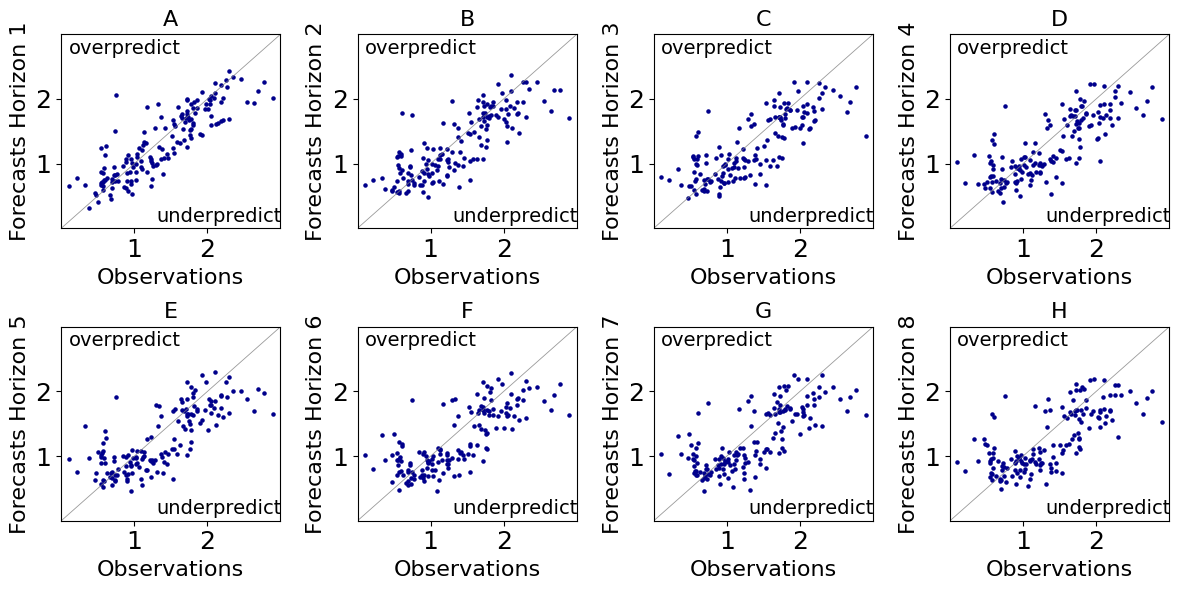

In [ ]:
labs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i in range(1, 9):
    row = (i - 1) // 4
    col = (i - 1) % 4

    # Get the values for the current pair of variables
    true_scale = globals()[f"true{i}_scale"]
    combT_scale = globals()[f"combT{i}_scale"]

    axs[row, col].scatter(true_scale, combT_scale, marker='o', s=5, alpha=1, color='darkblue')

    # Add a diagonal line to the current subplot
    axs[row, col].plot([0, 3], [0, 3], linewidth=0.6, alpha=0.8, color='grey')

    # Set the x-axis and y-axis limits
    axs[row, col].set_xlim(0, 3)
    axs[row, col].set_ylim(0, 3)
    axs[row, col].set_xlabel('Observations', fontsize=16)
    axs[row, col].set_ylabel(f'Forecasts Horizon {i}', fontsize=16)

    # Set the x-axis and y-axis ticks for the current subplot
    x_ticks = range(0, 4)
    y_ticks = range(0, 4)
    axs[row, col].set_xticks(x_ticks[1:-1])
    axs[row, col].set_yticks(y_ticks[1:-1])

    axs[row, col].tick_params(axis='both', which='major', labelsize=18)
    # Add the text "R^2 = " to the plot
    # r_squared = globals()[f"r_squared{i}"]
    axs[row, col].text(0.1, 2.7, "overpredict", fontsize=14)
    axs[row, col].text(1.3, 0.1, "underpredict", fontsize=14)

    axs[row, col].set_title(f"{labs[i-1]}", fontsize=16)
# Adjust the spacing between subplots
plt.tight_layout()

plt.savefig('equality.tif', format='tif', dpi=400)
plt.show()

#### draw mape assessment plot

In [ ]:
df = pd.read_excel('forecast_assessment.xlsx', index_col='Forecast Horizon (Weeks Ahead)', sheet_name = 'mape')
df

,RF,GBM,AR,AREV(LASSO),LSTM-CNN,Naive,CombM,CombT,CombM(except L-C),CombT(except L-C)
Forecast Horizon (Weeks Ahead),,,,,,,,,,
1,7.26,7.53,6.96,6.83,14.68,7.40,7.31,6.97,6.98,6.93
2,8.47,8.76,8.09,8.27,14.56,8.95,7.91,7.98,8.02,8.09
3,9.10,8.94,8.83,8.82,16.39,9.59,8.70,8.72,8.62,8.70
4,9.00,9.08,9.28,9.30,15.52,10.21,8.75,8.84,8.82,8.85
5,9.36,9.04,9.58,9.85,15.72,10.29,9.10,9.08,8.93,9.04
6,9.42,9.25,10.25,10.26,16.56,11.24,9.67,9.53,9.50,9.52
7,9.55,8.94,10.41,10.48,15.92,11.14,9.49,9.43,9.50,9.44
8,9.50,9.60,11.08,11.29,16.09,12.07,10.10,10.06,10.15,10.01


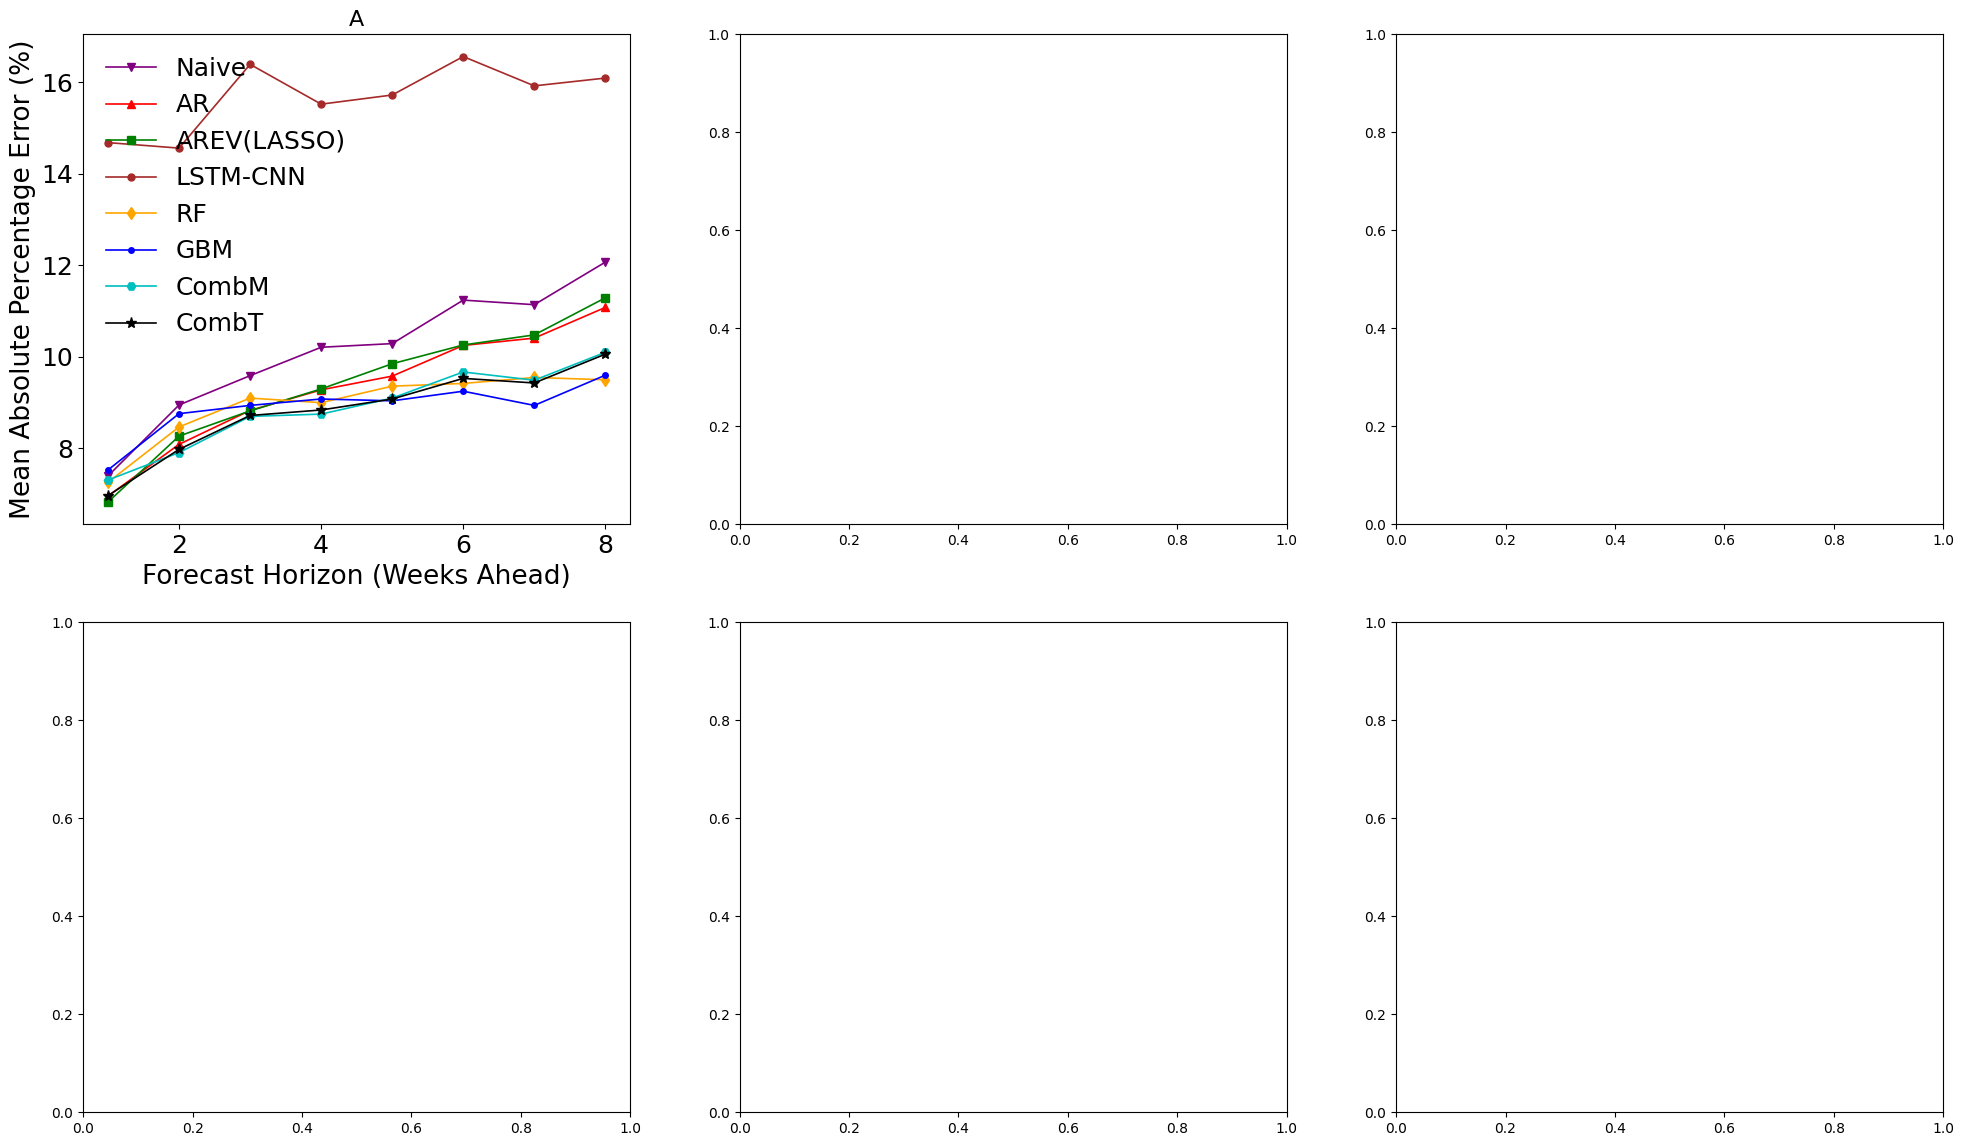

In [ ]:
fig, axarr = plt.subplots(2, 3, figsize=(24, 14))
ax = axarr[0, 0]

ax.plot(df.index, df['Naive'], label='Naive', linestyle='-', marker='v', linewidth=1.2, alpha=1, color='purple', markersize=6)
ax.plot(df.index, df['AR'], label='AR', linestyle='-', marker='^', linewidth=1.2, alpha=1, color='red', markersize=6)
ax.plot(df.index, df['AREV(LASSO)'], label='AREV(LASSO)', linestyle='-', marker='s', linewidth=1.2, alpha=1, color='green', markersize=6)
ax.plot(df.index, df['LSTM-CNN'], label='LSTM-CNN', linestyle='-', marker='o', linewidth=1.2, alpha=1, color='brown', markersize=5)
ax.plot(df.index, df['RF'], label='RF', linestyle='-', marker='d', linewidth=1.2, alpha=1, color='orange', markersize=6)
ax.plot(df.index, df['GBM'], label='GBM', linestyle='-', marker='.', linewidth=1.2, alpha=1, color='blue', markersize=8)
ax.plot(df.index, df['CombM'], label='CombM', linestyle='-', marker='H', linewidth=1.2, alpha=1, color='c', markersize=6)
ax.plot(df.index, df['CombT'], label='CombT', linestyle='-', marker='*', linewidth=1.2, alpha=1, color='black', markersize=8)

ax.set_xlabel('Forecast Horizon (Weeks Ahead)', fontsize=19)
ax.set_ylabel('Mean Absolute Percentage Error (%)', fontsize=19)
ax.legend(loc='upper left', frameon=False, fontsize=18)
ax.set_title("A", fontsize = 16)
ax.tick_params(axis='both', labelsize=18)


In [ ]:
ax = axarr[1, 0]

ax.plot(df.index, df['CombM'], label='CombM', linestyle='-', marker='H', linewidth=1.2, alpha=1, color='c', markersize=6)
ax.plot(df.index, df['CombT'], label='CombT', linestyle='-', marker='*', linewidth=1.2, alpha=1, color='black', markersize=8)
ax.plot(df.index, df['CombM(except L-C)'], label='CombM(except L-C)', linestyle='-', marker='x', linewidth=1.2, alpha=1, color='red', markersize=6)
ax.plot(df.index, df['CombT(except L-C)'], label='CombT(except L-C)', linestyle='-', marker='p', linewidth=1.2, alpha=1, color='green', markersize=6)

ax.set_xlabel('Forecast Horizon (Weeks Ahead)', fontsize=19)
ax.set_ylabel('Mean Absolute Percentage Error (%)', fontsize=19)
ax.legend(loc='upper left', frameon=False, fontsize=18)
ax.set_title("D", fontsize=16)
ax.tick_params(axis='both', labelsize=18)

#### draw mase plot

In [ ]:
df = pd.read_excel('forecast_assessment.xlsx', index_col='Forecast Horizon (Weeks Ahead)', sheet_name = 'mase')
df

,RF,GBM,AR,AREV(LASSO),LSTM-CNN,Naive,CombM,CombT,CombM(except L-C),CombT(except L-C)
Forecast Horizon (Weeks Ahead),,,,,,,,,,
1,0.98,1.01,0.94,0.93,2.12,1,1.00,0.94,0.94,0.93
2,0.94,0.99,0.91,0.94,1.76,1,0.91,0.90,0.90,0.91
3,0.95,0.94,0.93,0.93,1.82,1,0.93,0.92,0.91,0.91
4,0.90,0.91,0.92,0.94,1.66,1,0.89,0.89,0.88,0.88
5,0.91,0.89,0.94,0.98,1.67,1,0.91,0.90,0.88,0.89
6,0.83,0.83,0.91,0.92,1.59,1,0.87,0.85,0.85,0.84
7,0.87,0.83,0.93,0.96,1.56,1,0.87,0.86,0.87,0.86
8,0.80,0.81,0.92,0.94,1.45,1,0.86,0.85,0.85,0.84


In [ ]:
ax = axarr[0, 1]

ax.plot(df.index, df['Naive'], label='Naive', linestyle='-', marker='v', linewidth=1.2, alpha=1, color='purple', markersize=6)
ax.plot(df.index, df['AR'], label='AR', linestyle='-', marker='^', linewidth=1.2, alpha=1, color='red', markersize=6)
ax.plot(df.index, df['AREV(LASSO)'], label='AREV(LASSO)', linestyle='-', marker='s', linewidth=1.2, alpha=1, color='green', markersize=6)
ax.plot(df.index, df['LSTM-CNN'], label='LSTM-CNN', linestyle='-', marker='o', linewidth=1.2, alpha=1, color='brown', markersize=5)
ax.plot(df.index, df['RF'], label='RF', linestyle='-', marker='d', linewidth=1.2, alpha=1, color='orange', markersize=6)
ax.plot(df.index, df['GBM'], label='GBM', linestyle='-', marker='.', linewidth=1.2, alpha=1, color='blue', markersize=8)
ax.plot(df.index, df['CombM'], label='CombM', linestyle='-', marker='H', linewidth=1.2, alpha=1, color='c', markersize=6)
ax.plot(df.index, df['CombT'], label='CombT', linestyle='-', marker='*', linewidth=1.2, alpha=1, color='black', markersize=8)

ax.set_xlabel('Forecast Horizon (Weeks Ahead)', fontsize=19)
ax.set_ylabel('Mean Absolute Scaled Error', fontsize=19)
# plt.legend(loc='upper left', frameon=False, fontsize=15)
ax.set_title("B", fontsize=16)
ax.tick_params(axis='both', labelsize=18)

In [ ]:
ax = axarr[1, 1]

ax.plot(df.index, df['CombM'], label='CombM', linestyle='-', marker='H', linewidth=1.2, alpha=1, color='c', markersize=6)
ax.plot(df.index, df['CombT'], label='CombT', linestyle='-', marker='*', linewidth=1.2, alpha=1, color='black', markersize=8)
ax.plot(df.index, df['CombM(except L-C)'], label='CombM(except L-C)', linestyle='-', marker='x', linewidth=1.2, alpha=1, color='red', markersize=6)
ax.plot(df.index, df['CombT(except L-C)'], label='CombT(except L-C)', linestyle='-', marker='p', linewidth=1.2, alpha=1, color='green', markersize=6)

ax.set_xlabel('Forecast Horizon (Weeks Ahead)', fontsize=19)
ax.set_ylabel('Mean Absolute Scaled Error', fontsize=19)
# plt.legend(loc='upper left', frameon=False, fontsize=15)
ax.set_title("E", fontsize=16)
ax.tick_params(axis='both', labelsize=18)

#### draw mae plot

In [ ]:
df = pd.read_excel('forecast_assessment.xlsx', index_col='Forecast Horizon (Weeks Ahead)', sheet_name = 'mae')
df

,RF,GBM,AR,AREV(LASSO),LSTM-CNN,Naive,CombM,CombT,CombM(except L-C),CombT(except L-C)
Forecast Horizon (Weeks Ahead),,,,,,,,,,
1,99.468397,102.963478,94.922455,93.743424,217.413795,101.205128,101.896376,95.356688,95.181973,94.502579
2,115.621677,120.278884,109.801657,114.285287,216.103055,121.593548,110.558599,109.697941,109.406742,110.241017
3,125.745548,123.575435,120.324302,122.264819,238.598271,130.574194,121.466719,120.422625,118.023210,119.326784
4,124.300387,124.609817,126.323495,129.001045,228.566673,137.729032,122.190905,122.302506,120.477036,121.541199
5,127.837143,124.086928,130.116164,136.144098,232.234226,136.629870,126.352257,124.895423,121.366949,123.196026
6,128.424740,126.016120,139.892360,141.501193,245.051736,149.142857,133.929124,130.985938,129.087689,129.745463
7,129.196883,122.490524,142.803396,144.198024,235.231859,149.110390,131.734186,129.592636,129.258366,128.448964
8,127.892876,130.435855,151.920912,155.862431,239.457055,162.372549,140.271532,138.290829,137.961152,136.204881


In [ ]:
ax = axarr[0, 2]

ax.plot(df.index, df['Naive'], label='Naive', linestyle='-', marker='v', linewidth=1.2, alpha=1, color='purple', markersize=6)
ax.plot(df.index, df['AR'], label='AR', linestyle='-', marker='^', linewidth=1.2, alpha=1, color='red', markersize=6)
ax.plot(df.index, df['AREV(LASSO)'], label='AREV(LASSO)', linestyle='-', marker='s', linewidth=1.2, alpha=1, color='green', markersize=6)
ax.plot(df.index, df['LSTM-CNN'], label='LSTM-CNN', linestyle='-', marker='o', linewidth=1.2, alpha=1, color='brown', markersize=5)
ax.plot(df.index, df['RF'], label='RF', linestyle='-', marker='d', linewidth=1.2, alpha=1, color='orange', markersize=6)
ax.plot(df.index, df['GBM'], label='GBM', linestyle='-', marker='.', linewidth=1.2, alpha=1, color='blue', markersize=8)
ax.plot(df.index, df['CombM'], label='CombM', linestyle='-', marker='H', linewidth=1.2, alpha=1, color='c', markersize=6)
ax.plot(df.index, df['CombT'], label='CombT', linestyle='-', marker='*', linewidth=1.2, alpha=1, color='black', markersize=8)

ax.set_xlabel('Forecast Horizon (Weeks Ahead)', fontsize=19)
ax.set_ylabel('Mean Absolute Forecast Error', fontsize=19)
# plt.legend(loc='upper left', frameon=False, fontsize=15)
ax.set_title("C", fontsize=16)
ax.tick_params(axis='both', labelsize=18)

In [ ]:
ax = axarr[1, 2]

ax.plot(df.index, df['CombM'], label='CombM', linestyle='-', marker='H', linewidth=1.2, alpha=1, color='c', markersize=6)
ax.plot(df.index, df['CombT'], label='CombT', linestyle='-', marker='*', linewidth=1.2, alpha=1, color='black', markersize=8)
ax.plot(df.index, df['CombM(except L-C)'], label='CombM(except L-C)', linestyle='-', marker='x', linewidth=1.2, alpha=1, color='red', markersize=6)
ax.plot(df.index, df['CombT(except L-C)'], label='CombT(except L-C)', linestyle='-', marker='p', linewidth=1.2, alpha=1, color='green', markersize=6)

ax.set_xlabel('Forecast Horizon (Weeks Ahead)', fontsize=19)
ax.set_ylabel('Mean Absolute Forecast Error', fontsize=19)
# plt.legend(loc='upper left', frameon=False, fontsize=15)
ax.set_title("F", fontsize=16)
ax.tick_params(axis='both', labelsize=18)
fig.savefig('all_metrics.tif', format='tif', dpi=400)
plt.show()

### DM test

In [ ]:
def dm_test(actual_lst, pred1_lst, pred2_lst):

    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np

    # Ensure input lists are of equal length
    if len(actual_lst) != len(pred1_lst) or len(pred1_lst) != len(pred2_lst):
        raise ValueError("Lengths of actual_lst, pred1_lst, and pred2_lst do not match.")

    # Convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()

    # Calculate absolute percentage errors for both models
    e1_lst = [abs((actual - p1) / actual) for actual, p1 in zip(actual_lst, pred1_lst)]
    e2_lst = [abs((actual - p2) / actual) for actual, p2 in zip(actual_lst, pred2_lst)]

    # Calculate the differences between absolute percentage errors
    d_lst = [e1 - e2 for e1, e2 in zip(e1_lst, e2_lst)]

    # Calculate mean of the differences
    mean_d = pd.Series(d_lst).mean()

    # Compute autocovariance
    def autocovariance(Xi, N, k, Xs):
        autoCov = sum([(Xi[i + k] - Xs) * (Xi[i] - Xs) for i in range(0, N - k)])
        return (1 / N) * autoCov

    T = float(len(d_lst))
    gamma = [autocovariance(d_lst, len(d_lst), lag, mean_d) for lag in range(0, 2)]

    # Calculate DM test statistic and apply Harvey adjustment
    V_d = (gamma[0] + 2 * gamma[1]) / T
    DM_stat = V_d ** (-0.5) * mean_d
    harvey_adj = ((T + 1 - 2 + 1 / T) / T) ** (0.5)
    DM_stat = harvey_adj * DM_stat

    # Calculate p-value
    p_value = 2 * t.cdf(-abs(DM_stat), df=T - 1)

    # Return DM test statistic and p-value as a named tuple
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    return dm_return(DM=DM_stat, p_value=p_value)


In [ ]:
import itertools

# Example data for each step (i) and model
true = [true1, true2, true3, true4, true5, true6, true7, true8]
rf = [rf1, rf2, rf3, rf4, rf5, rf6, rf7, rf8]
gbm = [gbm1, gbm2, gbm3, gbm4, gbm5, gbm6, gbm7, gbm8]
ar = [ar1, ar2, ar3, ar4, ar5, ar6, ar7, ar8]
arev_lasso = [arev_lasso1, arev_lasso2, arev_lasso3, arev_lasso4, arev_lasso5, arev_lasso6, arev_lasso7, arev_lasso8]
comb = [comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8]
combT = [combT1, combT2, combT3, combT4, combT5, combT6, combT7, combT8]
lstm = [lstm1, lstm2, lstm3, lstm4, lstm5, lstm6, lstm7, lstm8]
naive = [naive1, naive2, naive3, naive4, naive5, naive6, naive7, naive8]

# Store results for each step
storeAssessments = []

# Iterate through each step
for i in range(len(true)):
    step_results = []

    # List of model predictions for the current step
    model_predictions = [naive[i], ar[i], arev_lasso[i], lstm[i], rf[i], gbm[i], comb[i], combT[i]]

    # Iterate through all possible pairs of models without repetition
    for model1, model2 in itertools.combinations(enumerate(model_predictions), 2):
        index1, pred1_lst = model1
        index2, pred2_lst = model2
        # Run the DM test
        result = dm_test(true[i], pred1_lst, pred2_lst)

        # Store the result along with model indices
        step_results.append(((index1, index2), result[1]))

    # Add the results of the current step to storeAssessments
    storeAssessments.append(step_results)

In [ ]:
storeAssessments[1]

[((0, 1), 0.014798735768751561),
 ((0, 2), 0.16802140267515683),
 ((0, 3), 1.537221007473382e-05),
 ((0, 4), 0.31427473598376693),
 ((0, 5), 0.7140465427514502),
 ((0, 6), 0.021103351941667715),
 ((0, 7), 0.011009437294710987),
 ((1, 2), 0.6441900896917679),
 ((1, 3), 3.1602714477564937e-07),
 ((1, 4), 0.27584043003686187),
 ((1, 5), 0.10159984112190992),
 ((1, 6), 0.5960520479470475),
 ((1, 7), 0.6620309945973715),
 ((2, 3), 1.1505108698864885e-07),
 ((2, 4), 0.5763761447200061),
 ((2, 5), 0.18053484560271396),
 ((2, 6), 0.2627441794171768),
 ((2, 7), 0.21339422275255296),
 ((3, 4), 1.2799598954840462e-06),
 ((3, 5), 3.4271858519411705e-06),
 ((3, 6), 1.6621608947560487e-09),
 ((3, 7), 5.916425513273413e-08),
 ((4, 5), 0.34485920876211906),
 ((4, 6), 0.10976292905821329),
 ((4, 7), 0.03419286857564858),
 ((5, 6), 0.035595225956162484),
 ((5, 7), 0.009276805638866271),
 ((6, 7), 0.737280718364336)]

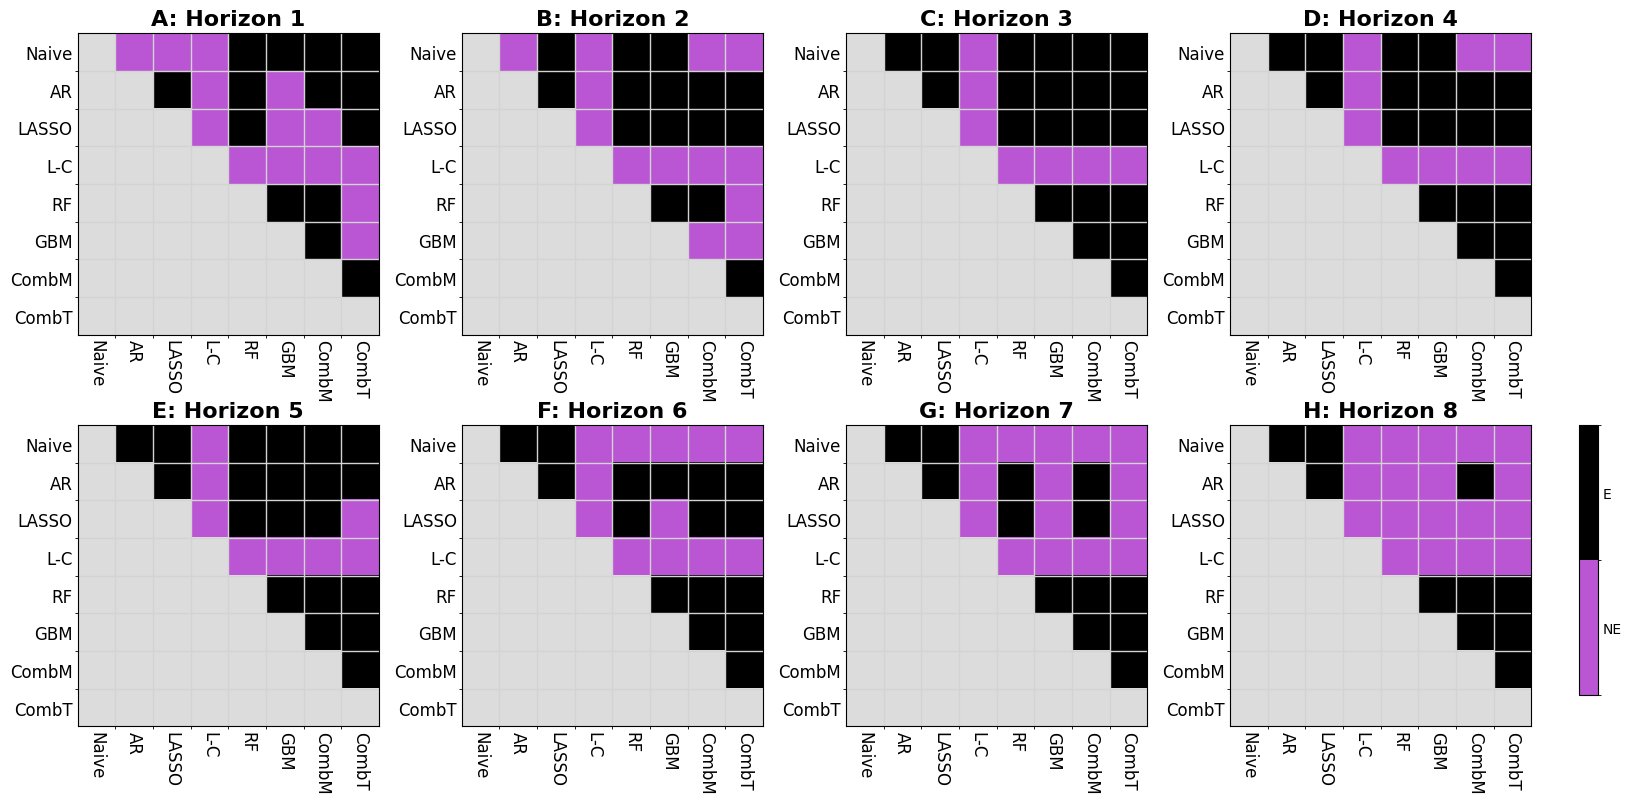

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

labels = ['Naive', 'AR', 'LASSO', 'L-C', 'RF', 'GBM', 'CombM', 'CombT']
labs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Set up the figure and subplots
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(19, 9))
fig.subplots_adjust(hspace=0.3)

# Iterate through each step in storeAssessments
for i, step_results in enumerate(storeAssessments):
    # Initialize a square matrix of -1 with the number of models as dimensions
    heatmap_data = np.full((len(model_predictions), len(model_predictions)), -1)

    # Fill the heatmap_data matrix
    for (index1, index2), p_value in step_results:
        if p_value > 0.05:
            p_value = 1
        else:
            p_value = 0
        heatmap_data[index1, index2] = p_value

    # Create a custom colormap: red (0), black (1), gray (-1)
    custom_cmap = mcolors.ListedColormap(['gainsboro', 'mediumorchid', 'black'])

    # Plot the heatmap
    ax = axes[i // n_cols, i % n_cols]
    ax.imshow(heatmap_data, cmap=custom_cmap, vmin=-1, vmax=1)
    ax.set_title(f"{labs[i]}: Horizon {i+1}", fontsize=16, weight='bold')

    # Add gridlines to the heatmap
    ax.set_xticks(np.arange(0.5, len(model_predictions)-1, 1), minor=True)
    ax.set_yticks(np.arange(0.5, len(model_predictions)-1, 1), minor=True)
    ax.grid(which='minor', color='lightgrey', linestyle='-', linewidth=1)

    # Remove the tick lines from the x- and y-axes
    ax.tick_params(axis='both', length=0)
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=9, rotation=-90)
    ax.set_yticklabels(labels, fontsize=9)

    ax.tick_params(axis='both', which='major', labelsize=12)

# Add a colorbar
cax = fig.add_axes([0.92, 0.145, 0.01, 0.3])  # Adjust the position and size of the colorbar
norm = mcolors.BoundaryNorm([0, 0.5, 1], len(['mediumorchid', 'black']))  # Normalize the colormap
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=mcolors.ListedColormap(['mediumorchid', 'black']), norm=norm),
                  cax=cax, ticks=[0.25, 0.75], boundaries=[0, 0.5, 1], spacing='proportional')
cb.set_ticklabels(['NE', 'E'])  # Set custom tick labels
cb.ax.tick_params(size=0)  # Remove the tick lines from the colorbar
plt.savefig('dm.tif', format='tif', dpi=400)
plt.show()


画forecast combination的时间序列曲线图

In [ ]:
data = pd.read_csv('variables.csv')
data = data.drop(columns=['Epic_week'])

In [ ]:
n_lag = 4
n_steps = 8
# Create lagged variables for the deseas count, temperature, and rainfall
columns = list(data.columns)

for col in columns:
    for i in range(1, n_lag + 1):
        data[f"{col}_lag_{i}"] = data[col].shift(i)

# Drop rows with NaN values generated by shifting
data = data.dropna()

# Only keep the target column when there is no lag
data = data.drop(data.columns[1:50], axis=1)

<ipython-input-587-f9d9dcd138c7>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{col}_lag_{i}"] = data[col].shift(i)
<ipython-input-587-f9d9dcd138c7>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{col}_lag_{i}"] = data[col].shift(i)
<ipython-input-587-f9d9dcd138c7>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [ ]:
y = data['Infectious and Parasitic Diseases'].shift(-n_steps+1)
y = y.dropna()
if n_steps != 1:
  data = data.iloc[:-n_steps+1, :]

X = data.drop('Infectious and Parasitic Diseases', axis=1)

In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X = np.array(X)
y = np.array(y)

In [ ]:
len(X)

510

In [ ]:
train_size = int(len(X) * 0.7)
test_ind = range(train_size, len(X))
y_pred_store = np.array([None] * len(X))

In [ ]:
i = 0
for forecast_ind in test_ind:
  y_pred_store[forecast_ind] = combT8[i]
  i = i + 1

In [ ]:
# 8 forecasting window. different size of samples.
# 1 week ahead: [0, 48, 100, 152, 204, 256, 309, 361, 413, 465, 517]
# 2 week ahead: [0, 47, 99, 151, 203, 255, 308, 360, 412, 464, 516]
# 3 week ahead: [0, 46, 98, 150, 202, 254, 307, 359, 411, 463, 515]
# 4 week ahead: [0, 45, 97, 149, 201, 253, 306, 358, 410, 462, 514]
# 5 week ahead: [0, 44, 96, 148, 200, 252, 305, 357, 409, 461, 513]
# 6 week ahead: [0, 43, 95, 147, 199, 251, 304, 356, 408, 460, 512]
# 7 week ahead: [0, 42, 94, 146, 198, 250, 303, 355, 407, 459, 511]
# 8 week ahead: [0, 41, 93, 145, 197, 249, 302, 354, 406, 458, 510]

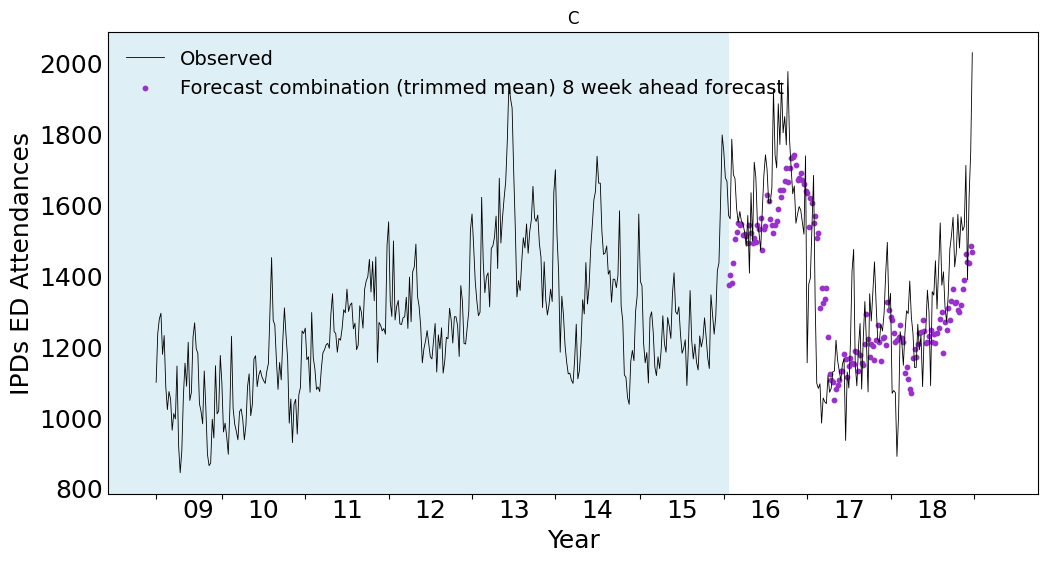

In [ ]:
plt.figure(figsize=(12, 6))

# Set the x-axis limits
plt.xlim(-30, len(X)+40)

# Shade the left half of the figure in light blue
first_test_index = test_ind[0]  # Get the index of the first test observation
plt.axvspan(-30, first_test_index, facecolor='lightblue', alpha=0.4)

# Create tick locations and labels
tick_interval = 52
# origin data is [0, 52, 104, 156, 208, 260, 313, 365, 417, 469, 521]
tick_locations = np.array([0, 41, 93, 145, 197, 249, 302, 354, 406, 458, 510])
tick_label_locations = tick_locations[:-1] + tick_interval / 2
tick_labels = [f'{year:02d}' for year in range(9, 19)]

plt.plot(y, label='Observed', linestyle='-', linewidth=0.6, alpha=1, color='black')
plt.scatter(range(len(y_pred_store)), y_pred_store, label=F'Forecast combination (trimmed mean) {n_steps} week ahead forecast', marker='o', s=10, alpha=1, color='darkorchid')

plt.title('C')
plt.xlabel('Year', fontsize=18)
plt.ylabel('IPDs ED Attendances', fontsize=18)

plt.xticks(tick_locations)
plt.gca().set_xticklabels([])
plt.gca().set_xticks(tick_label_locations, minor=True)
plt.gca().set_xticklabels(tick_labels, minor=True)
plt.gca().tick_params(axis='x', which='minor', length=0, labelsize=18)
plt.gca().tick_params(axis='y', which='major', length=0, labelsize=18)

plt.legend(loc='upper left', frameon=False, fontsize=14)
plt.savefig('CombT8.tif', format='tif', dpi=400)
plt.show()
